## Synthetic Data Generation Using GAN

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, Model

# Generator Model
def build_generator(latent_dim, num_features):
    model = tf.keras.Sequential([
        layers.Input(shape=(latent_dim,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(num_features, activation='relu')
    ])
    return model

# Discriminator Model
def build_discriminator(num_features):
    model = tf.keras.Sequential([
        layers.Input(shape=(num_features,)),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# GAN Model
class GAN(Model):
    def __init__(self, generator, discriminator):
        super(GAN, self).__init__()
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_optimizer, d_optimizer, loss_fn):
        super(GAN, self).compile()
        self.g_optimizer = g_optimizer
        self.d_optimizer = d_optimizer
        self.loss_fn = loss_fn

    def train_step(self, real_data):
        batch_size = tf.shape(real_data)[0]
        latent_dim = self.generator.input_shape[1]

        # Train Discriminator
        noise = tf.random.normal((batch_size, latent_dim))
        generated_data = self.generator(noise)
        
        real_data = tf.cast(real_data, tf.float32)
        generated_data = tf.cast(generated_data, tf.float32)

        combined_data = tf.concat([real_data, generated_data], axis=0)
        labels = tf.concat([tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0)

        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_data)
            d_loss = self.loss_fn(labels, predictions)

        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_weights))

        # Train Generator
        noise = tf.random.normal((batch_size, latent_dim))
        labels = tf.ones((batch_size, 1))

        with tf.GradientTape() as tape:
            generated_data = self.generator(noise)
            predictions = self.discriminator(generated_data)
            g_loss = self.loss_fn(labels, predictions)

        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        return {'d_loss': d_loss, 'g_loss': g_loss}

# Define the necessary parameters
latent_dim = 100
num_features = 16
batch_size = 10
epochs = 200
num_samples = 1000

# Load the data from the CSV file and preprocess
data = pd.read_csv("measurements.csv")
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Build and compile the models
generator = build_generator(latent_dim, num_features)
discriminator = build_discriminator(num_features)
gan = GAN(generator, discriminator)
gan.compile(
    g_optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.5),
    d_optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.5),
    loss_fn=tf.keras.losses.BinaryCrossentropy(from_logits=False)  # Changed from_logits to False
)

# Train the GAN
gan.fit(data_scaled, batch_size=batch_size, epochs=epochs)

# Generate synthetic data
synthetic_noise = np.random.normal(0, 1, size=(num_samples, latent_dim))
synthetic_data_scaled = generator.predict(synthetic_noise)

# Inverse transform the synthetic data to bring it back to original scale
synthetic_data = scaler.inverse_transform(synthetic_data_scaled)



# Convert synthetic data to DataFrame
synthetic_df = pd.DataFrame(synthetic_data, columns=data.columns)

# Save synthetic data to a new CSV file
synthetic_df.to_csv('GAN_synthetic_data.csv', index=False)


Epoch 1/200
44/44 [==============================] - 3s 6ms/step - d_loss: 0.3859 - g_loss: 1.4203
Epoch 2/200
44/44 [==============================] - 0s 6ms/step - d_loss: 0.2057 - g_loss: 3.5751
Epoch 3/200
44/44 [==============================] - 0s 5ms/step - d_loss: 0.2564 - g_loss: 2.8220
Epoch 4/200
44/44 [==============================] - 0s 6ms/step - d_loss: 0.4348 - g_loss: 2.3624
Epoch 5/200
44/44 [==============================] - 0s 5ms/step - d_loss: 0.3746 - g_loss: 1.7363
Epoch 6/200
44/44 [==============================] - 0s 5ms/step - d_loss: 0.3716 - g_loss: 1.8844
Epoch 7/200
44/44 [==============================] - 0s 5ms/step - d_loss: 0.5110 - g_loss: 1.6855
Epoch 8/200
44/44 [==============================] - 0s 5ms/step - d_loss: 0.5771 - g_loss: 1.1113
Epoch 9/200
44/44 [==============================] - 0s 5ms/step - d_loss: 0.6641 - g_loss: 1.4379
Epoch 10/200
44/44 [==============================] - 0s 5ms/step - d_loss: 0.6920 - g_loss: 0.9185
Epoch 11/

In [31]:
#combining two csv files
import pandas as pd

# Load the two CSV files into DataFrames
df1 = pd.read_csv('updated_file.csv')
df2 = pd.read_csv('synthetic_data_new1.csv')

# Concatenate the two DataFrames along the rows
combined_df = pd.concat([df1, df2], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('data_new1.csv', index=False)


In [30]:
#rounding
import pandas as pd

# Read the CSV file
df = pd.read_csv('synthetic_data_new1.csv')

# Specify columns to round off
columns_to_round = ['No of Trees', 'Pathloss', 'Angle']  # Add column names as needed
#columns_to_round = ['Distance', 'Trunk Height', 'Trunk Radius', 'Radius of Canopy', 'Height'] 
# Round off specified columns
decimal_places = 0 # Adjust as needed
df[columns_to_round] = df[columns_to_round].round(decimal_places)

# Write the modified data to a new CSV file
df.to_csv('synthetic_data_new1.csv', index=False)


## Distribution Graphs

C:\Users\G Vijayalakshmi\AppData\Local\Temp\ipykernel_11360\235299982.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(real_data[feature], label='Real', shade=True, color='blue')
C:\Users\G Vijayalakshmi\AppData\Local\Temp\ipykernel_11360\235299982.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data[feature], label='Synthetic', shade=True, color='red')
C:\Users\G Vijayalakshmi\AppData\Local\Temp\ipykernel_11360\235299982.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(real_data[feature], label='Real', shade=True, color='blue')
C:\Users\G Vijayalakshmi\AppData\Local\Temp\ipykernel_11360\235299982.

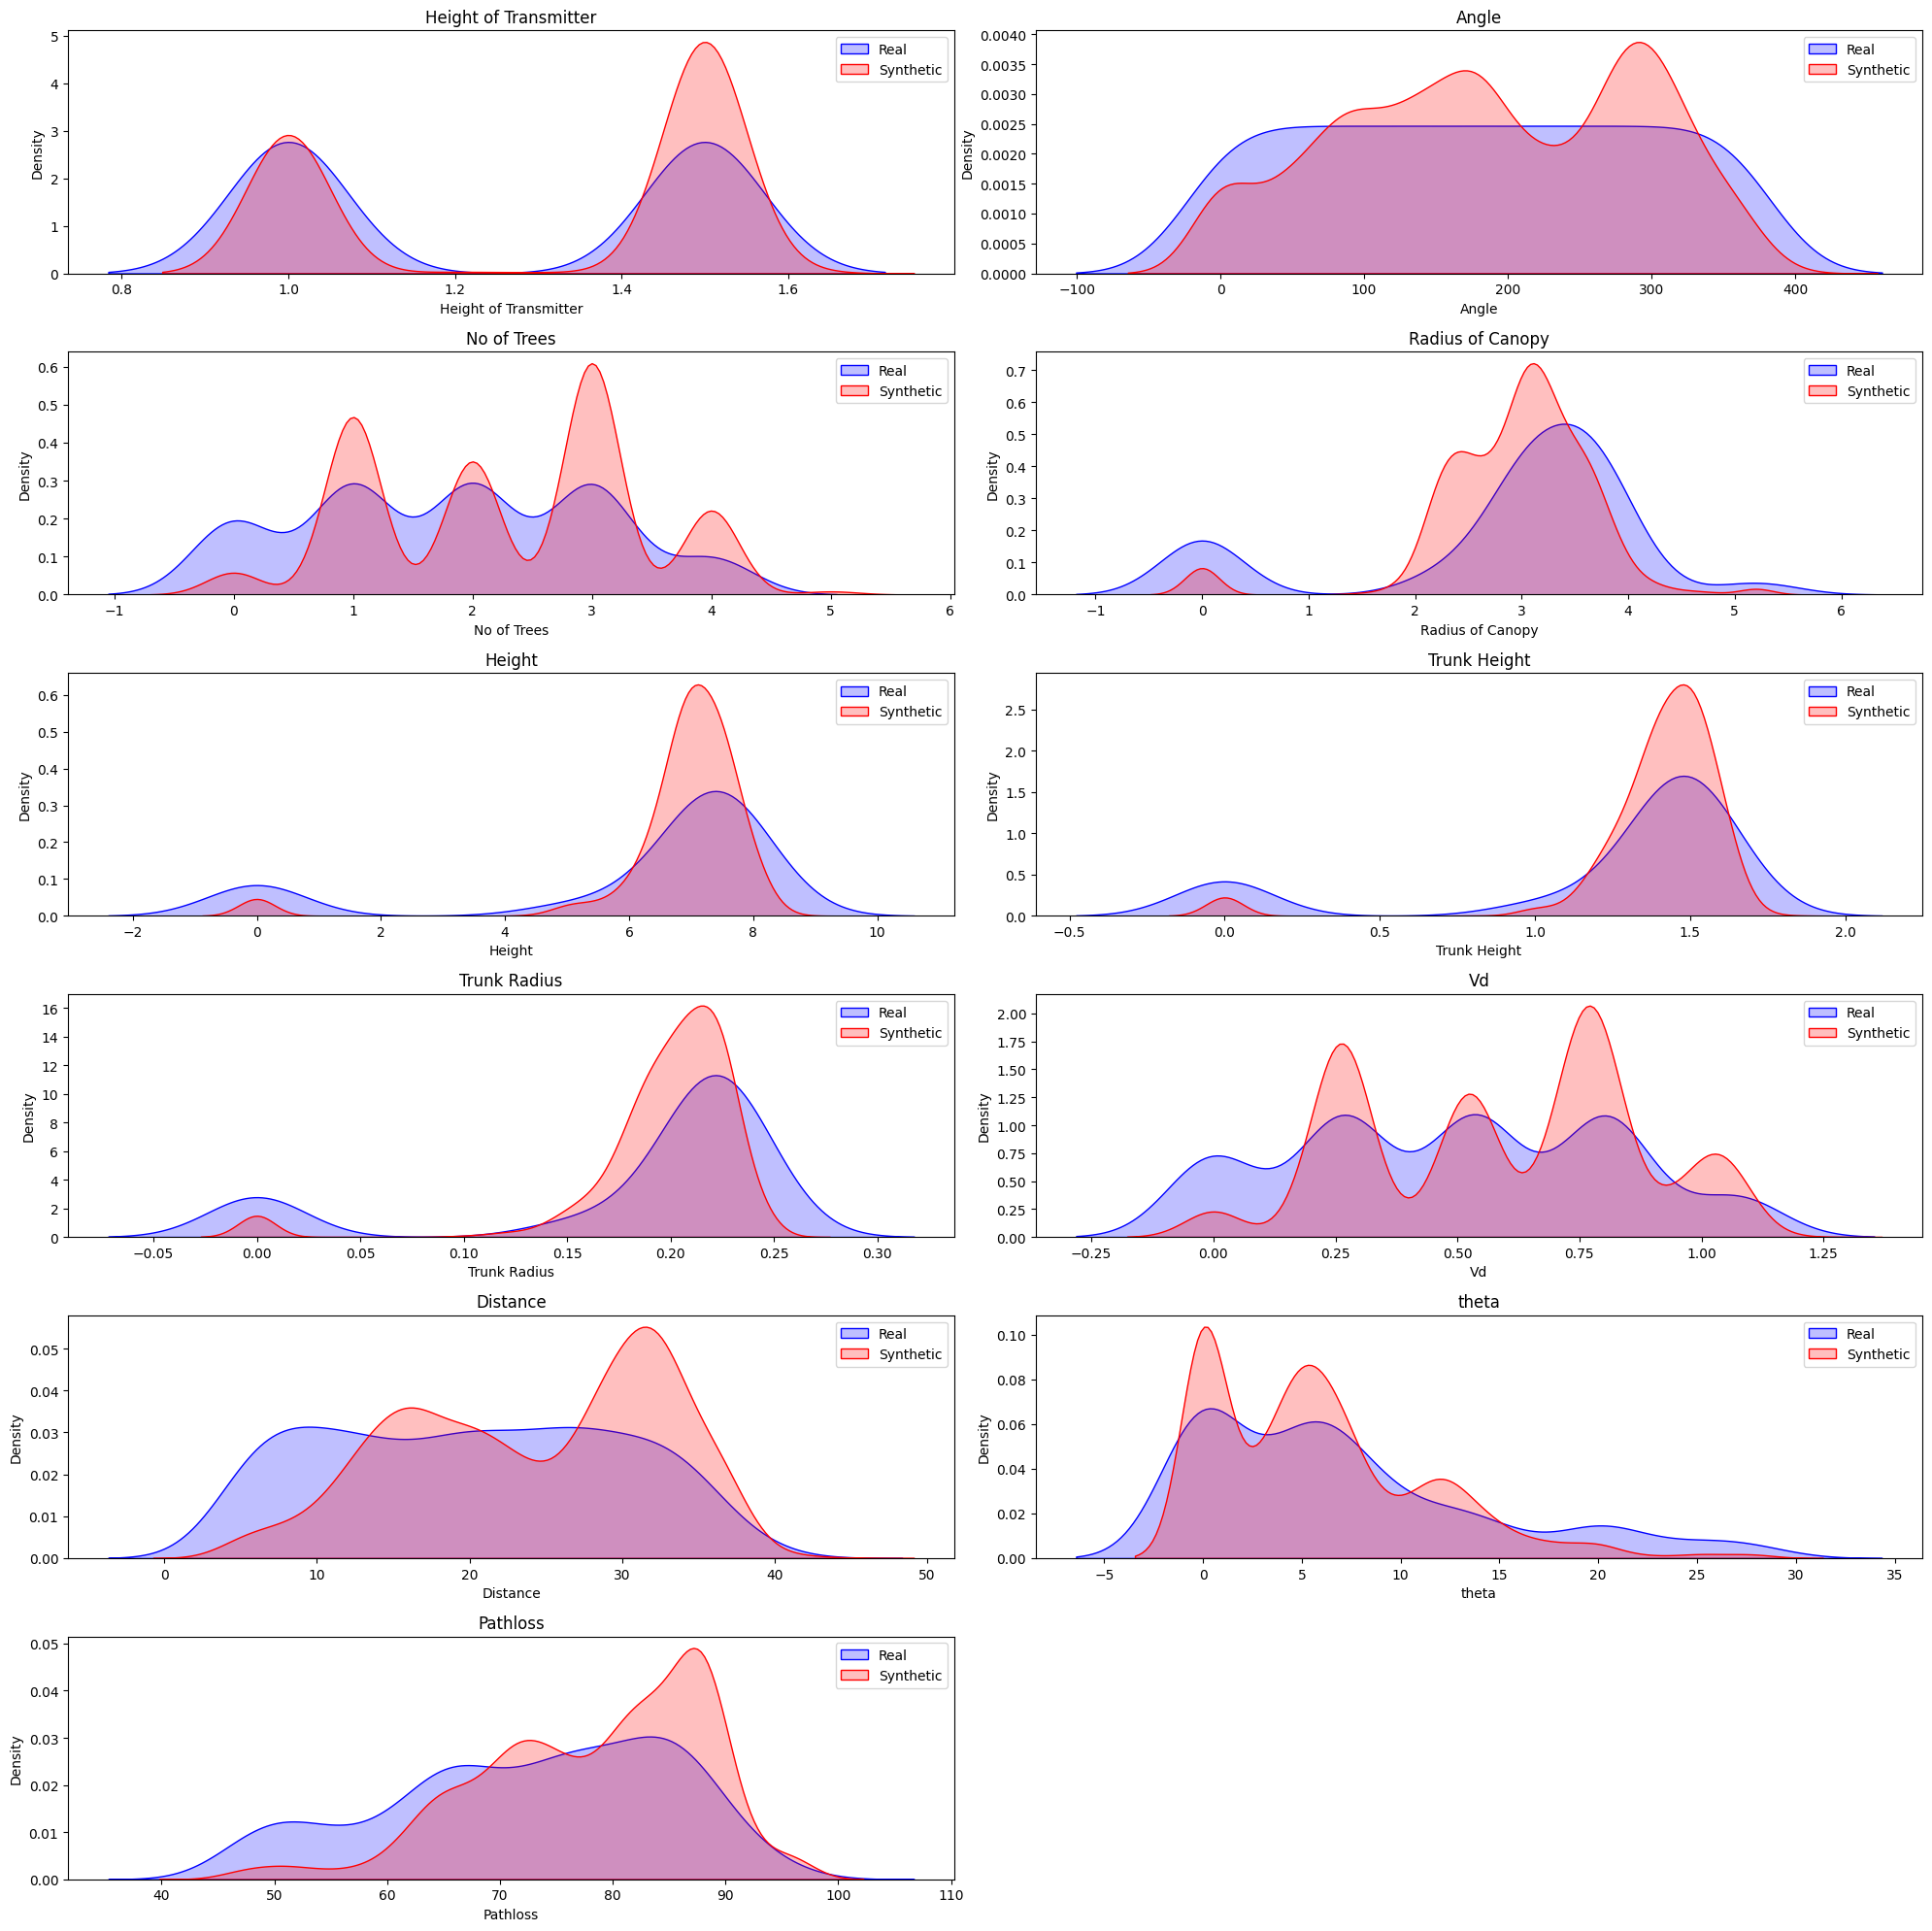

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Read the CSV files
real_data = pd.read_csv('combined_measurements.csv')
synthetic_data = pd.read_csv('data_final_2000.csv')

# Step 2: Drop the specified columns
columns_to_drop = ['Frequency', 'Height of Receiver', 'Gain of Transmitter', 'Gain of Receiver', 'Transmitted Power']
real_data = real_data.drop(columns=columns_to_drop)
synthetic_data = synthetic_data.drop(columns=columns_to_drop)

# Step 3: Plot the distributions for each remaining feature
# Get the list of features (columns)
features = real_data.columns

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Create subplots for each feature
for i, feature in enumerate(features):
    plt.subplot(len(features) // 2 + 1, 2, i + 1)
    sns.kdeplot(real_data[feature], label='Real', shade=True, color='blue')
    sns.kdeplot(synthetic_data[feature], label='Synthetic', shade=True, color='red')
    plt.title(feature)
    plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


C:\Users\G Vijayalakshmi\AppData\Local\Temp\ipykernel_10332\3981610472.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(real_data[feature], label='Real', shade=True, color='blue')
C:\Users\G Vijayalakshmi\AppData\Local\Temp\ipykernel_10332\3981610472.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data[feature], label='Synthetic', shade=True, color='red')
C:\Users\G Vijayalakshmi\AppData\Local\Temp\ipykernel_10332\3981610472.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(real_data[feature], label='Real', shade=True, color='blue')
C:\Users\G Vijayalakshmi\AppData\Local\Temp\ipykernel_10332\3981610

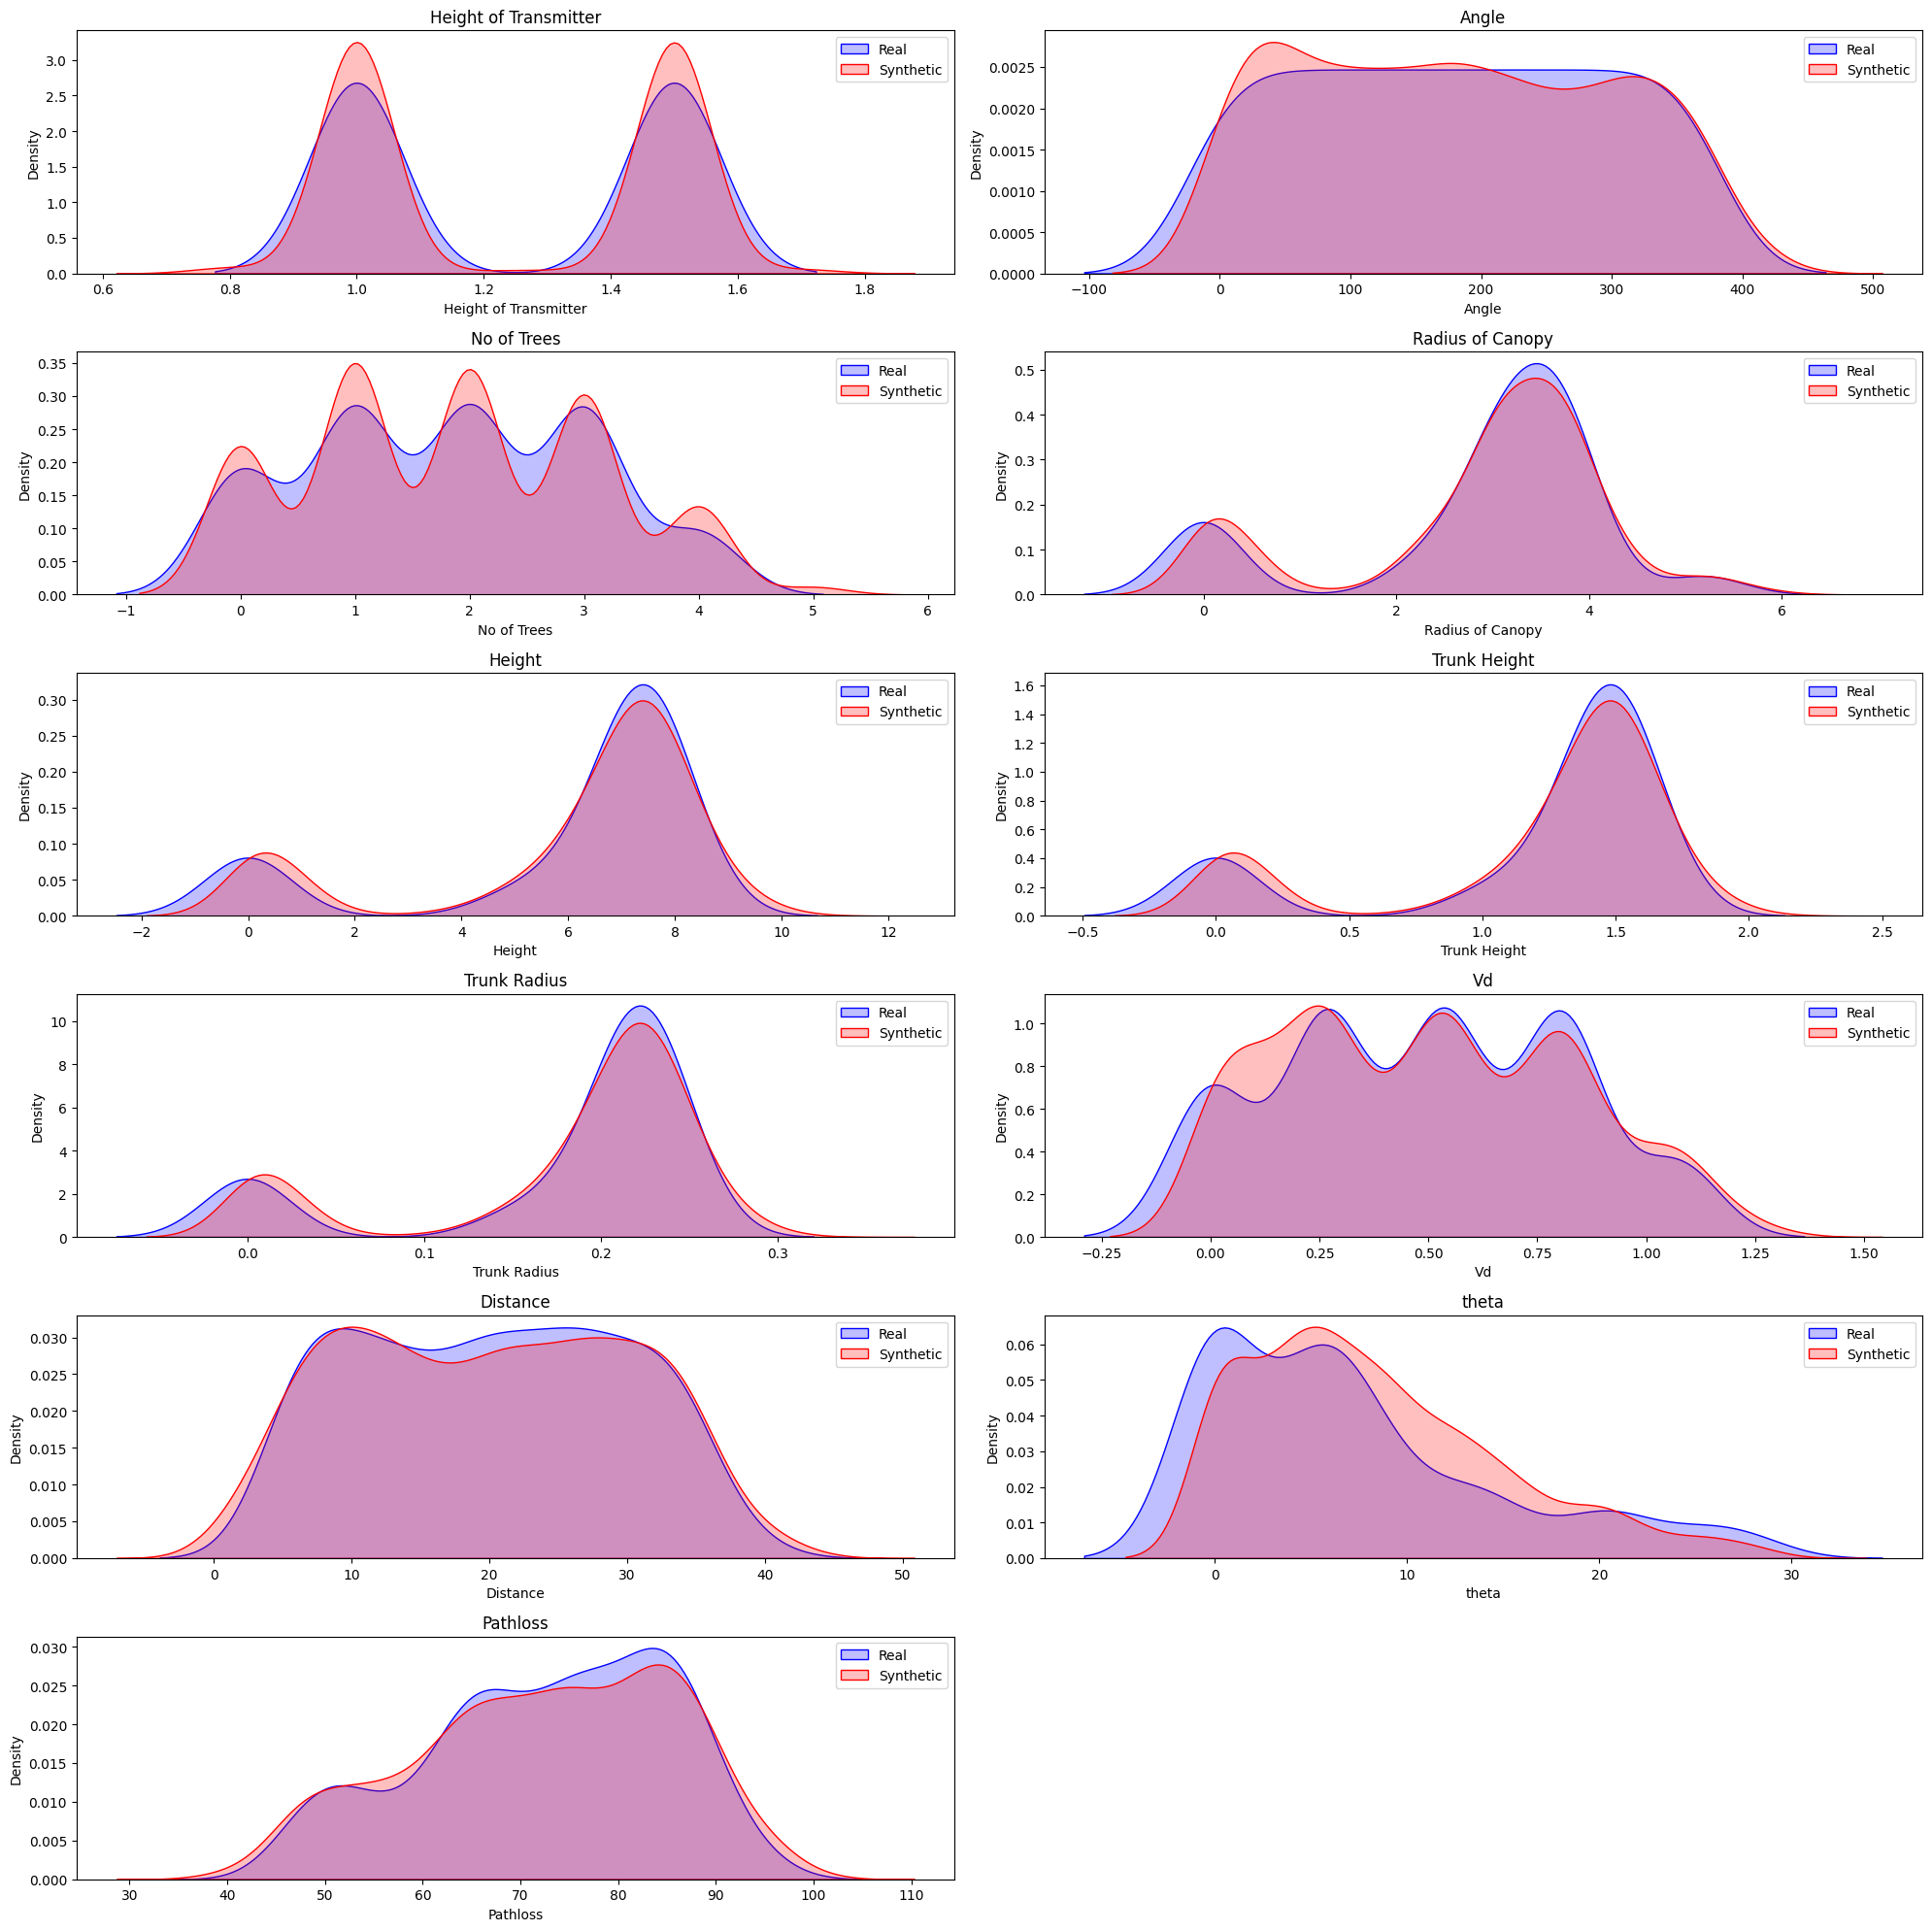

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Read the CSV files
real_data = pd.read_csv('measurements.csv')
synthetic_data = pd.read_csv('data_coupla.csv')

# Step 2: Drop the specified columns
columns_to_drop = ['Frequency', 'Height of Receiver', 'Gain of Transmitter', 'Gain of Receiver', 'Transmitted Power']
real_data = real_data.drop(columns=columns_to_drop)
synthetic_data = synthetic_data.drop(columns=columns_to_drop)

# Step 3: Plot the distributions for each remaining feature
# Get the list of features (columns)
features = real_data.columns

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Create subplots for each feature
for i, feature in enumerate(features):
    plt.subplot(len(features) // 2 + 1, 2, i + 1)
    sns.kdeplot(real_data[feature], label='Real', shade=True, color='blue')
    sns.kdeplot(synthetic_data[feature], label='Synthetic', shade=True, color='red')
    plt.title(feature)
    plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


## Metrics in bar graphs

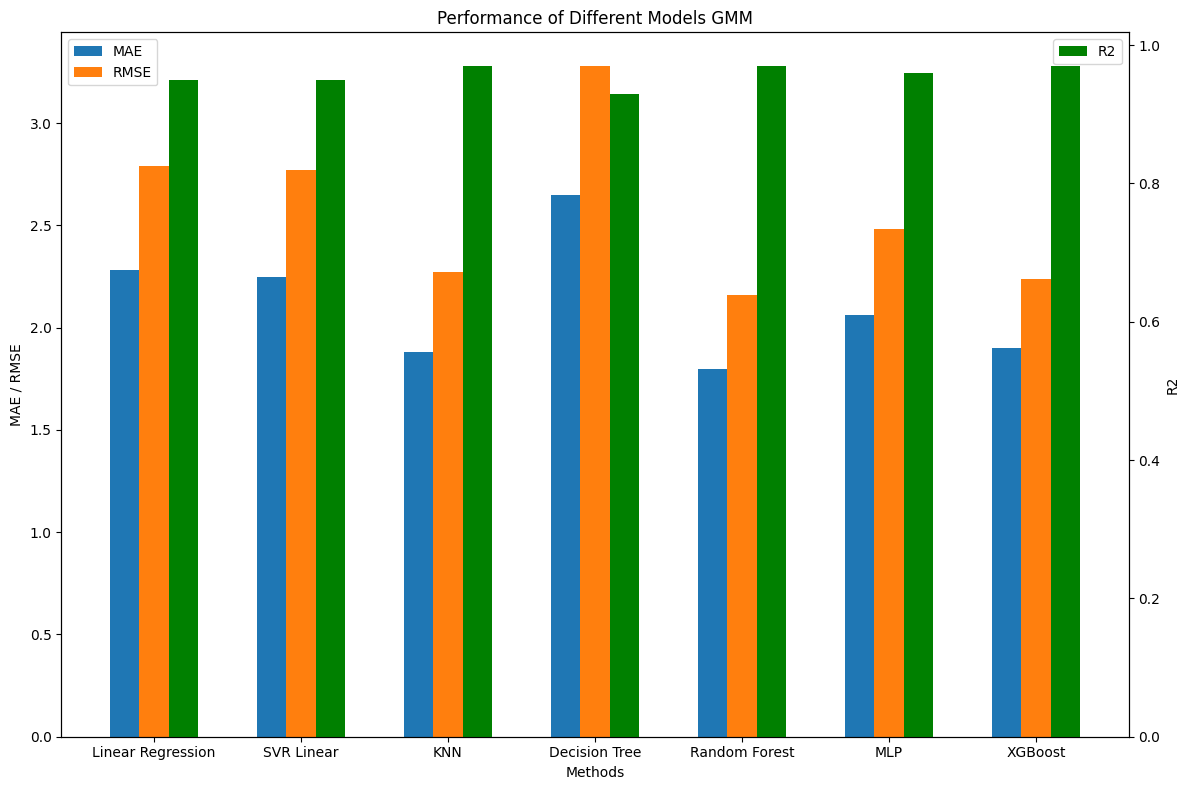

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Data
methods = ['Linear Regression', 'SVR Linear', 'KNN', 'Decision Tree', 'Random Forest', 'MLP', 'XGBoost']
mae = [2.28, 2.25, 1.88, 2.65, 1.80, 2.06, 1.90]
rmse = [2.79, 2.77, 2.27, 3.28, 2.16, 2.48, 2.24]
r2 = [0.95, 0.95, 0.97, 0.93, 0.97, 0.96, 0.97]

x = np.arange(len(methods))  # the label locations
width = 0.2  # the width of the bars

fig, ax1 = plt.subplots(figsize=(12, 8))

# Plotting MAE and RMSE on the primary y-axis
rects1 = ax1.bar(x - width, mae, width, label='MAE')
rects2 = ax1.bar(x, rmse, width, label='RMSE')

ax1.set_xlabel('Methods')
ax1.set_ylabel('MAE / RMSE')
ax1.set_title('Performance of Different Models GMM')
ax1.set_xticks(x)
ax1.set_xticklabels(methods)
ax1.legend(loc='upper left')

# Creating a secondary y-axis for R2 scores
ax2 = ax1.twinx()
rects3 = ax2.bar(x + width, r2, width, label='R2', color='g')
ax2.set_ylabel('R2')
ax2.legend(loc='upper right')

fig.tight_layout()

# Show plot
plt.show()


## Calculating Theta

In [21]:
import csv
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('measurements 1-1.5.csv')

# Determine the number of chunks
num_rows = len(df)
num_chunks = (num_rows - 1) // 9 + 1  # -1 because header is not counted in row splitting

# Split and save the CSV files
for i in range(num_chunks):
    start_row = i * 9
    end_row = start_row + 9
    chunk = df.iloc[start_row:end_row]
    chunk.to_csv(f'chunk_{i+1}.csv', index=False)

def process_csv_files(num_chunks):
    for i in range(1, num_chunks + 1):
        # Read each split CSV file
        chunk_file = f'chunk_{i}.csv'
        df = pd.read_csv(chunk_file)

        # Find the distance where angle is 90 degrees
        distance_at_90 = df.loc[df['Angle'] == 90, 'Distance'].values
        if distance_at_90.size == 0:
            print(f"No angle = 90 found in {chunk_file}")
            continue
        radius_at_180 = df.loc[df['Angle'] == 180, 'Radius of Canopy'].values
        if radius_at_180.size == 0:
            print(f"No angle = 90 found in {chunk_file}")
            continue

        distance_at_90 = distance_at_90[0]
        radius_at_180 = radius_at_180[0]

        # Create a new column with distance - distance_at_90
        df['distance_adjusted'] = abs(distance_at_90 - df['Distance'])

        # Calculate y using the formula sqrt(Radius of Canopy^2 - distance_adjusted^2)
        df['y'] = np.sqrt(radius_at_180**2 - df['distance_adjusted']**2)

        # Calculate theta using the formula arctan2(y, distance)
        df['theta'] = np.arctan2(df['y'], df['Distance'])

        # Save the modified chunk back to a new CSV file
        df.to_csv(f'processed_chunk_{i}.csv', index=False)

# Process each chunk to add the new columns
process_csv_files(num_chunks)

# Combine all processed chunks into one CSV file
def combine_csv_files(num_chunks, output_file):
    combined_df = pd.DataFrame()

    for i in range(1, num_chunks + 1):
        # Read each processed chunk CSV file
        final_file = f'processed_chunk_{i}.csv'
        df = pd.read_csv(final_file)

        # Append to the combined DataFrame
        combined_df = pd.concat([combined_df, df], ignore_index=True)

    # Save the combined DataFrame to a new CSV file
    combined_df.to_csv(output_file, index=False)

# Combine all chunks into one CSV file
output_file = 'combined_final.csv'
combine_csv_files(num_chunks, output_file)


c:\Users\G Vijayalakshmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\G Vijayalakshmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\G Vijayalakshmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\G Vijayalakshmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\G Vijayalakshmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid

In [22]:
import pandas as pd

# Read the combined CSV file
df = pd.read_csv('data 1-1.5.csv')

# Set theta to 0 for angles 0, 180, and 360
df.loc[df['Angle'].isin([0, 180, 360]), 'theta'] = 0

# Save the updated DataFrame back to the CSV file
df.to_csv('data 1-1.5.csv', index=False)


In [9]:
import pandas as pd

# Read the first CSV file
df1 = pd.read_csv('data_1-1.5_test.csv')

# Read the second CSV file
df2 = pd.read_csv('data_1.5-1.5_test.csv')

# Combine the two DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_mesurements_20.csv', index=False)


In [9]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('CTGAN_synthetic_data.csv')

# Round off the specified columns
df['No of Trees'] = df['No of Trees'].round(0).astype(int)
df['Pathloss'] = df['Pathloss'].round(0)
df['Angle'] = df['Angle'].round(0)
df['Trunk Radius'] = df['Trunk Radius'].round(2)
df['Trunk Height'] = df['Trunk Height'].round(2)
df['Radius of Canopy'] = df['Radius of Canopy'].round(2)
df['Height'] = df['Height'].round(2)
df['Distance'] = df['Distance'].round(2)
df['Height of Transmitter'] = df['Height of Transmitter'].round(1)

# Save the updated DataFrame to a new CSV file
df.to_csv('CTGAN_synthetic_data.csv', index=False)


In [17]:
import pandas as pd
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv('combined_measurements.csv')

# Convert the 'theta' column from radians to degrees
df['theta'] = np.degrees(df['theta'])

# Save the updated DataFrame back to a CSV file
df.to_csv('combined_measurements.csv', index=False)


## Running Models For original Data

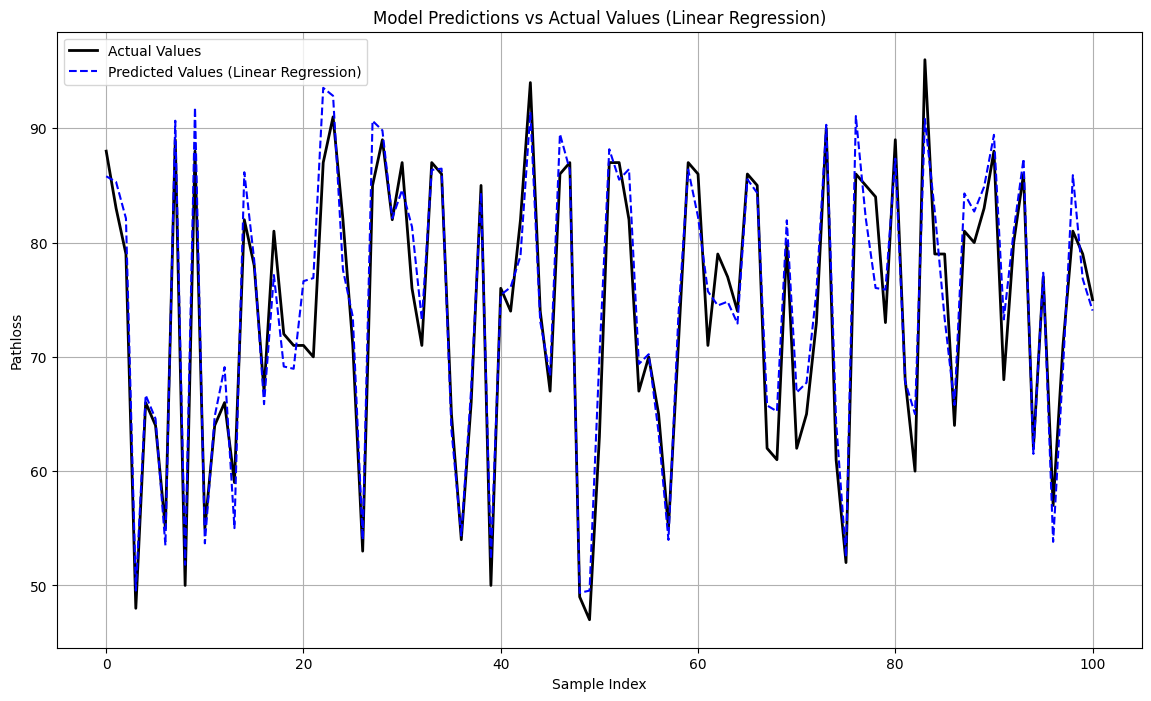

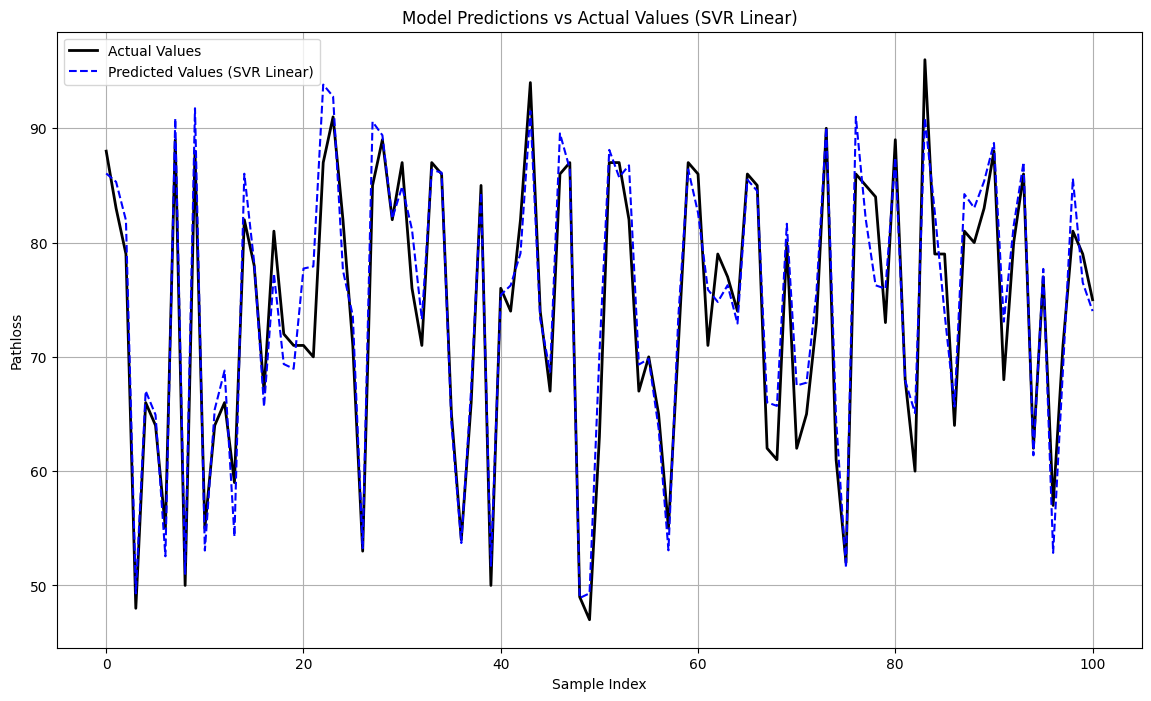

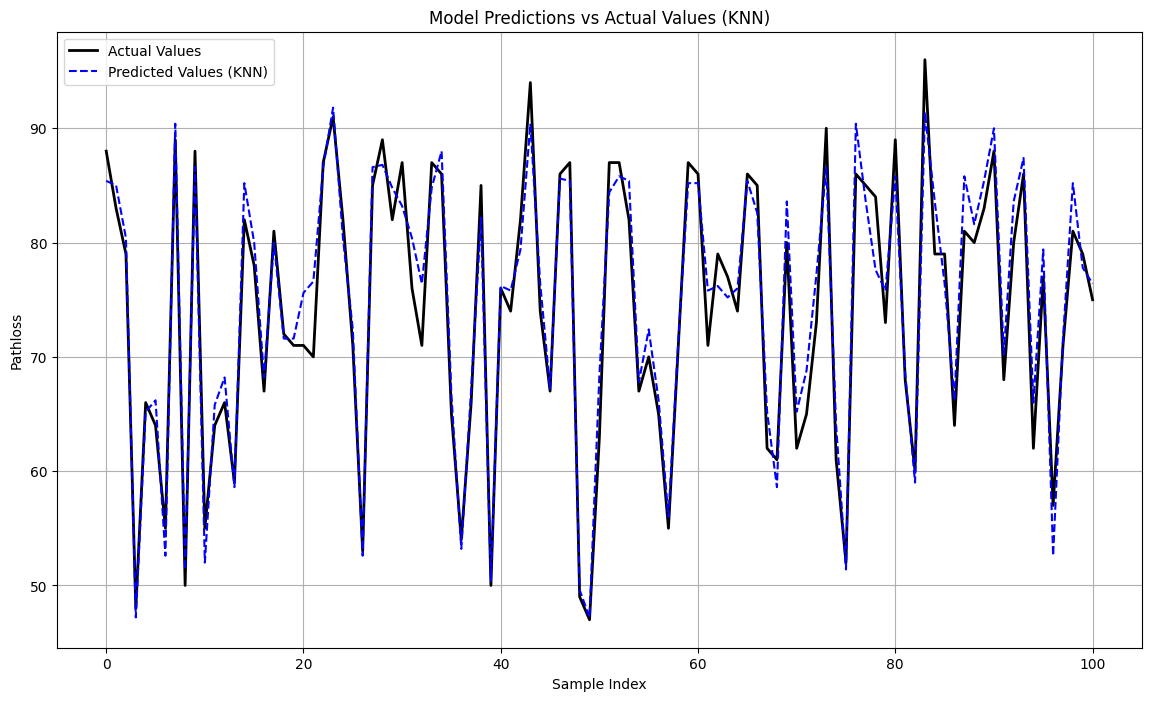

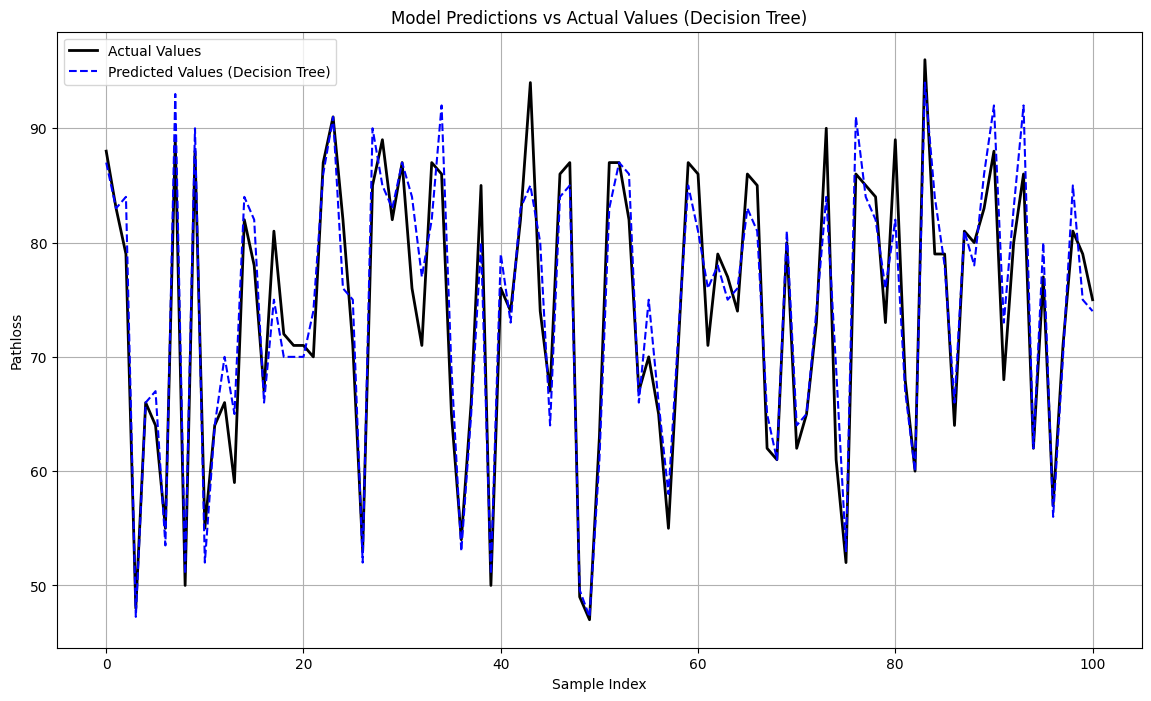

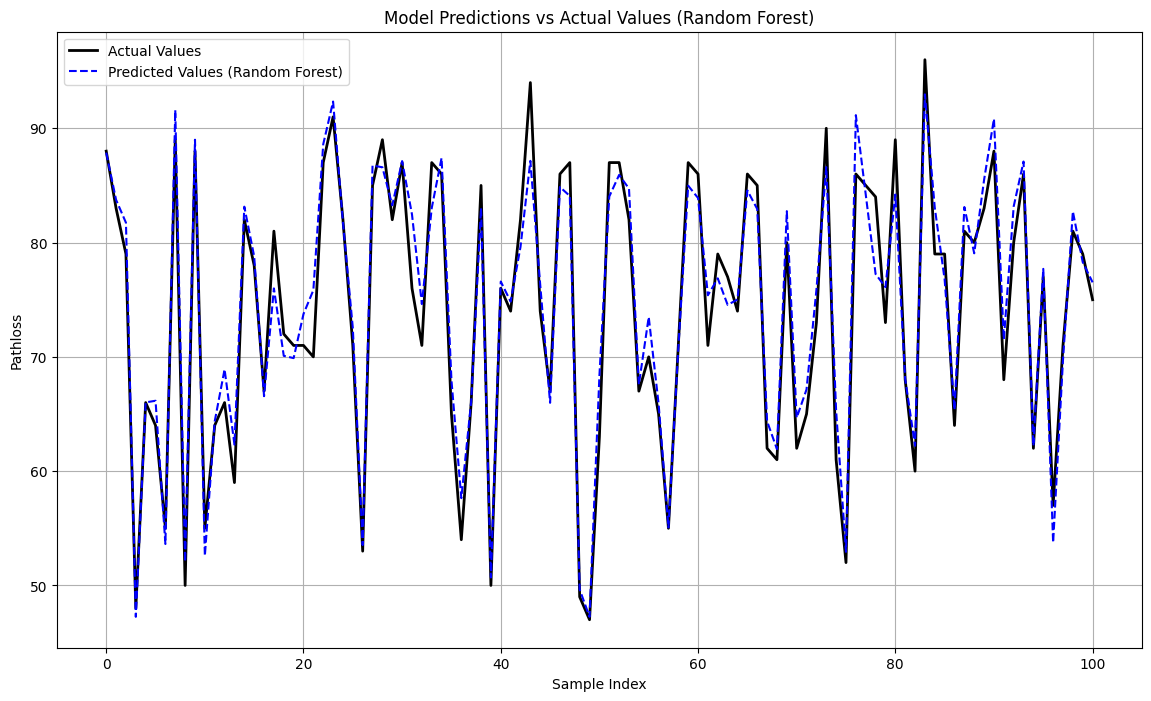

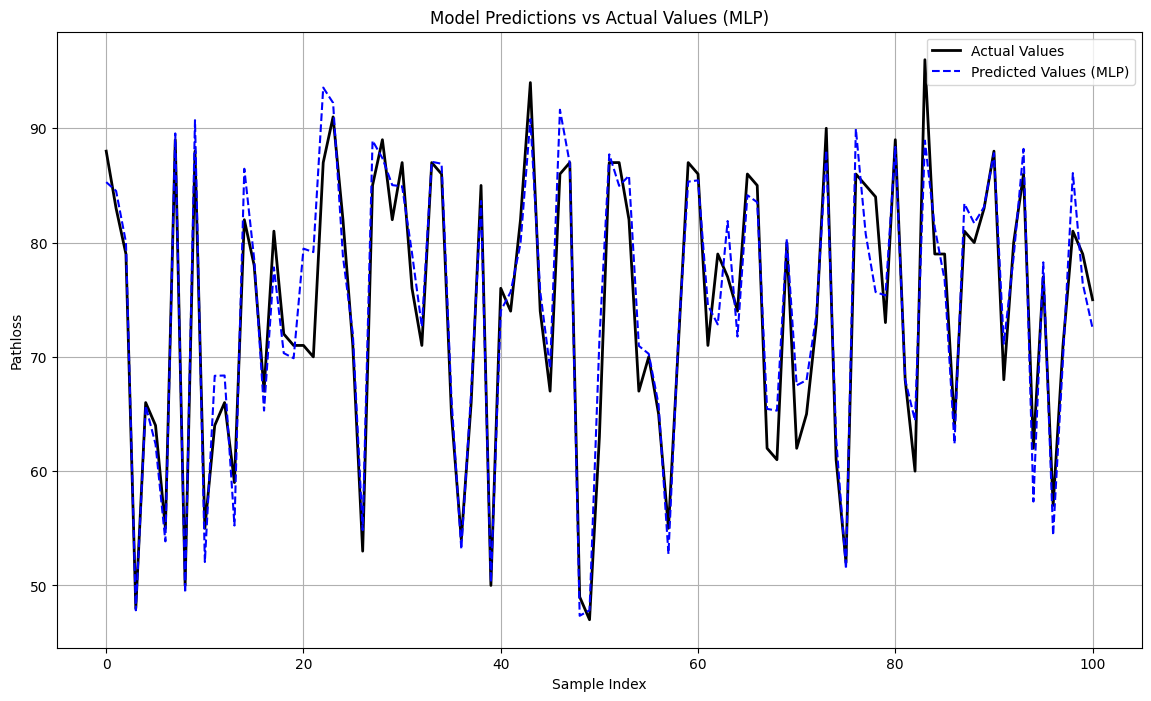

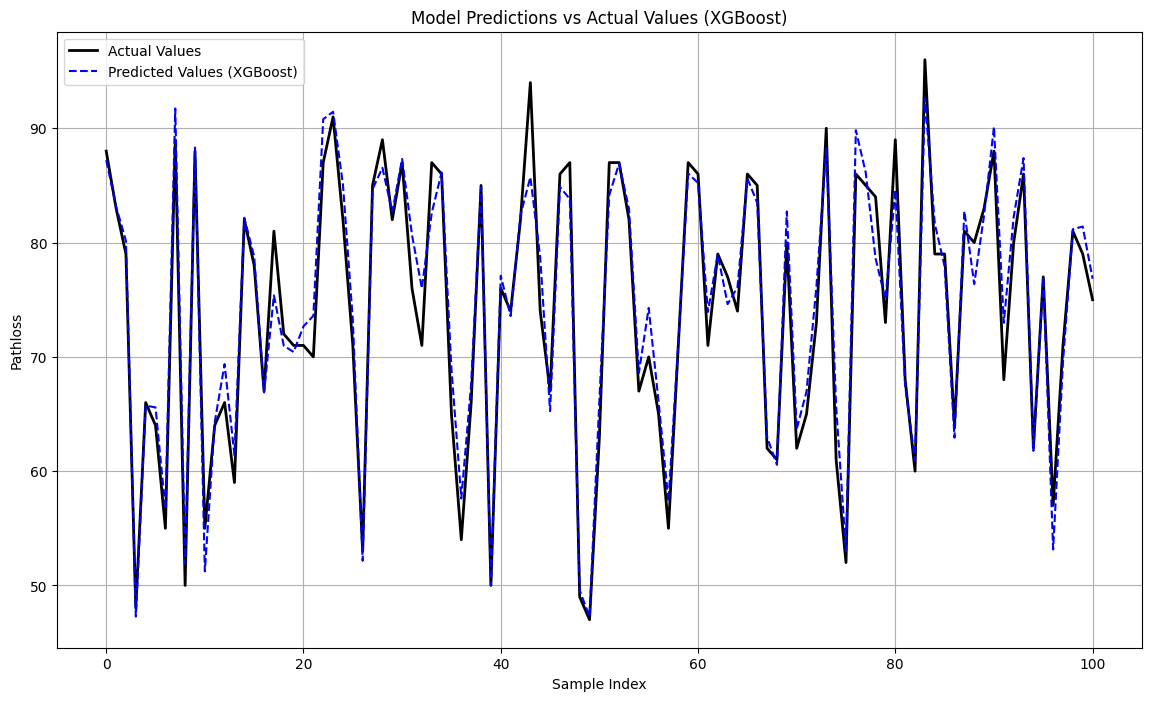

Linear Regression: MAE = 2.48, RMSE = 3.05, R2 = 0.94
SVR Linear: MAE = 2.48, RMSE = 3.11, R2 = 0.93
KNN: MAE = 2.23, RMSE = 2.67, R2 = 0.95
Decision Tree: MAE = 2.69, RMSE = 3.43, R2 = 0.92
Random Forest: MAE = 2.10, RMSE = 2.61, R2 = 0.95
MLP: MAE = 2.44, RMSE = 3.15, R2 = 0.93
XGBoost: MAE = 1.91, RMSE = 2.50, R2 = 0.96


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('combined_measurements.csv')

# Assuming the target variable is in the column named 'Pathloss'
X = data.drop('Pathloss', axis=1)
y = data['Pathloss']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models initialization
models = {
    'Linear Regression': LinearRegression(),
    'SVR Linear': SVR(kernel='linear'),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'MLP': MLPRegressor(max_iter=1000),
    'XGBoost': XGBRegressor()
}

# Results dictionary to store metrics for each model
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the testing set
    predictions = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    
    # Store results
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}
    
    # Plot actual vs predicted values for each model
    plt.figure(figsize=(14, 8))
    plt.plot(y_test.values, label='Actual Values', color='black', linewidth=2)
    plt.plot(predictions, label=f'Predicted Values ({name})', color='blue', linestyle='--')
    plt.title(f'Model Predictions vs Actual Values ({name})')
    plt.xlabel('Sample Index')
    plt.ylabel('Pathloss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Print results
for name, metrics in results.items():
    print(f"{name}: MAE = {metrics['MAE']:.2f}, RMSE = {metrics['RMSE']:.2f}, R2 = {metrics['R2']:.2f}")


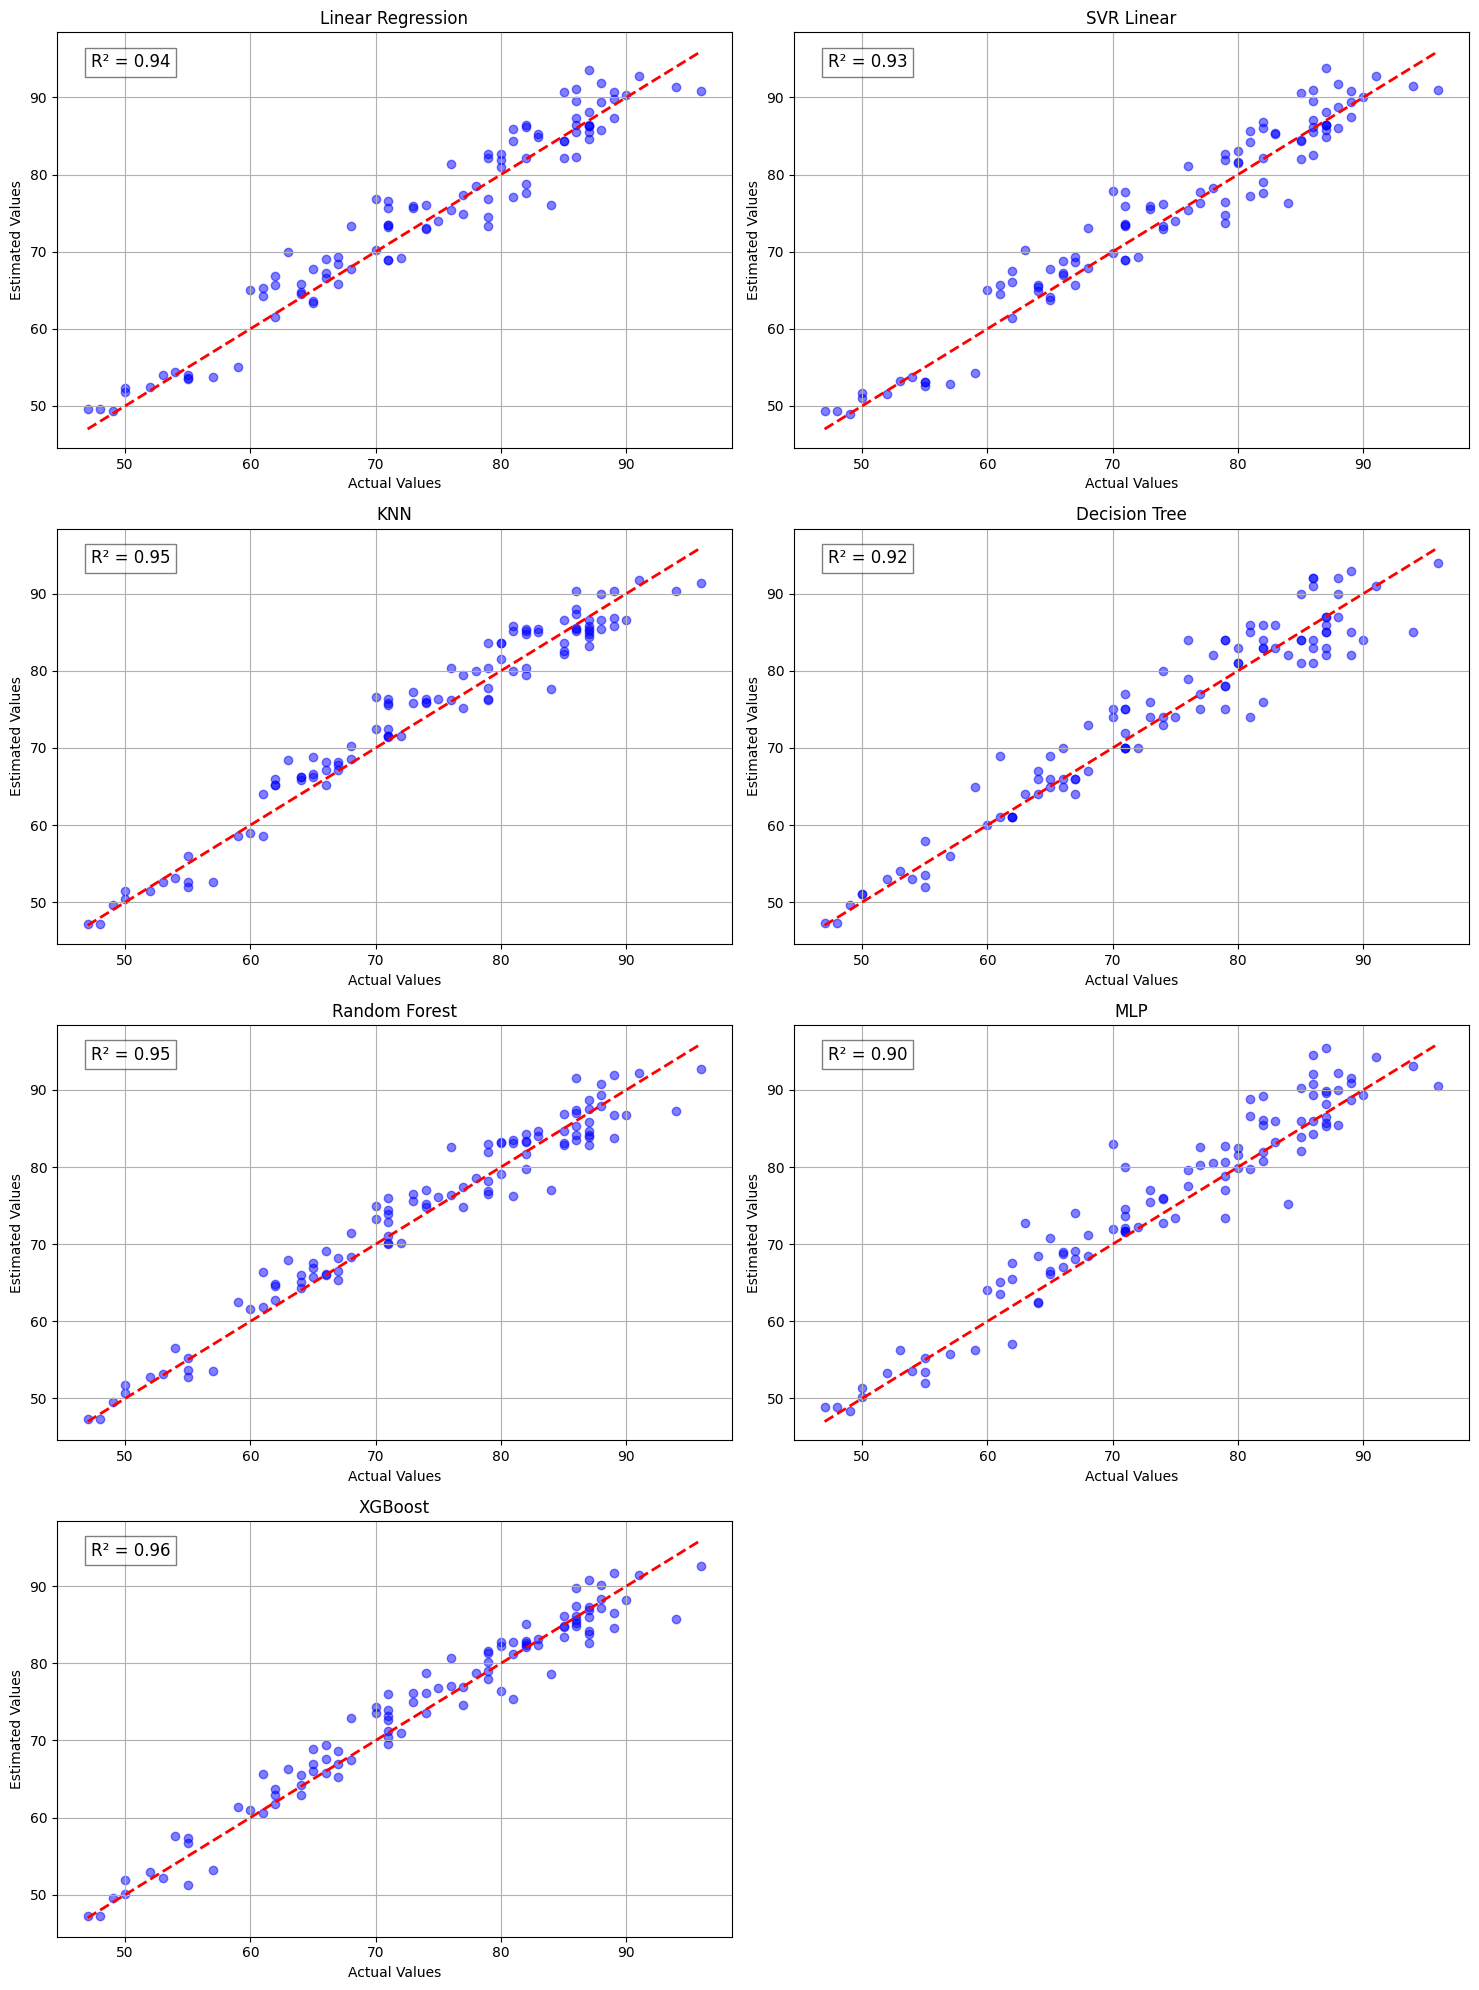

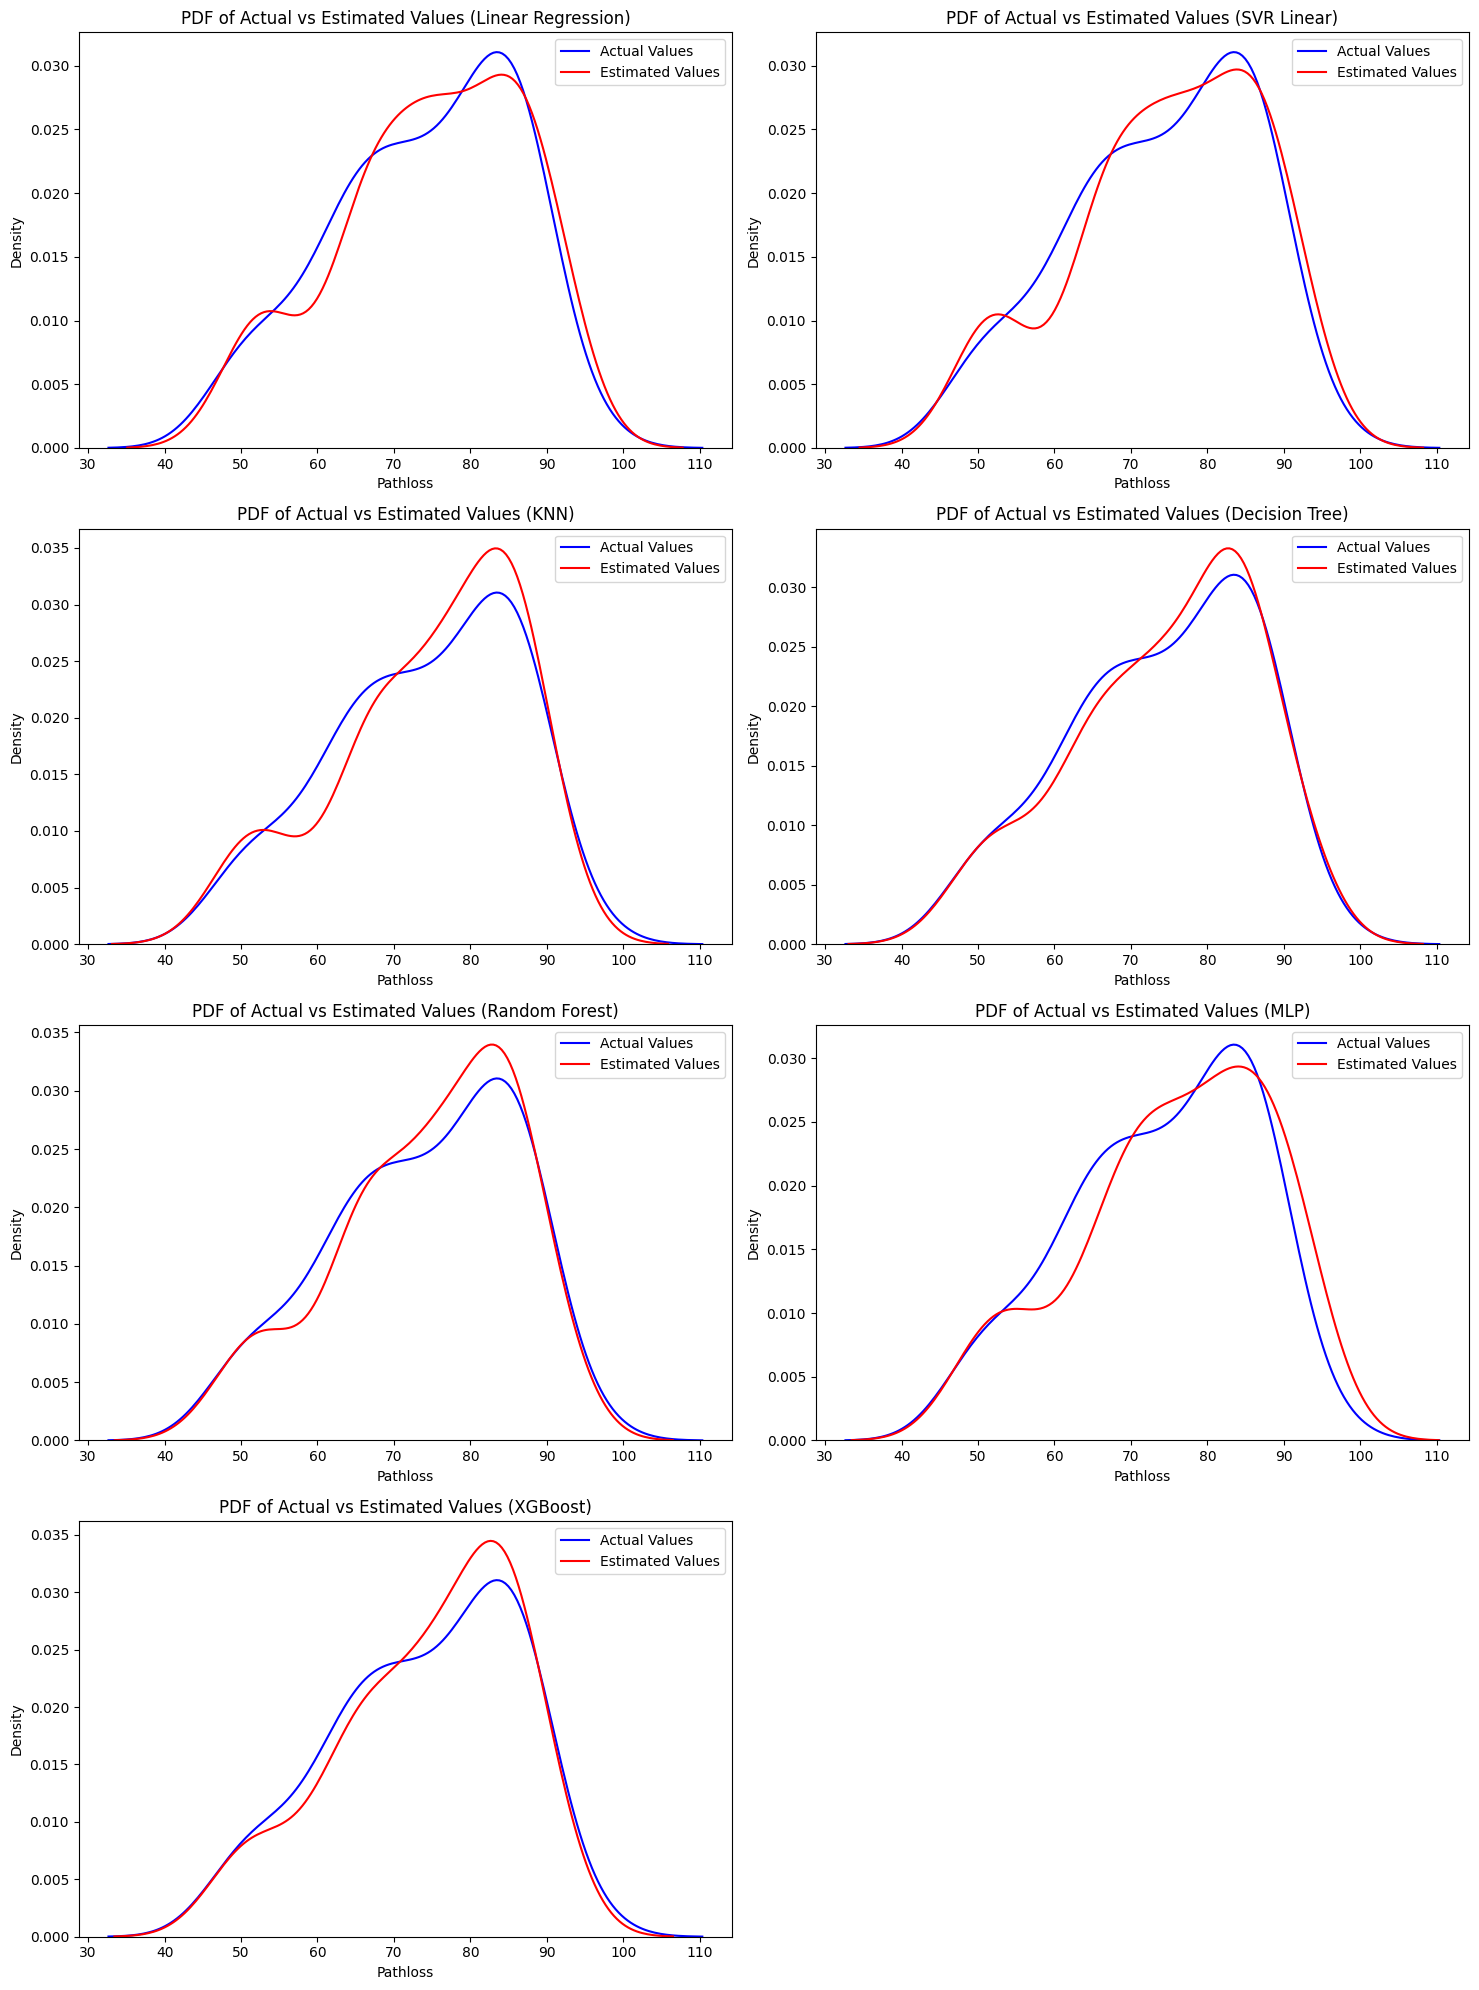

Linear Regression: MAE = 2.48, RMSE = 3.05, R2 = 0.94
SVR Linear: MAE = 2.48, RMSE = 3.11, R2 = 0.93
KNN: MAE = 2.23, RMSE = 2.67, R2 = 0.95
Decision Tree: MAE = 2.61, RMSE = 3.40, R2 = 0.92
Random Forest: MAE = 2.12, RMSE = 2.64, R2 = 0.95
MLP: MAE = 2.87, RMSE = 3.77, R2 = 0.90
XGBoost: MAE = 1.91, RMSE = 2.50, R2 = 0.96


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('combined_measurements.csv')

# Assuming the target variable is in the column named 'Pathloss'
X = data.drop('Pathloss', axis=1)
y = data['Pathloss']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models initialization
models = {
    'Linear Regression': LinearRegression(),
    'SVR Linear': SVR(kernel='linear'),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'MLP': MLPRegressor(max_iter=1000),
    'XGBoost': XGBRegressor()
}

# Results dictionary to store metrics for each model
results = {}

# Set up the figure and axis grid for subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()  # Flatten the 2D array to 1D for easier iteration

# Train and evaluate each model
for i, (name, model) in enumerate(models.items()):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the testing set
    predictions = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    
    # Store results
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}
    
    # Scatter plot of actual vs estimated values for each model
    ax = axes[i]
    ax.scatter(y_test, predictions, alpha=0.5, color='blue')
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
    ax.set_title(name)
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Estimated Values')
    ax.grid(True)
    
    # Place the R² value inside the plot
    ax.text(0.05, 0.95, f'R² = {r2:.2f}', transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
# Adjust layout
plt.tight_layout()

# If there are fewer models than subplots, hide empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

# Set up the figure and axis grid for PDF plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

# Generate PDF plots for each model
for i, (name, model) in enumerate(models.items()):
    ax = axes[i]
    
    # KDE plot for actual values
    sns.kdeplot(y_test, ax=ax, color='blue', label='Actual Values')
    
    # KDE plot for estimated values
    predictions = model.predict(X_test)
    sns.kdeplot(predictions, ax=ax, color='red', label='Estimated Values')
    
    ax.set_title(f'PDF of Actual vs Estimated Values ({name})')
    ax.set_xlabel('Pathloss')
    ax.set_ylabel('Density')
    ax.legend()

# Adjust layout for PDF plots
plt.tight_layout()

# If there are fewer models than subplots, hide empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

# Print results
for name, metrics in results.items():
    print(f"{name}: MAE = {metrics['MAE']:.2f}, RMSE = {metrics['RMSE']:.2f}, R2 = {metrics['R2']:.2f}")


In [29]:
import pandas as pd

# Read CSV into a DataFrame
df = pd.read_csv('guassian_synthetic_data.csv')

# Convert negative values to positive
df = df.abs()

# Write back to CSV
df.to_csv('guassian_synthetic_data.csv', index=False)


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Function to split and save CSV files
def split_and_save_csv(file_path, train_ratio=0.9):
    # Read the CSV file
    data = pd.read_csv(file_path)
    
    # Split the data
    train_data, test_data = train_test_split(data, train_size=train_ratio, random_state=42)
    
    # Generate new file names
    base_name = file_path.split('.')[0]
    train_file_name = f"data_1.5-1.5_train.csv"
    test_file_name = f"data_1.5-1.5_test.csv"
    
    # Save the splits into new CSV files
    train_data.to_csv(train_file_name, index=False)
    test_data.to_csv(test_file_name, index=False)
    
    print(f"Saved {train_file_name} and {test_file_name}")

# Split and save data 1-1.5
split_and_save_csv('data_1.5-1.5.csv')




Saved data_1.5-1.5_train.csv and data_1.5-1.5_test.csv


## Synthetic data Evaluation Metrics

In [4]:
import pandas as pd
from sdmetrics.reports.single_table import QualityReport

# Load your datasets
real_data = pd.read_csv('measurements.csv')
synthetic_data = pd.read_csv('data_GAN.csv')

# Ensure columns match
assert real_data.columns.tolist() == synthetic_data.columns.tolist(), "Columns do not match!"
synthetic_data = synthetic_data[real_data.columns]

# Define metadata with correct format
metadata = {
    'columns': {col: {'sdtype': 'numerical'} for col in real_data.columns}
}

# Initialize the QualityReport
my_report = QualityReport()

# Generate the quality report
my_report.generate(real_data, synthetic_data, metadata)



Generating report ...

(1/2) Evaluating Column Shapes: |          | 0/16 [00:00<?, ?it/s]|

(1/2) Evaluating Column Shapes: |██████████| 16/16 [00:00<00:00, 285.68it/s]|
Column Shapes Score: 88.18%

(2/2) Evaluating Column Pair Trends: |██████████| 120/120 [00:00<00:00, 173.54it/s]|
Column Pair Trends Score: 95.34%

Overall Score (Average): 91.76%



## CT GAN Code

In [7]:
import pandas as pd
from ctgan import CTGAN

# Load your dataset
real_data = pd.read_csv('measurements.csv')

# No discrete columns in your dataset
discrete_columns = []

# Initialize CTGAN model with specified epochs
ctgan = CTGAN(epochs=300)

# Train the CTGAN model on your dataset
ctgan.fit(real_data, discrete_columns)

# Create synthetic data with the same number of rows as the real data
synthetic_data = ctgan.sample(1000)

# Save the synthetic data to a new CSV file
synthetic_data.to_csv('CTGAN_synthetic_data.csv', index=False)




## Guassian Data Code

In [10]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import numpy as np

# Load your dataset
real_data = pd.read_csv('measurements.csv')

# Fit the Gaussian Mixture Model
n_components = 4  # Number of Gaussian components to use
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(real_data)

# Generate synthetic data with the same number of rows as the real data
synthetic_data = gmm.sample(n_samples=1000)[0]

# Convert the synthetic data to a DataFrame
synthetic_data = pd.DataFrame(synthetic_data, columns=real_data.columns)

# Save the synthetic data to a new CSV file
synthetic_data.to_csv('GMM_synthetic_data.csv', index=False)




## Couplas Code

In [11]:
import pandas as pd
from copulas.multivariate import GaussianMultivariate

# Load your dataset
real_data = pd.read_csv('measurements.csv')

# Initialize and fit the Gaussian Copula model
copula = GaussianMultivariate()
copula.fit(real_data)

# Generate synthetic data with the same number of rows as the real data
synthetic_data = copula.sample(1000)

# Convert the synthetic data to a DataFrame
synthetic_data = pd.DataFrame(synthetic_data, columns=real_data.columns)

# Save the synthetic data to a new CSV file
synthetic_data.to_csv('coupla_synthetic_data.csv', index=False)




c:\Users\G Vijayalakshmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\G Vijayalakshmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:723: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))
c:\Users\G Vijayalakshmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:6338: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
c:\Users\G Vijayalakshmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:6338: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
c:\Users\G Vijayalakshmi\AppData\Local\Programs\Python\Python311\

## Rounding

In [17]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('GMM_synthetic_data.csv')

# Round off the specified columns
df['No of Trees'] = df['No of Trees'].round(0).astype(int)
df['Pathloss'] = df['Pathloss'].round(0)
df['Angle'] = df['Angle'].round(0)
df['Trunk Radius'] = df['Trunk Radius'].round(2)
df['Trunk Height'] = df['Trunk Height'].round(2)
df['Radius of Canopy'] = df['Radius of Canopy'].round(2)
df['Height'] = df['Height'].round(2)
df['Distance'] = df['Distance'].round(2)
df['Height of Transmitter'] = df['Height of Transmitter'].round(1)

# Save the updated DataFrame to a new CSV file
df.to_csv('coupla_synthetic_data.csv', index=False)


In [20]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('CTGAN_synthetic_data.csv')

# Convert all values to their absolute values
df = df.abs()

# Save the modified DataFrame back to a CSV file
df.to_csv('CTGAN_synthetic_data.csv', index=False)




## Coombining two csv

In [18]:
#combining two csv files
import pandas as pd

# Load the two CSV files into DataFrames
df1 = pd.read_csv('measurements.csv')
df2 = pd.read_csv('data_final_1000.csv')

# Concatenate the two DataFrames along the rows
combined_df = pd.concat([df1, df2], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('data_final_1000.csv', index=False)


## Running Models on GAN Data

C:\Users\G Vijayalakshmi\AppData\Local\Temp\ipykernel_14888\1220478958.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


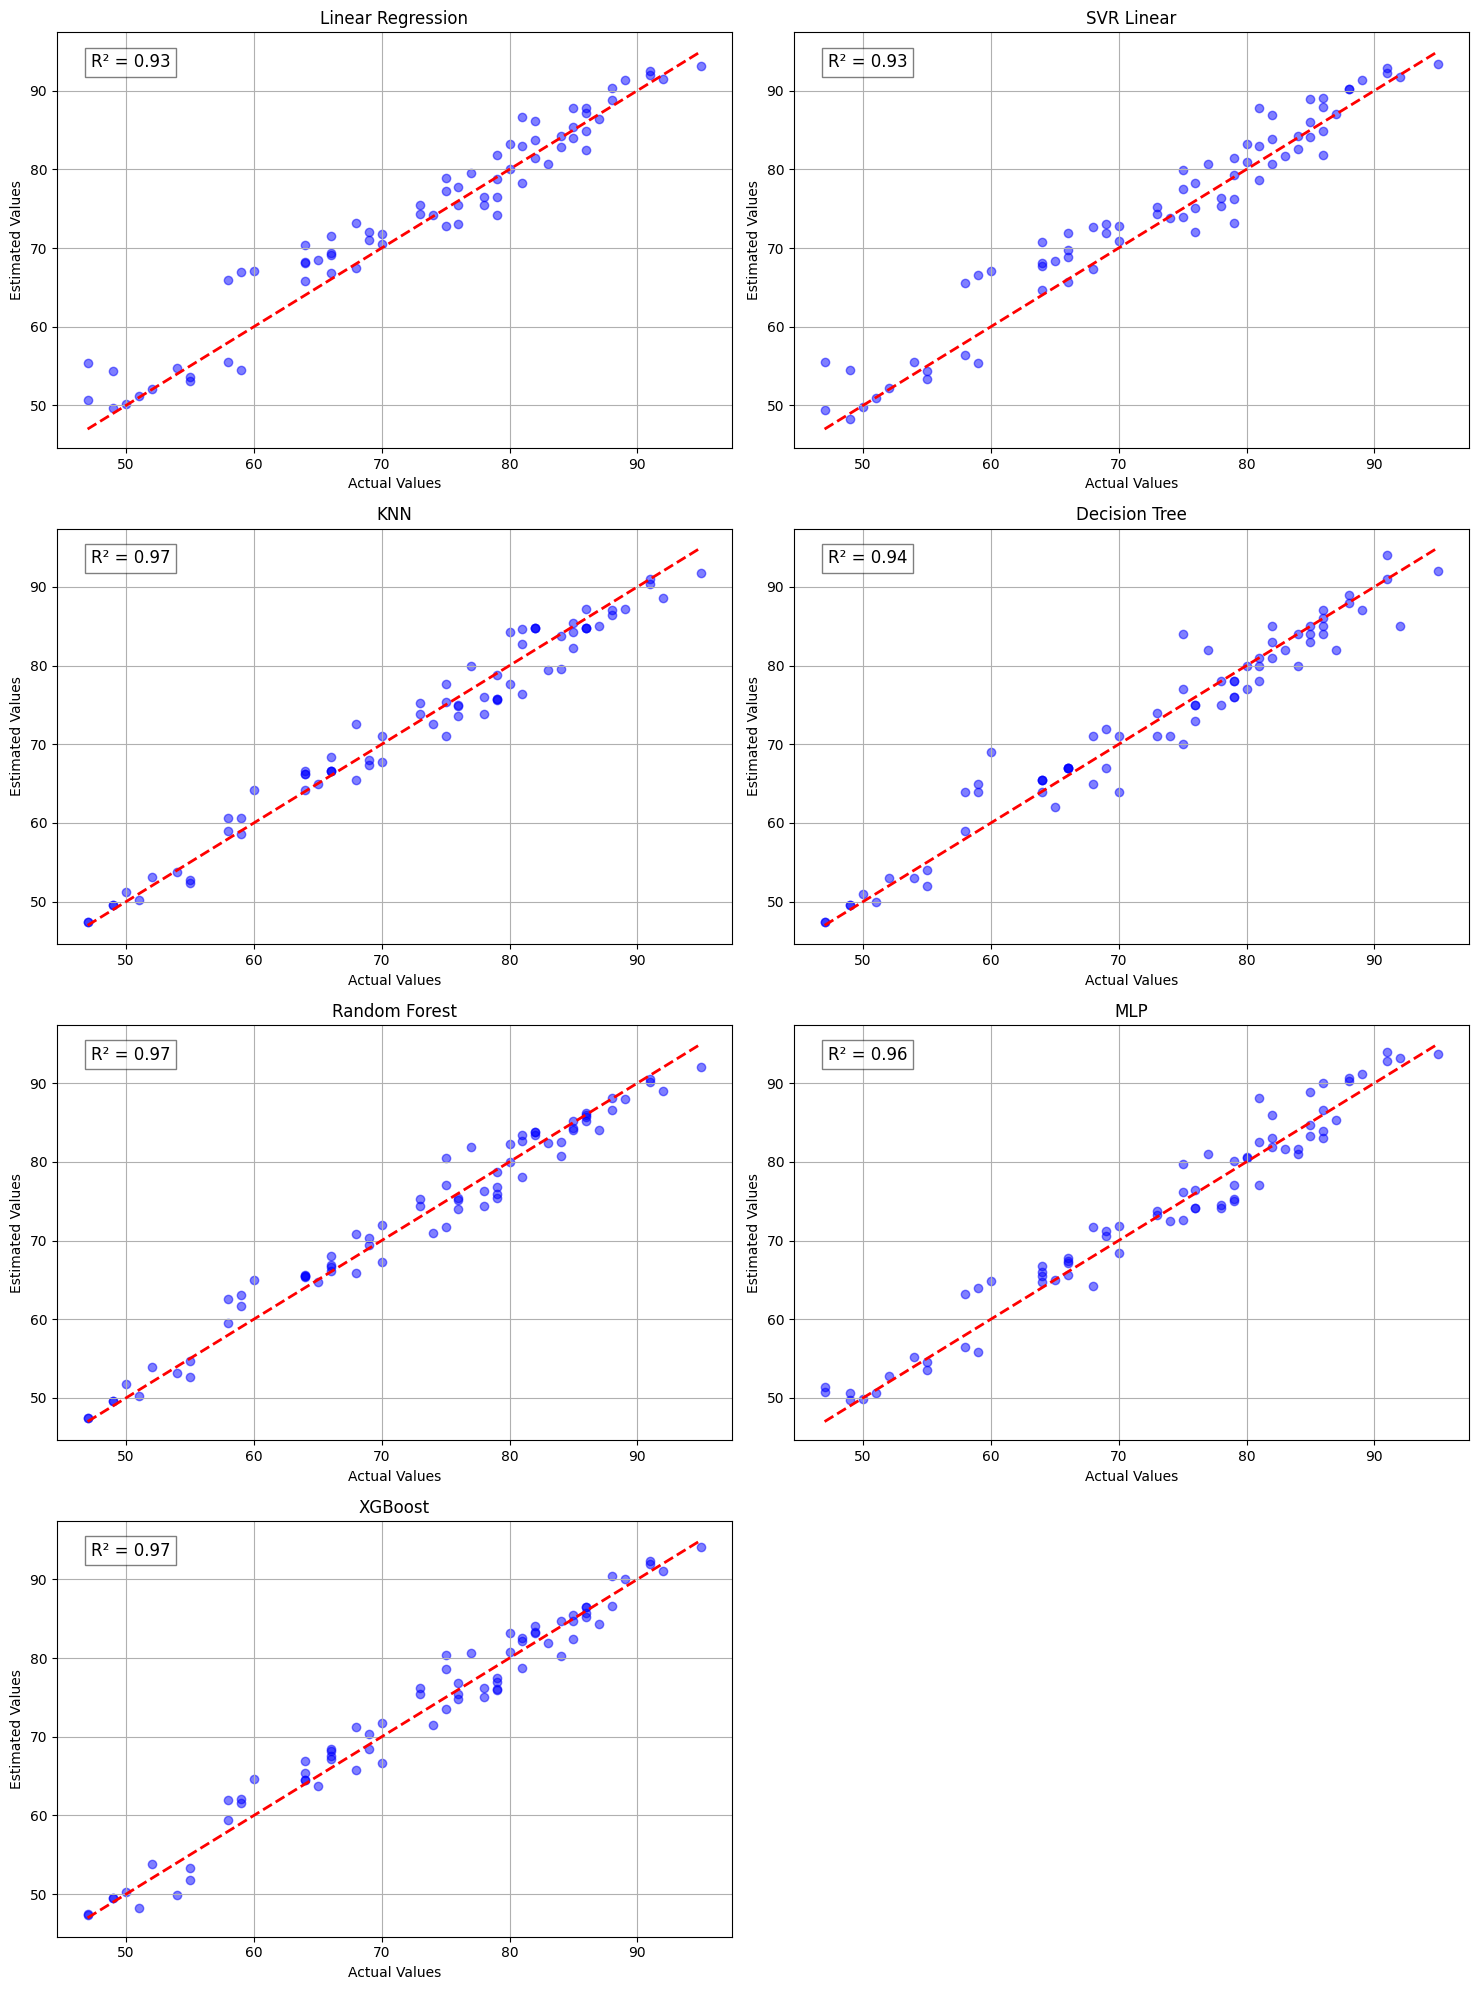

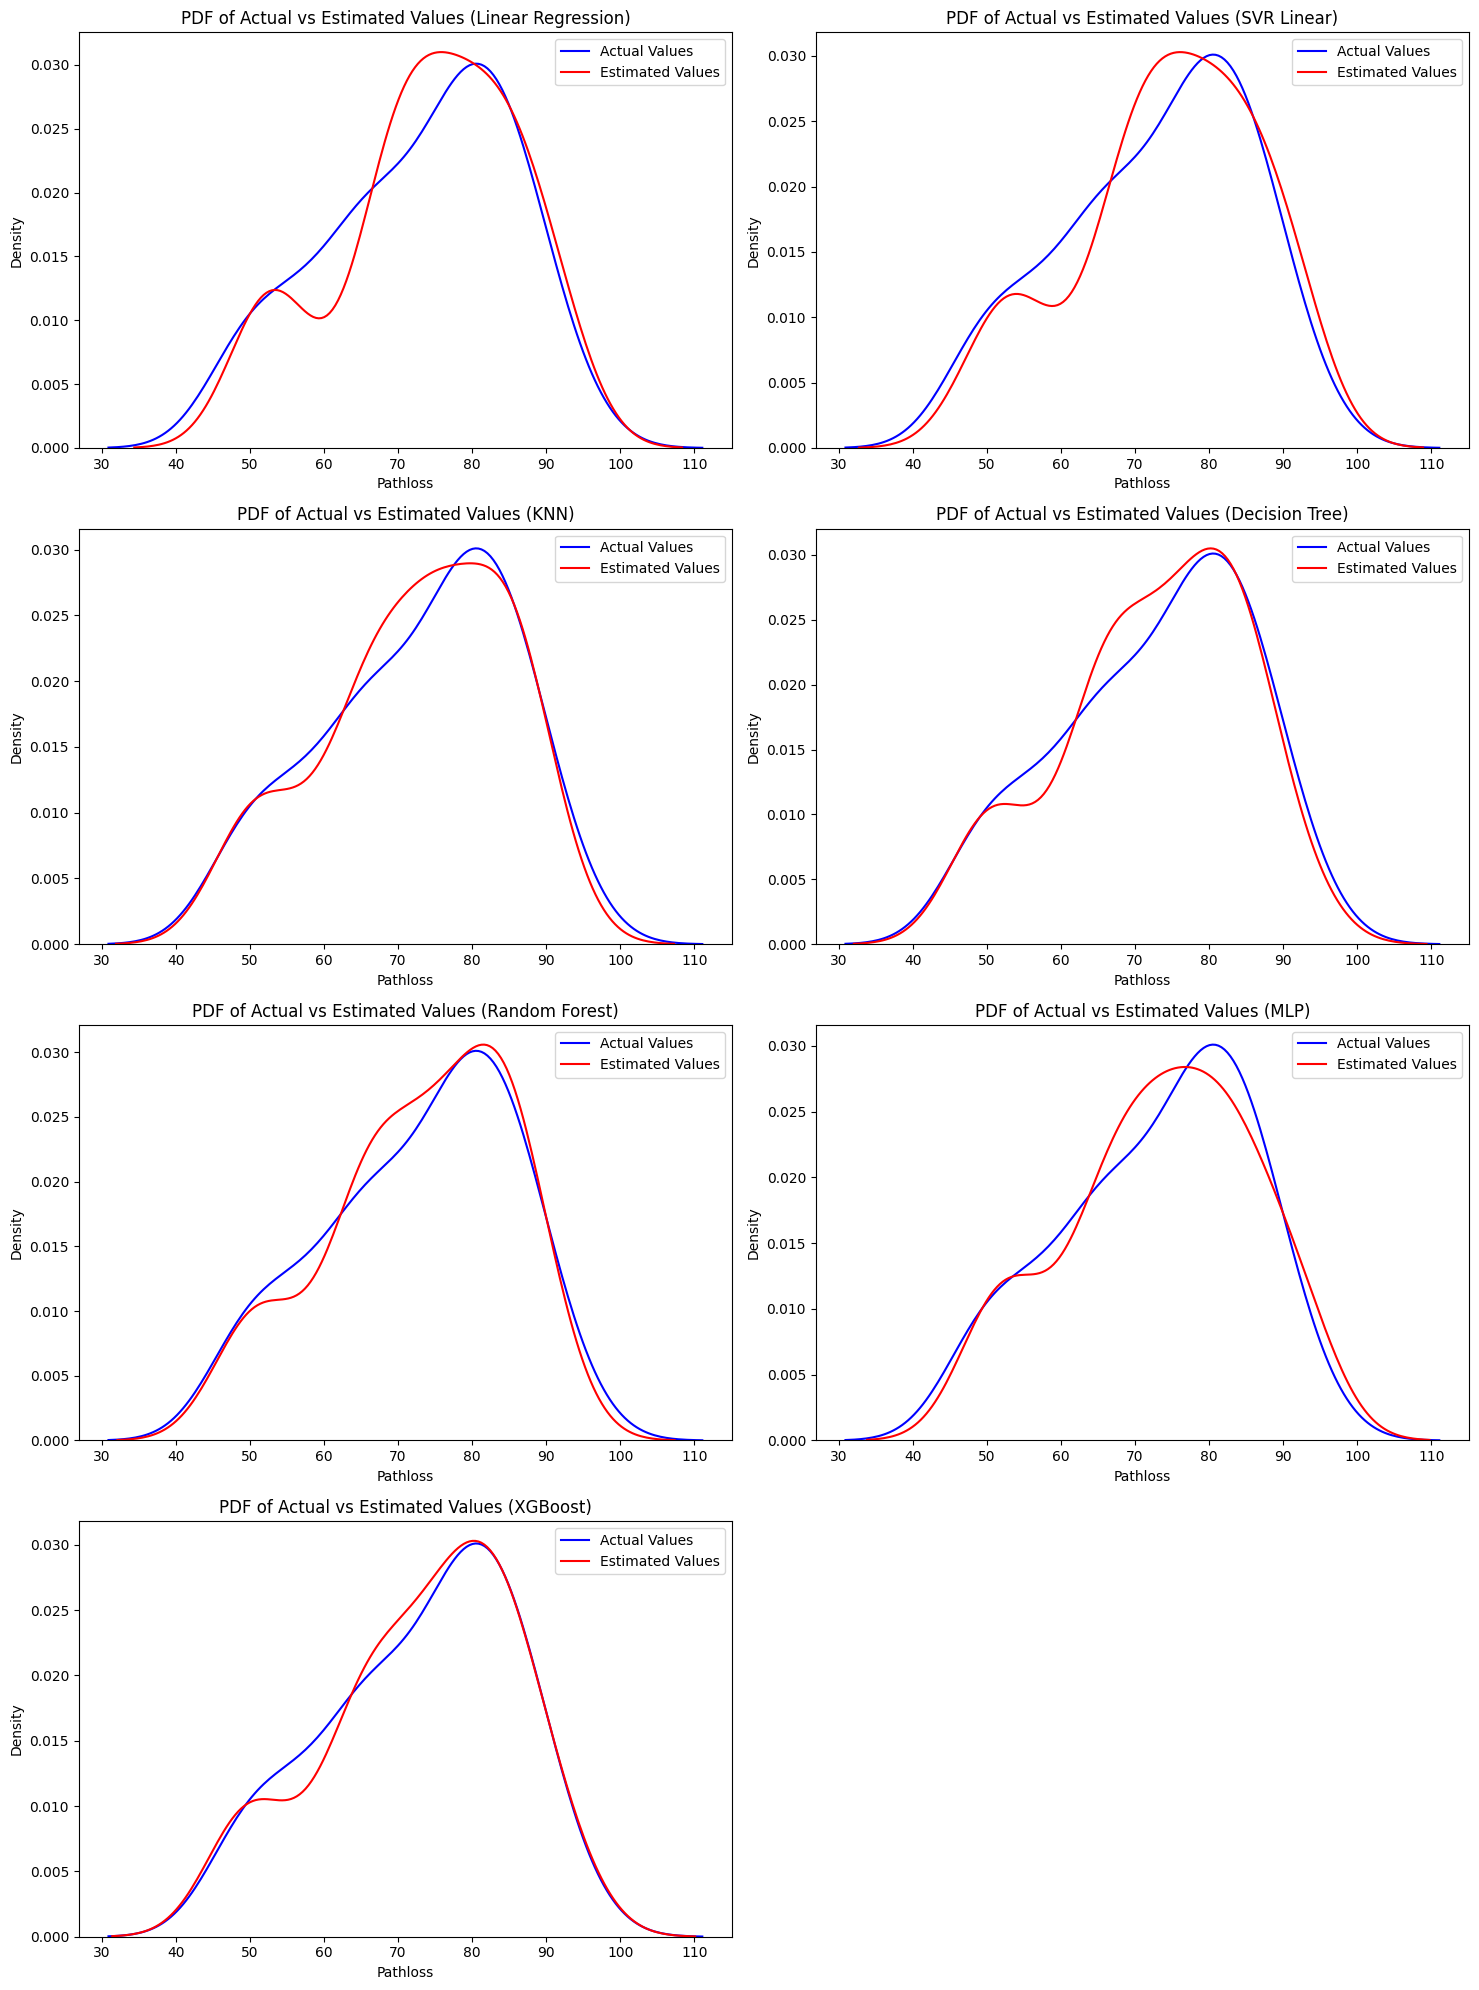

Linear Regression: MAE = 2.50, RMSE = 3.20, R2 = 0.93
SVR Linear: MAE = 2.62, RMSE = 3.33, R2 = 0.93
KNN: MAE = 1.88, RMSE = 2.27, R2 = 0.97
Decision Tree: MAE = 2.15, RMSE = 2.95, R2 = 0.94
Random Forest: MAE = 1.74, RMSE = 2.16, R2 = 0.97
MLP: MAE = 2.16, RMSE = 2.62, R2 = 0.96
XGBoost: MAE = 1.84, RMSE = 2.19, R2 = 0.97


In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training dataset
train_data = pd.read_csv('data_GAN.csv')

# Load the test dataset
test_data = pd.read_csv('test.csv')

# Assuming the target variable is in the column named 'Pathloss'
X_train = train_data.drop('Pathloss', axis=1)
y_train = train_data['Pathloss']
X_test = test_data.drop('Pathloss', axis=1)
y_test = test_data['Pathloss']

# Models initialization
models = {
    'Linear Regression': LinearRegression(),
    'SVR Linear': SVR(kernel='linear'),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'MLP': MLPRegressor(max_iter=1000),
    'XGBoost': XGBRegressor()
}

# Results dictionary to store metrics for each model
results = {}

# Set up the figure and axis grid for subplots (scatter plots)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()  # Flatten the 2D array to 1D for easier iteration

# Train and evaluate each model
for i, (name, model) in enumerate(models.items()):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    predictions = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    
    # Store results
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}
    
    # Scatter plot of actual vs estimated values for each model
    ax = axes[i]
    ax.scatter(y_test, predictions, alpha=0.5, color='blue')
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
    ax.set_title(name)
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Estimated Values')
    ax.grid(True)
    
    # Place the R² value inside the plot
    ax.text(0.05, 0.95, f'R² = {r2:.2f}', transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Adjust layout for scatter plots
plt.tight_layout()

# If there are fewer models than subplots, hide empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

# Set up the figure and axis grid for PDF plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

# Generate PDF plots for each model
for i, (name, model) in enumerate(models.items()):
    ax = axes[i]
    
    # KDE plot for actual values
    sns.kdeplot(y_test, ax=ax, color='blue', label='Actual Values', fill=False)
    
    # KDE plot for estimated values
    predictions = model.predict(X_test)
    sns.kdeplot(predictions, ax=ax, color='red', label='Estimated Values', fill=False)
    
    ax.set_title(f'PDF of Actual vs Estimated Values ({name})')
    ax.set_xlabel('Pathloss')
    ax.set_ylabel('Density')
    ax.legend()

# Adjust layout for PDF plots
plt.tight_layout()

# If there are fewer models than subplots, hide empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

# Print results
for name, metrics in results.items():
    print(f"{name}: MAE = {metrics['MAE']:.2f}, RMSE = {metrics['RMSE']:.2f}, R2 = {metrics['R2']:.2f}")


## Running Models using GMM Data

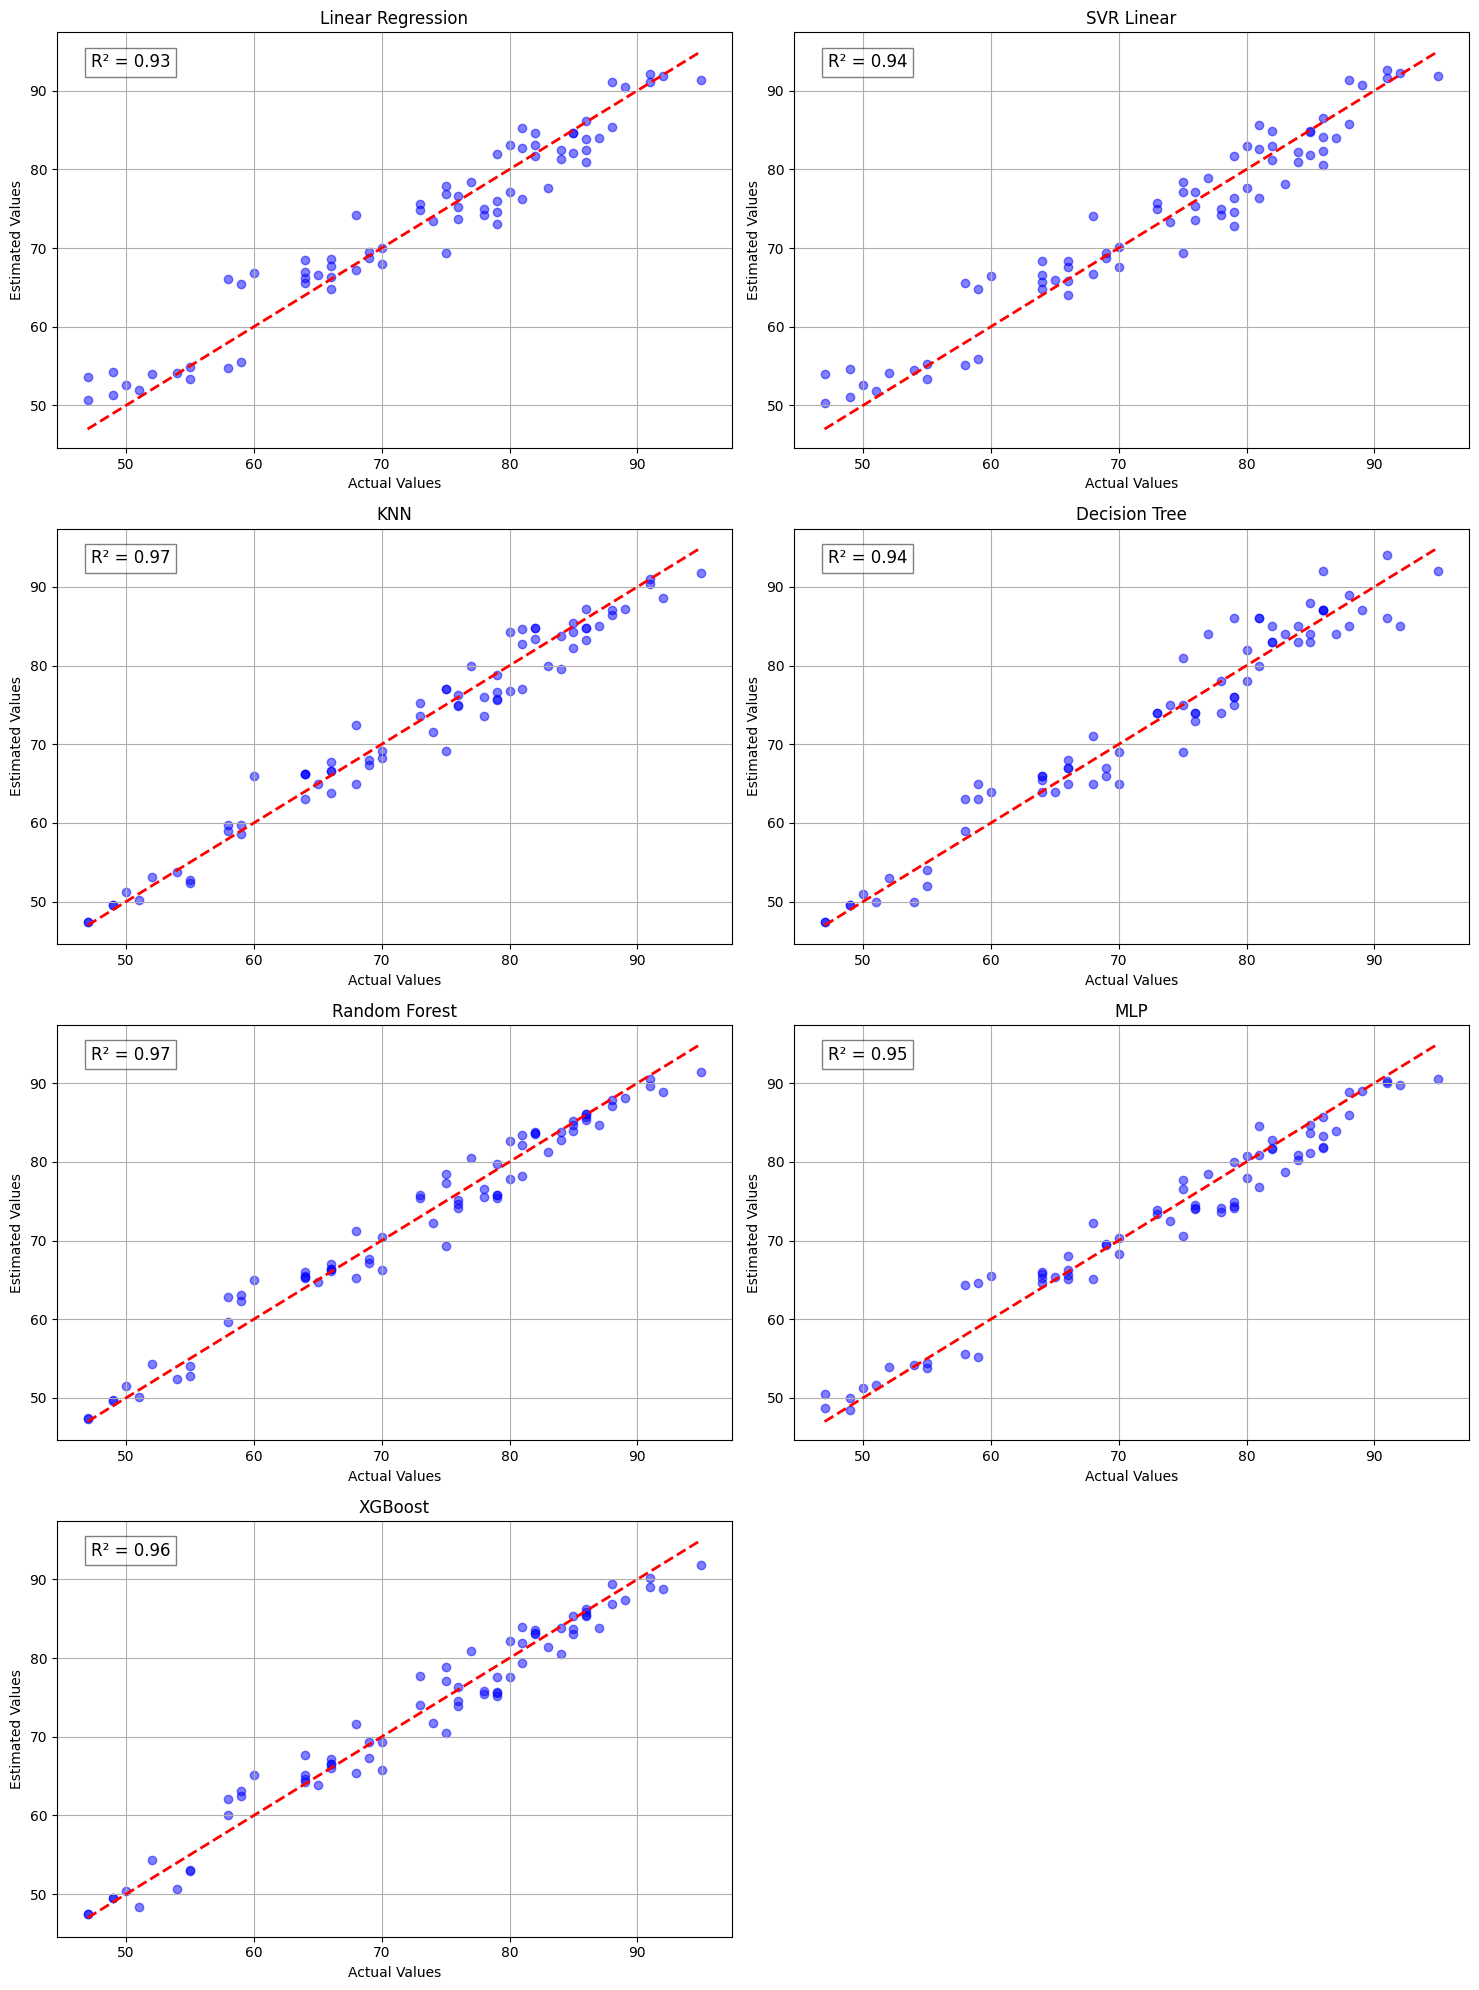

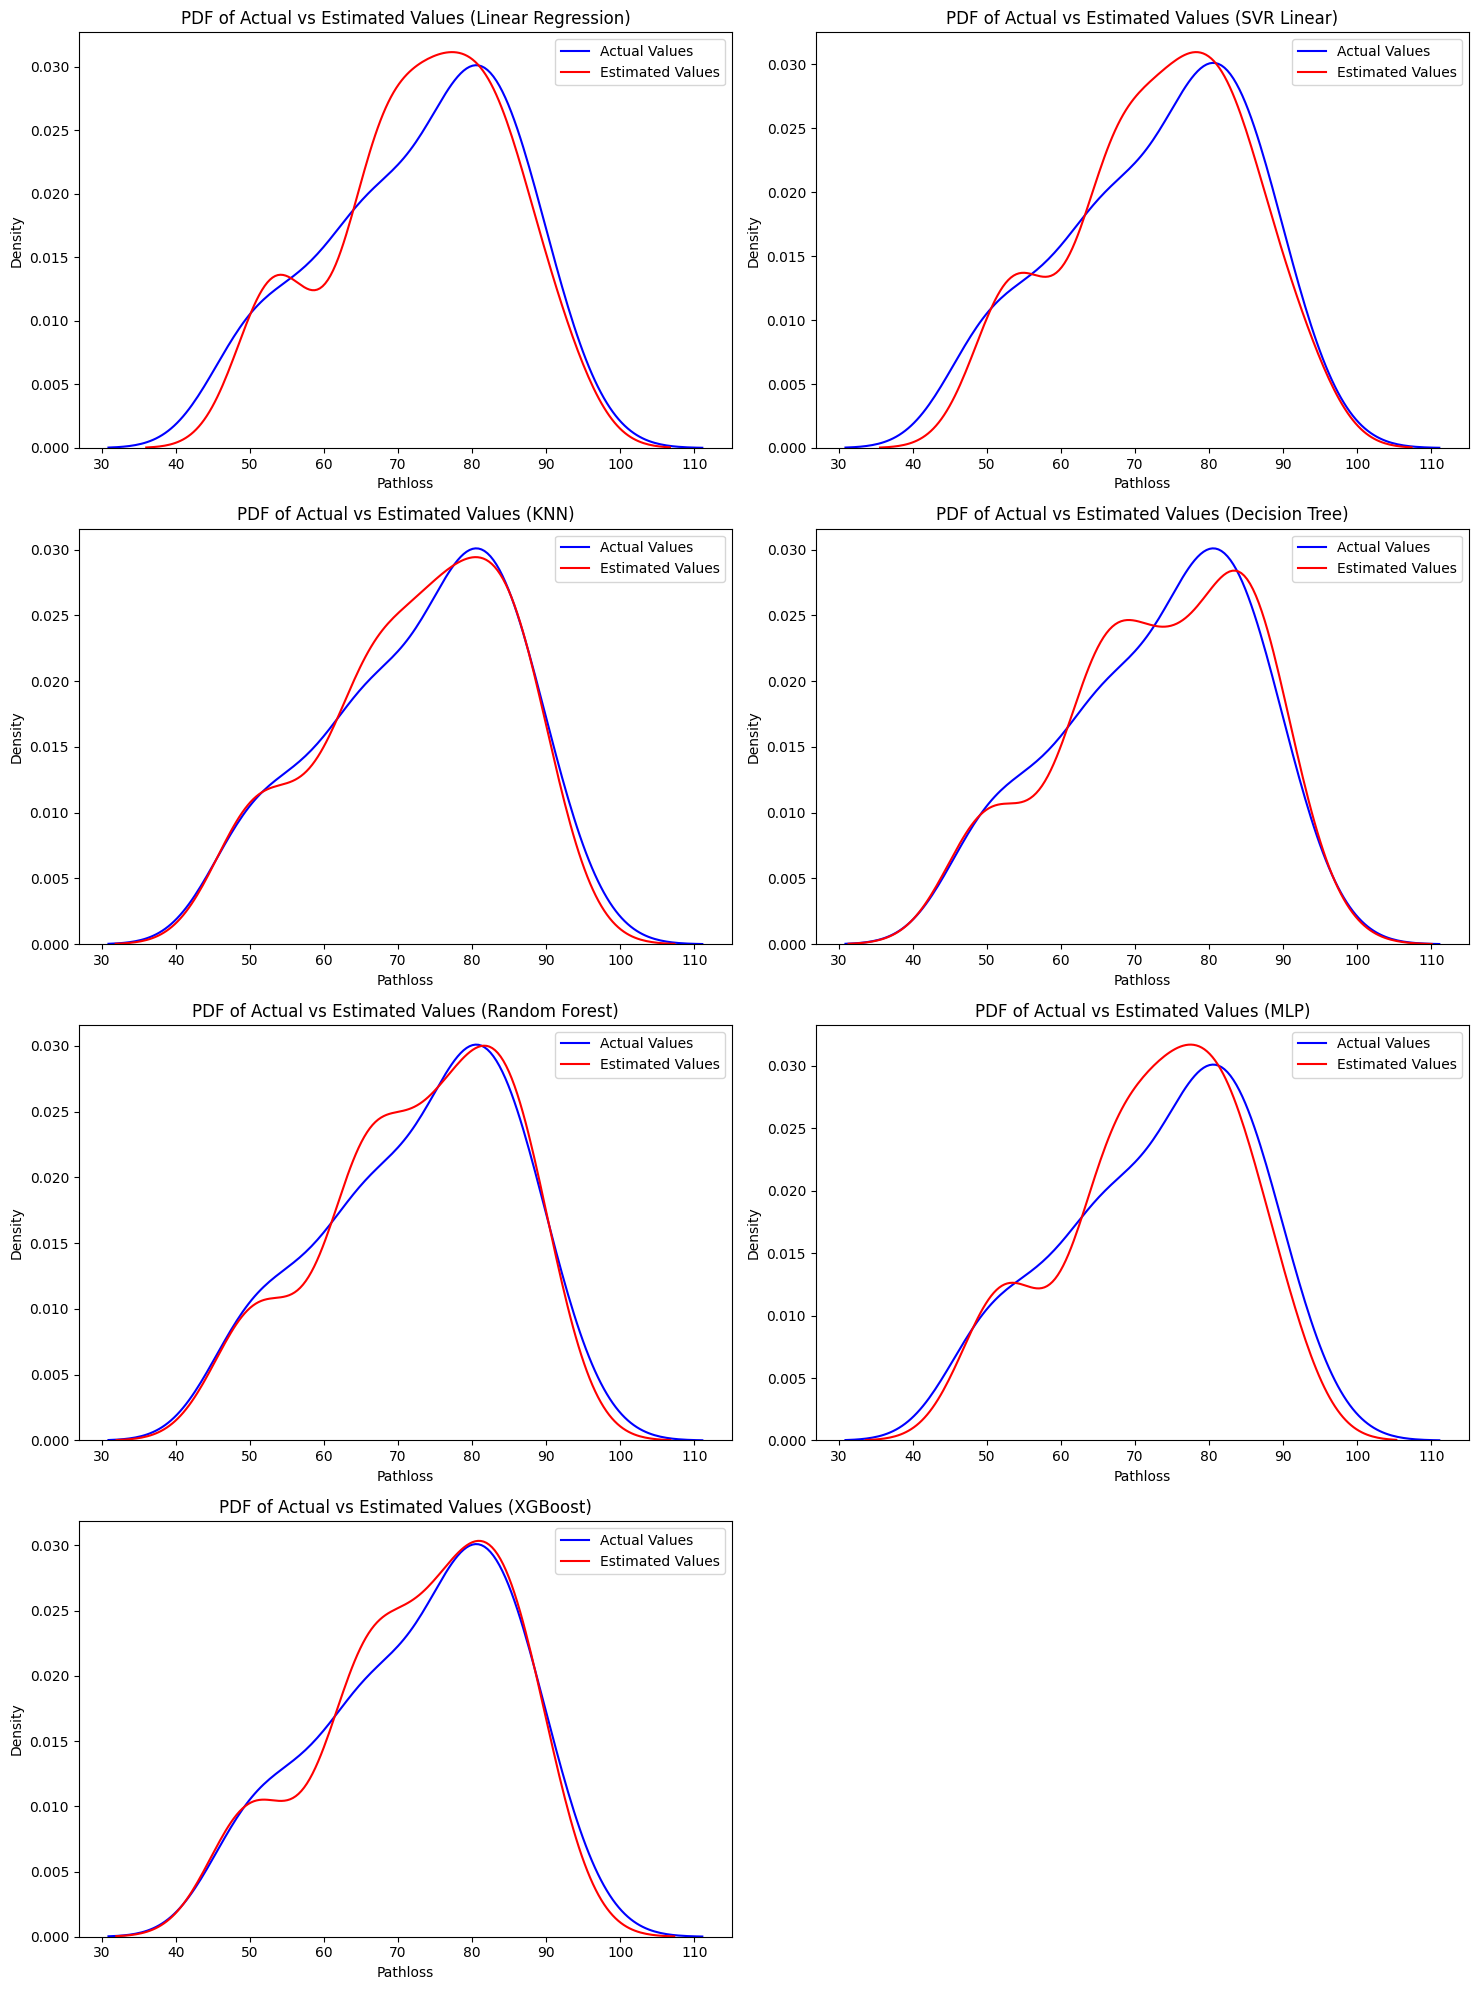

Linear Regression: MAE = 2.58, RMSE = 3.19, R2 = 0.93
SVR Linear: MAE = 2.58, RMSE = 3.15, R2 = 0.94
KNN: MAE = 1.90, RMSE = 2.33, R2 = 0.97
Decision Tree: MAE = 2.45, RMSE = 3.07, R2 = 0.94
Random Forest: MAE = 1.77, RMSE = 2.19, R2 = 0.97
MLP: MAE = 2.11, RMSE = 2.66, R2 = 0.95
XGBoost: MAE = 1.93, RMSE = 2.35, R2 = 0.96


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the training dataset
train_data = pd.read_csv('data_GMM.csv')

# Load the test dataset
test_data = pd.read_csv('test.csv')

# Assuming the target variable is in the column named 'Pathloss'
X_train = train_data.drop('Pathloss', axis=1)
y_train = train_data['Pathloss']
X_test = test_data.drop('Pathloss', axis=1)
y_test = test_data['Pathloss']

# Models initialization
models = {
    'Linear Regression': LinearRegression(),
    'SVR Linear': SVR(kernel='linear'),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'MLP': MLPRegressor(max_iter=1000),
    'XGBoost': XGBRegressor()
}

# Results dictionary to store metrics for each model
results = {}

# Set up the figure and axis grid for subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()  # Flatten the 2D array to 1D for easier iteration

# Train and evaluate each model
for i, (name, model) in enumerate(models.items()):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    predictions = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    
    # Store results
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}
    
    # Scatter plot of actual vs estimated values for each model
    ax = axes[i]
    ax.scatter(y_test, predictions, alpha=0.5, color='blue')
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
    ax.set_title(name)
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Estimated Values')
    ax.grid(True)
    
    # Place the R² value inside the plot
    ax.text(0.05, 0.95, f'R² = {r2:.2f}', transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))


# Adjust layout
plt.tight_layout()

# If there are fewer models than subplots, hide empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

# Set up the figure and axis grid for PDF plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

# Generate PDF plots for each model
for i, (name, model) in enumerate(models.items()):
    ax = axes[i]
    
    # KDE plot for actual values
    sns.kdeplot(y_test, ax=ax, color='blue', label='Actual Values')
    
    # KDE plot for estimated values
    predictions = model.predict(X_test)
    sns.kdeplot(predictions, ax=ax, color='red', label='Estimated Values')
    
    ax.set_title(f'PDF of Actual vs Estimated Values ({name})')
    ax.set_xlabel('Pathloss')
    ax.set_ylabel('Density')
    ax.legend()

# Adjust layout for PDF plots
plt.tight_layout()

# If there are fewer models than subplots, hide empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

for name, metrics in results.items():
    print(f"{name}: MAE = {metrics['MAE']:.2f}, RMSE = {metrics['RMSE']:.2f}, R2 = {metrics['R2']:.2f}")


## Running Models using Couplas Data

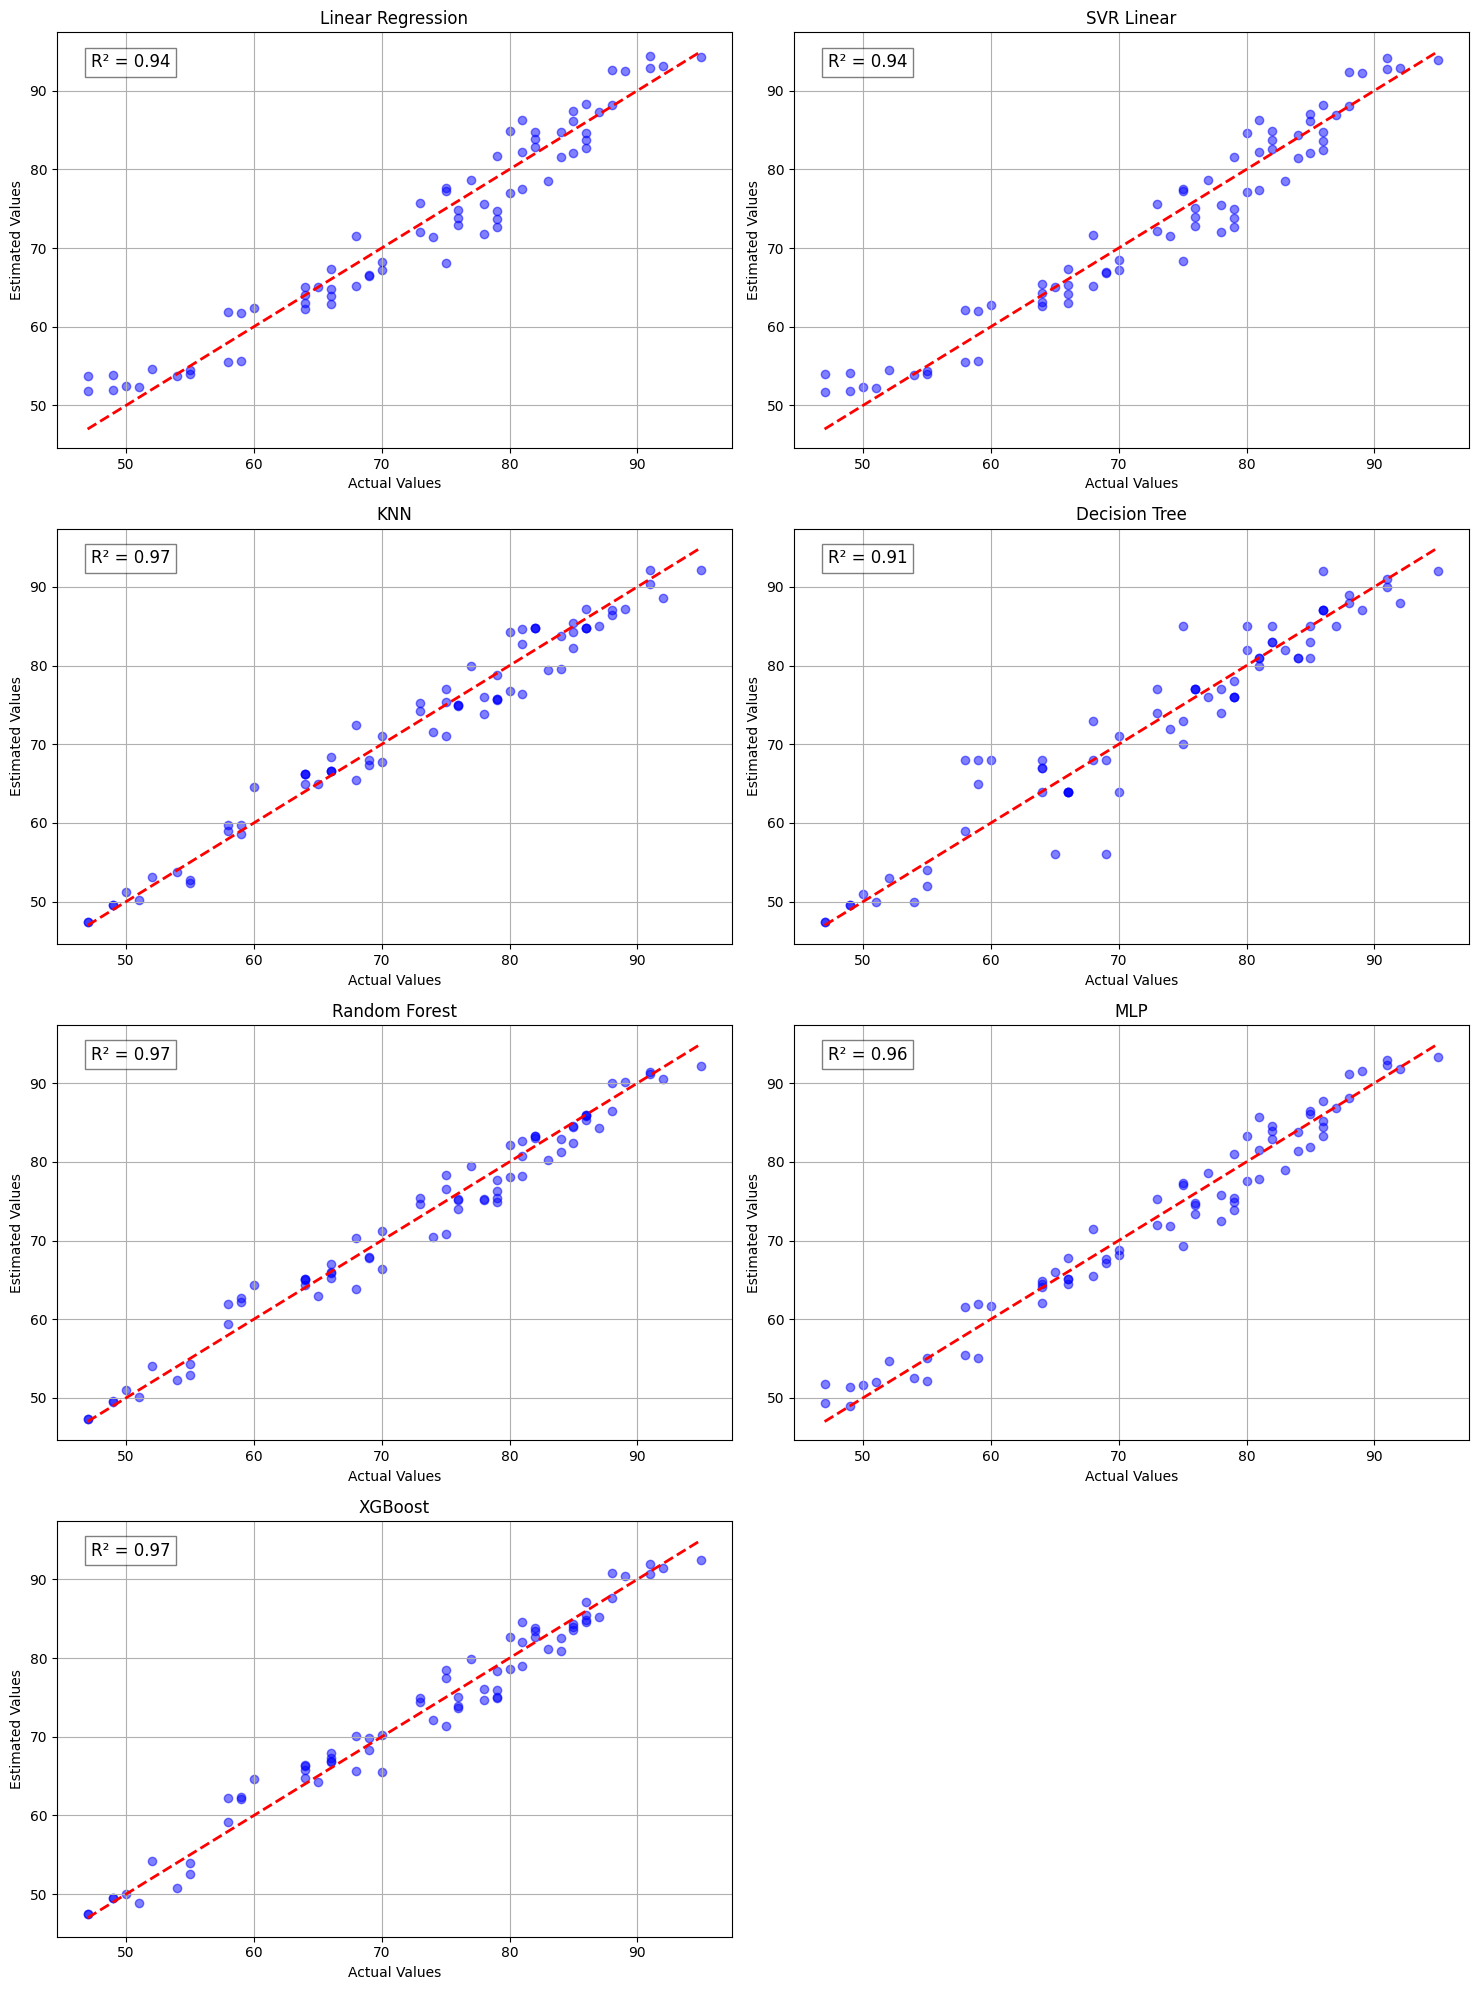

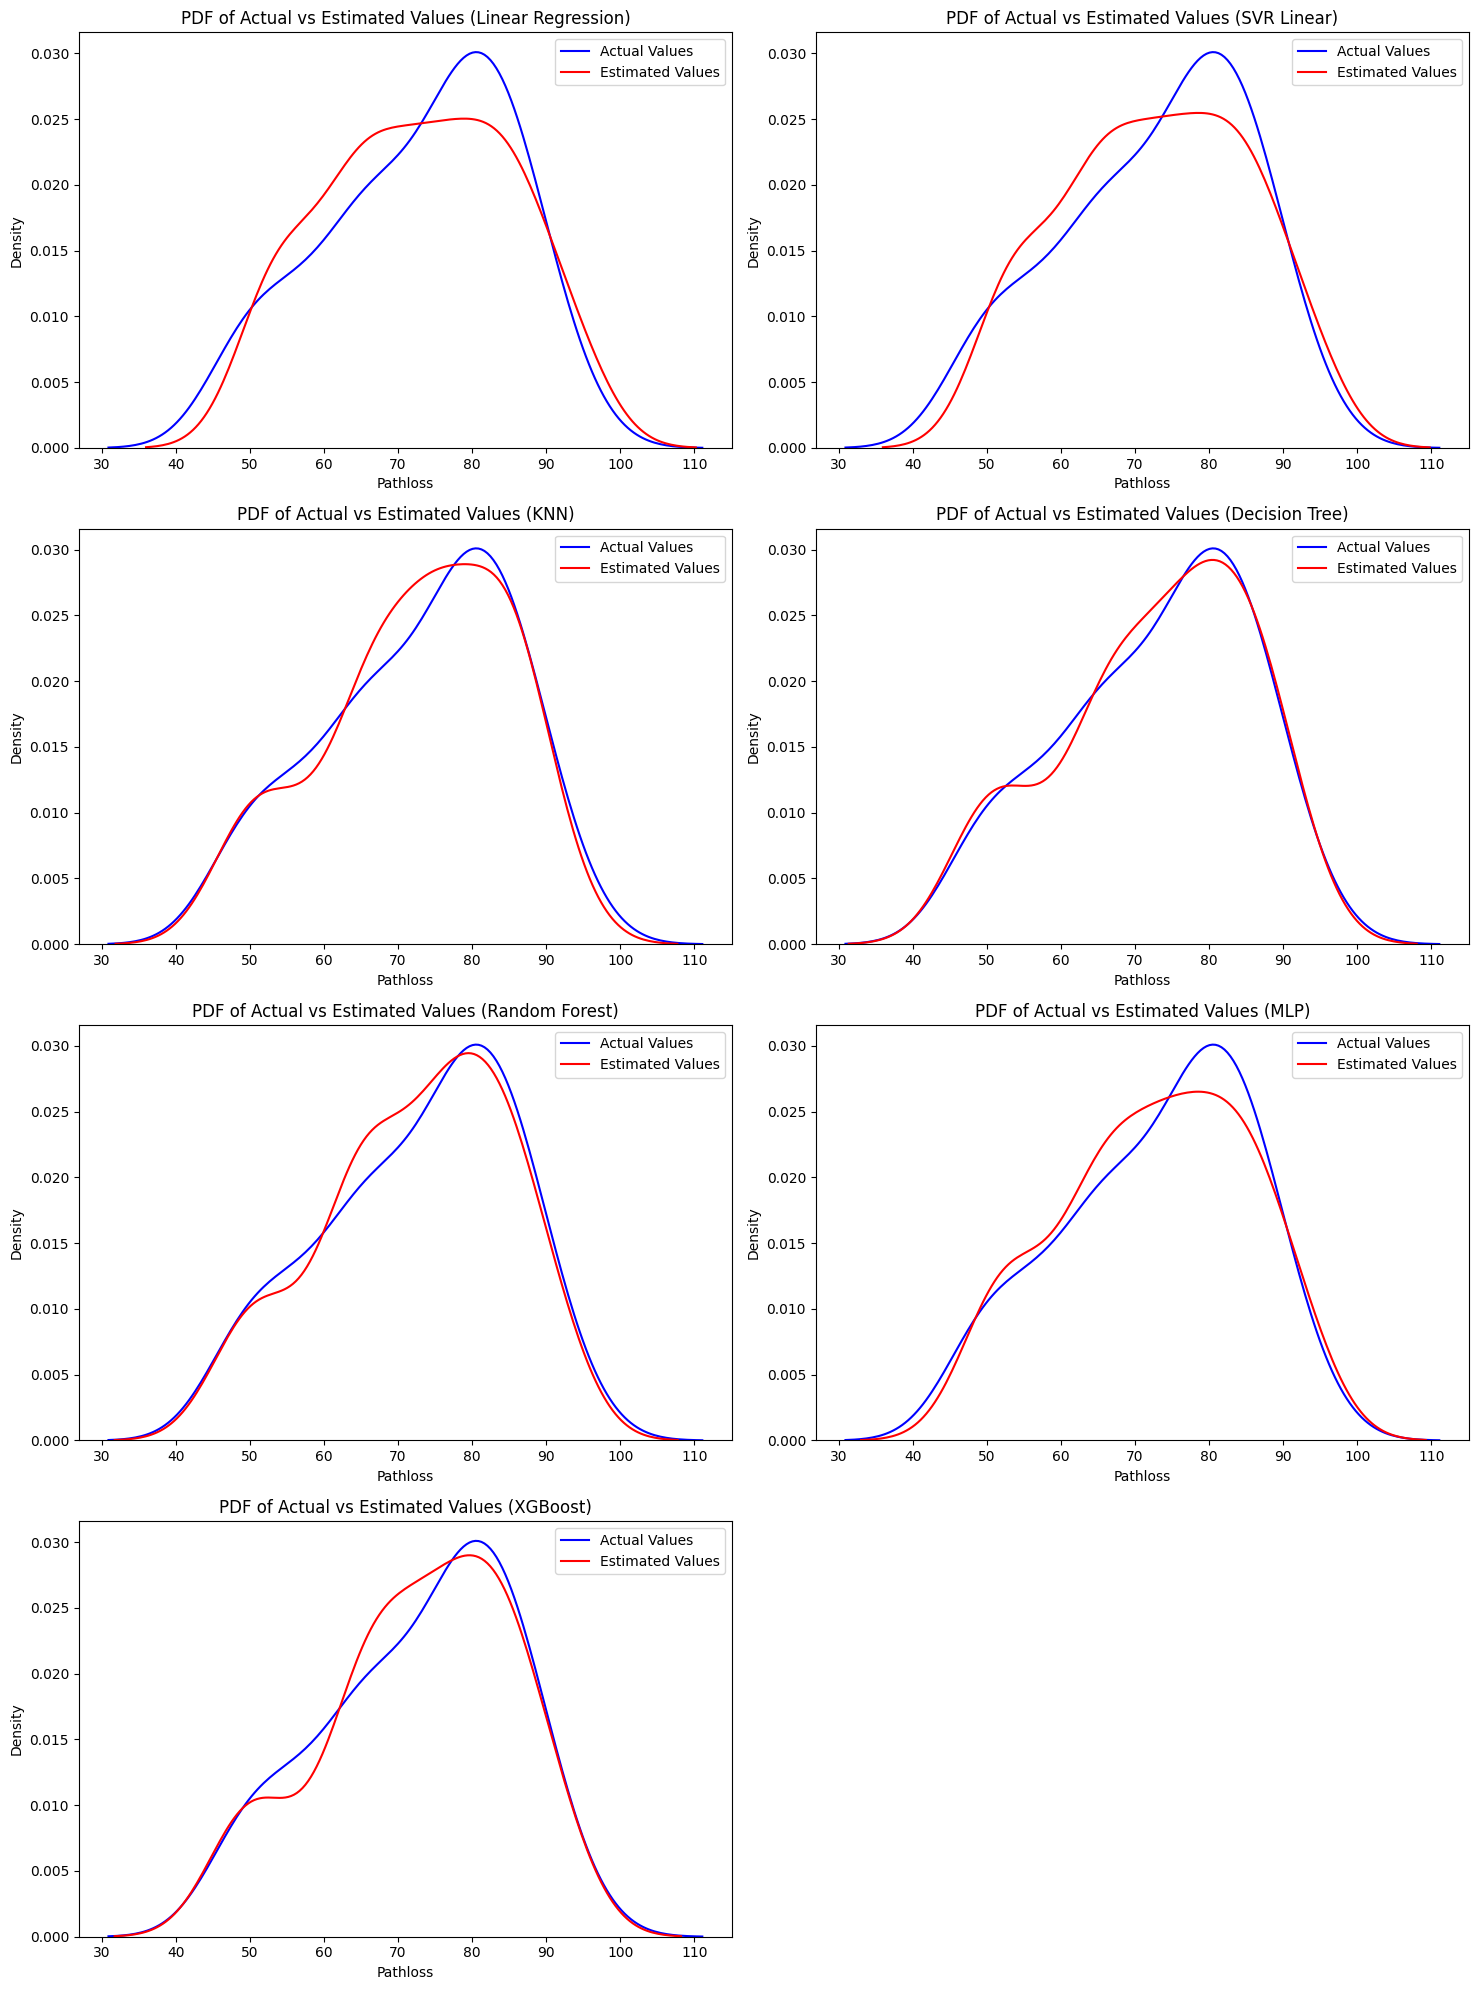

Linear Regression: MAE = 2.58, RMSE = 3.03, R2 = 0.94
SVR Linear: MAE = 2.52, RMSE = 2.99, R2 = 0.94
KNN: MAE = 1.88, RMSE = 2.26, R2 = 0.97
Decision Tree: MAE = 2.65, RMSE = 3.78, R2 = 0.91
Random Forest: MAE = 1.72, RMSE = 2.09, R2 = 0.97
MLP: MAE = 2.08, RMSE = 2.46, R2 = 0.96
XGBoost: MAE = 1.84, RMSE = 2.16, R2 = 0.97


In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the training dataset
train_data = pd.read_csv('data_coupla.csv')

# Load the test dataset
test_data = pd.read_csv('test.csv')

# Assuming the target variable is in the column named 'Pathloss'
X_train = train_data.drop('Pathloss', axis=1)
y_train = train_data['Pathloss']
X_test = test_data.drop('Pathloss', axis=1)
y_test = test_data['Pathloss']

# Models initialization
models = {
    'Linear Regression': LinearRegression(),
    'SVR Linear': SVR(kernel='linear'),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'MLP': MLPRegressor(max_iter=1000),
    'XGBoost': XGBRegressor()
}

# Results dictionary to store metrics for each model
results = {}

# Set up the figure and axis grid for subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()  # Flatten the 2D array to 1D for easier iteration

# Train and evaluate each model
for i, (name, model) in enumerate(models.items()):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    predictions = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    
    # Store results
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}
    
    # Scatter plot of actual vs estimated values for each model
    ax = axes[i]
    ax.scatter(y_test, predictions, alpha=0.5, color='blue')
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
    ax.set_title(name)
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Estimated Values')
    ax.grid(True)
    
    # Place the R² value inside the plot
    ax.text(0.05, 0.95, f'R² = {r2:.2f}', transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Adjust layout
plt.tight_layout()

# If there are fewer models than subplots, hide empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

# Set up the figure and axis grid for PDF plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

# Generate PDF plots for each model
for i, (name, model) in enumerate(models.items()):
    ax = axes[i]
    
    # KDE plot for actual values
    sns.kdeplot(y_test, ax=ax, color='blue', label='Actual Values')
    
    # KDE plot for estimated values
    predictions = model.predict(X_test)
    sns.kdeplot(predictions, ax=ax, color='red', label='Estimated Values')
    
    ax.set_title(f'PDF of Actual vs Estimated Values ({name})')
    ax.set_xlabel('Pathloss')
    ax.set_ylabel('Density')
    ax.legend()

# Adjust layout for PDF plots
plt.tight_layout()

# If there are fewer models than subplots, hide empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

# Print results
for name, metrics in results.items():
    print(f"{name}: MAE = {metrics['MAE']:.2f}, RMSE = {metrics['RMSE']:.2f}, R2 = {metrics['R2']:.2f}")


## Running Models using CTGAN

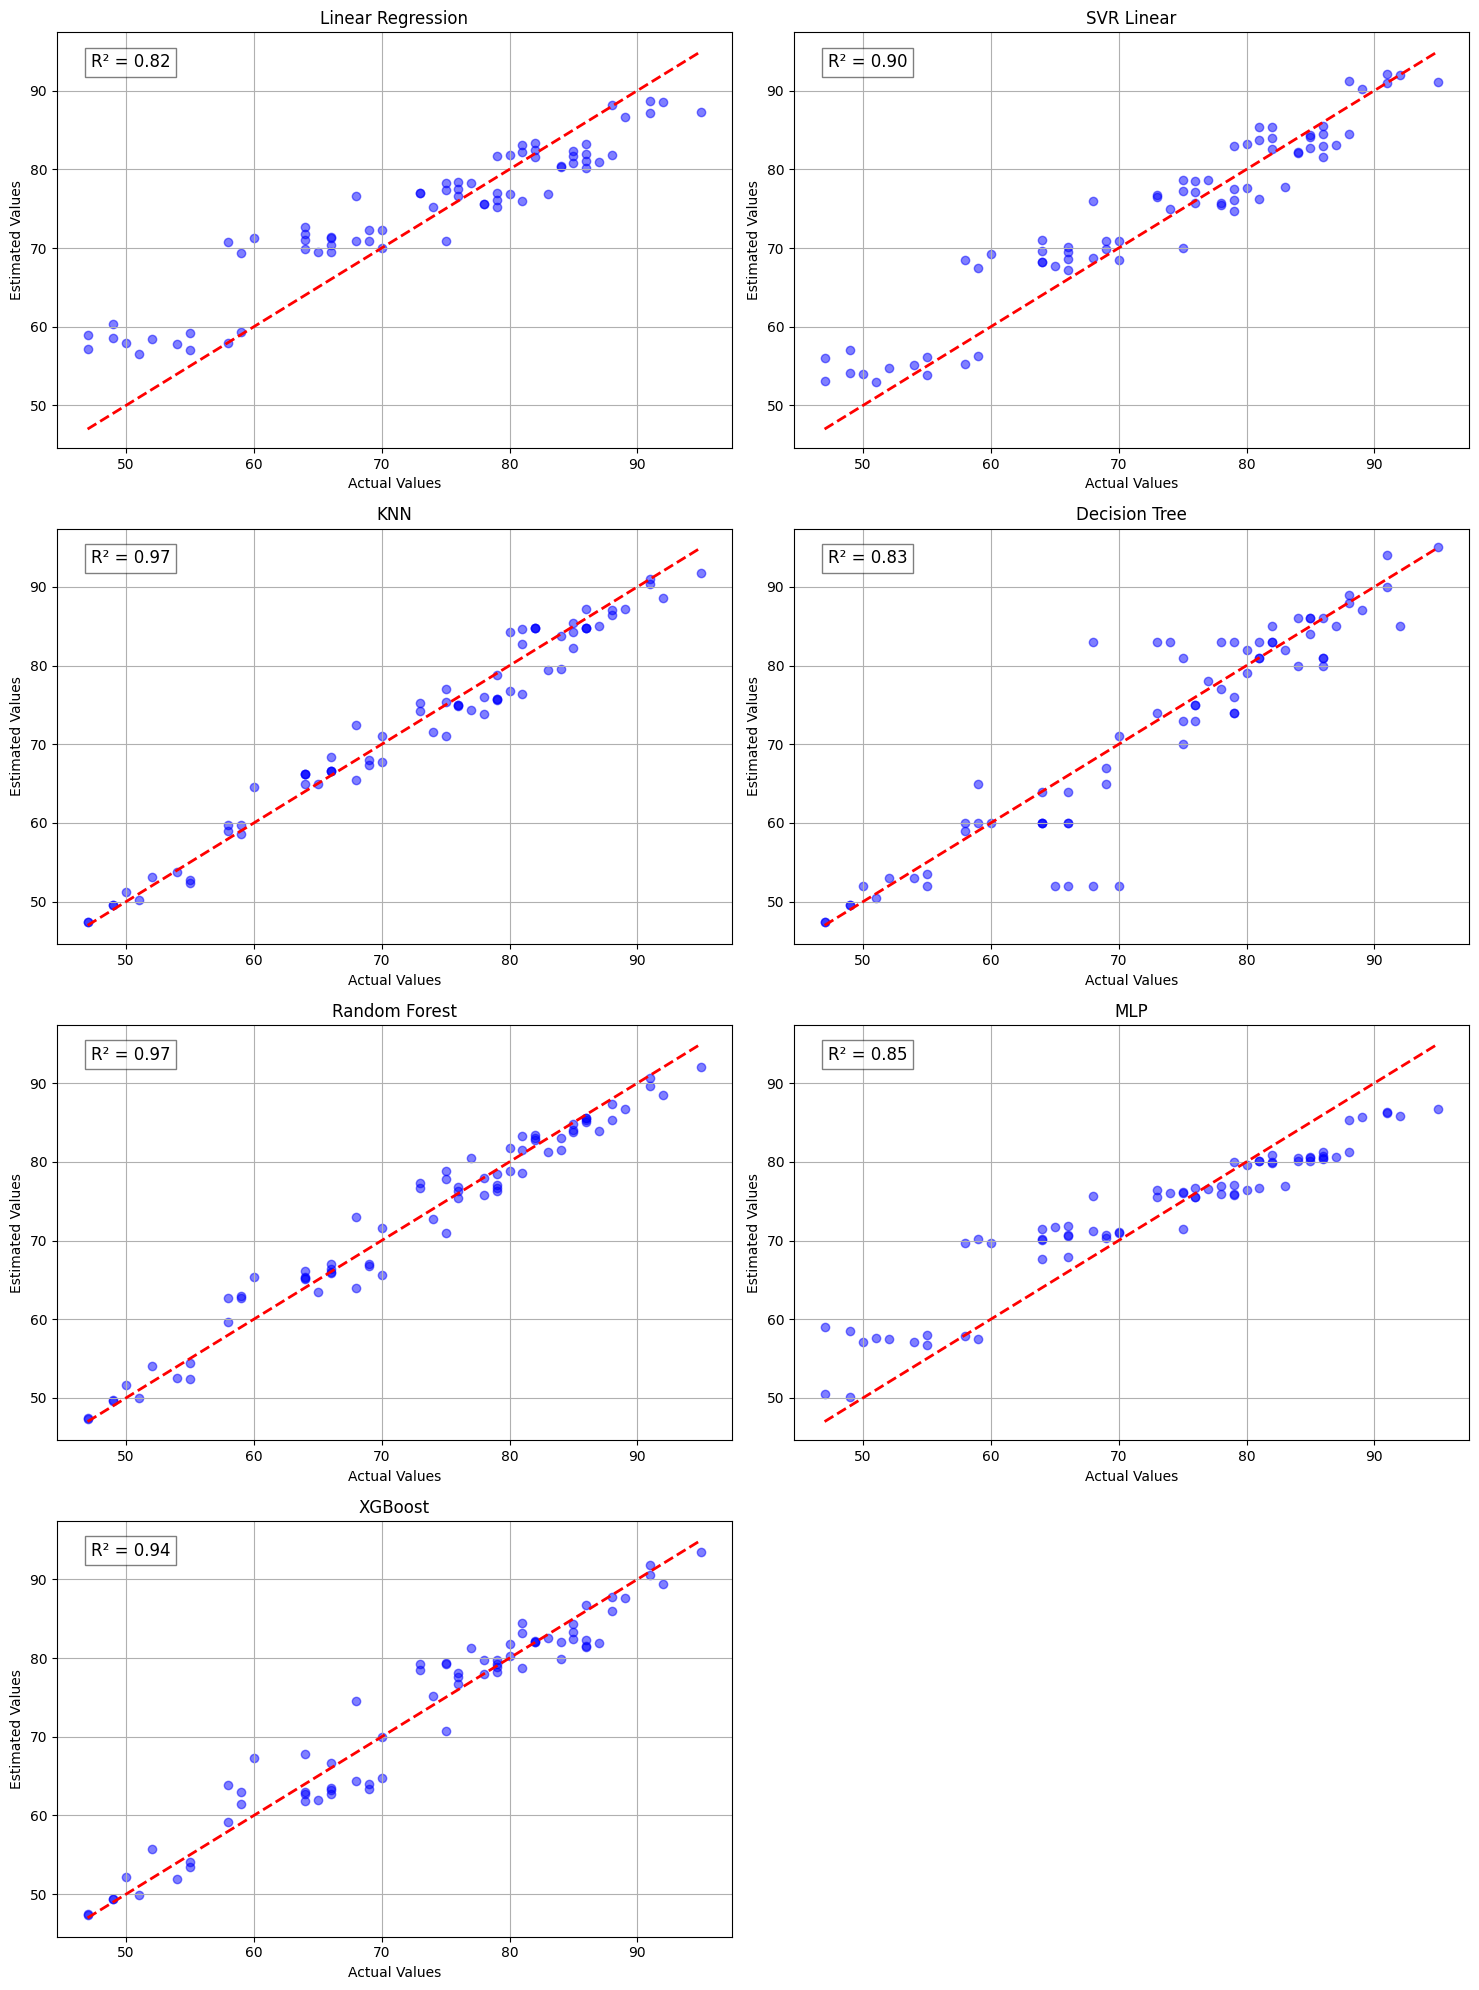

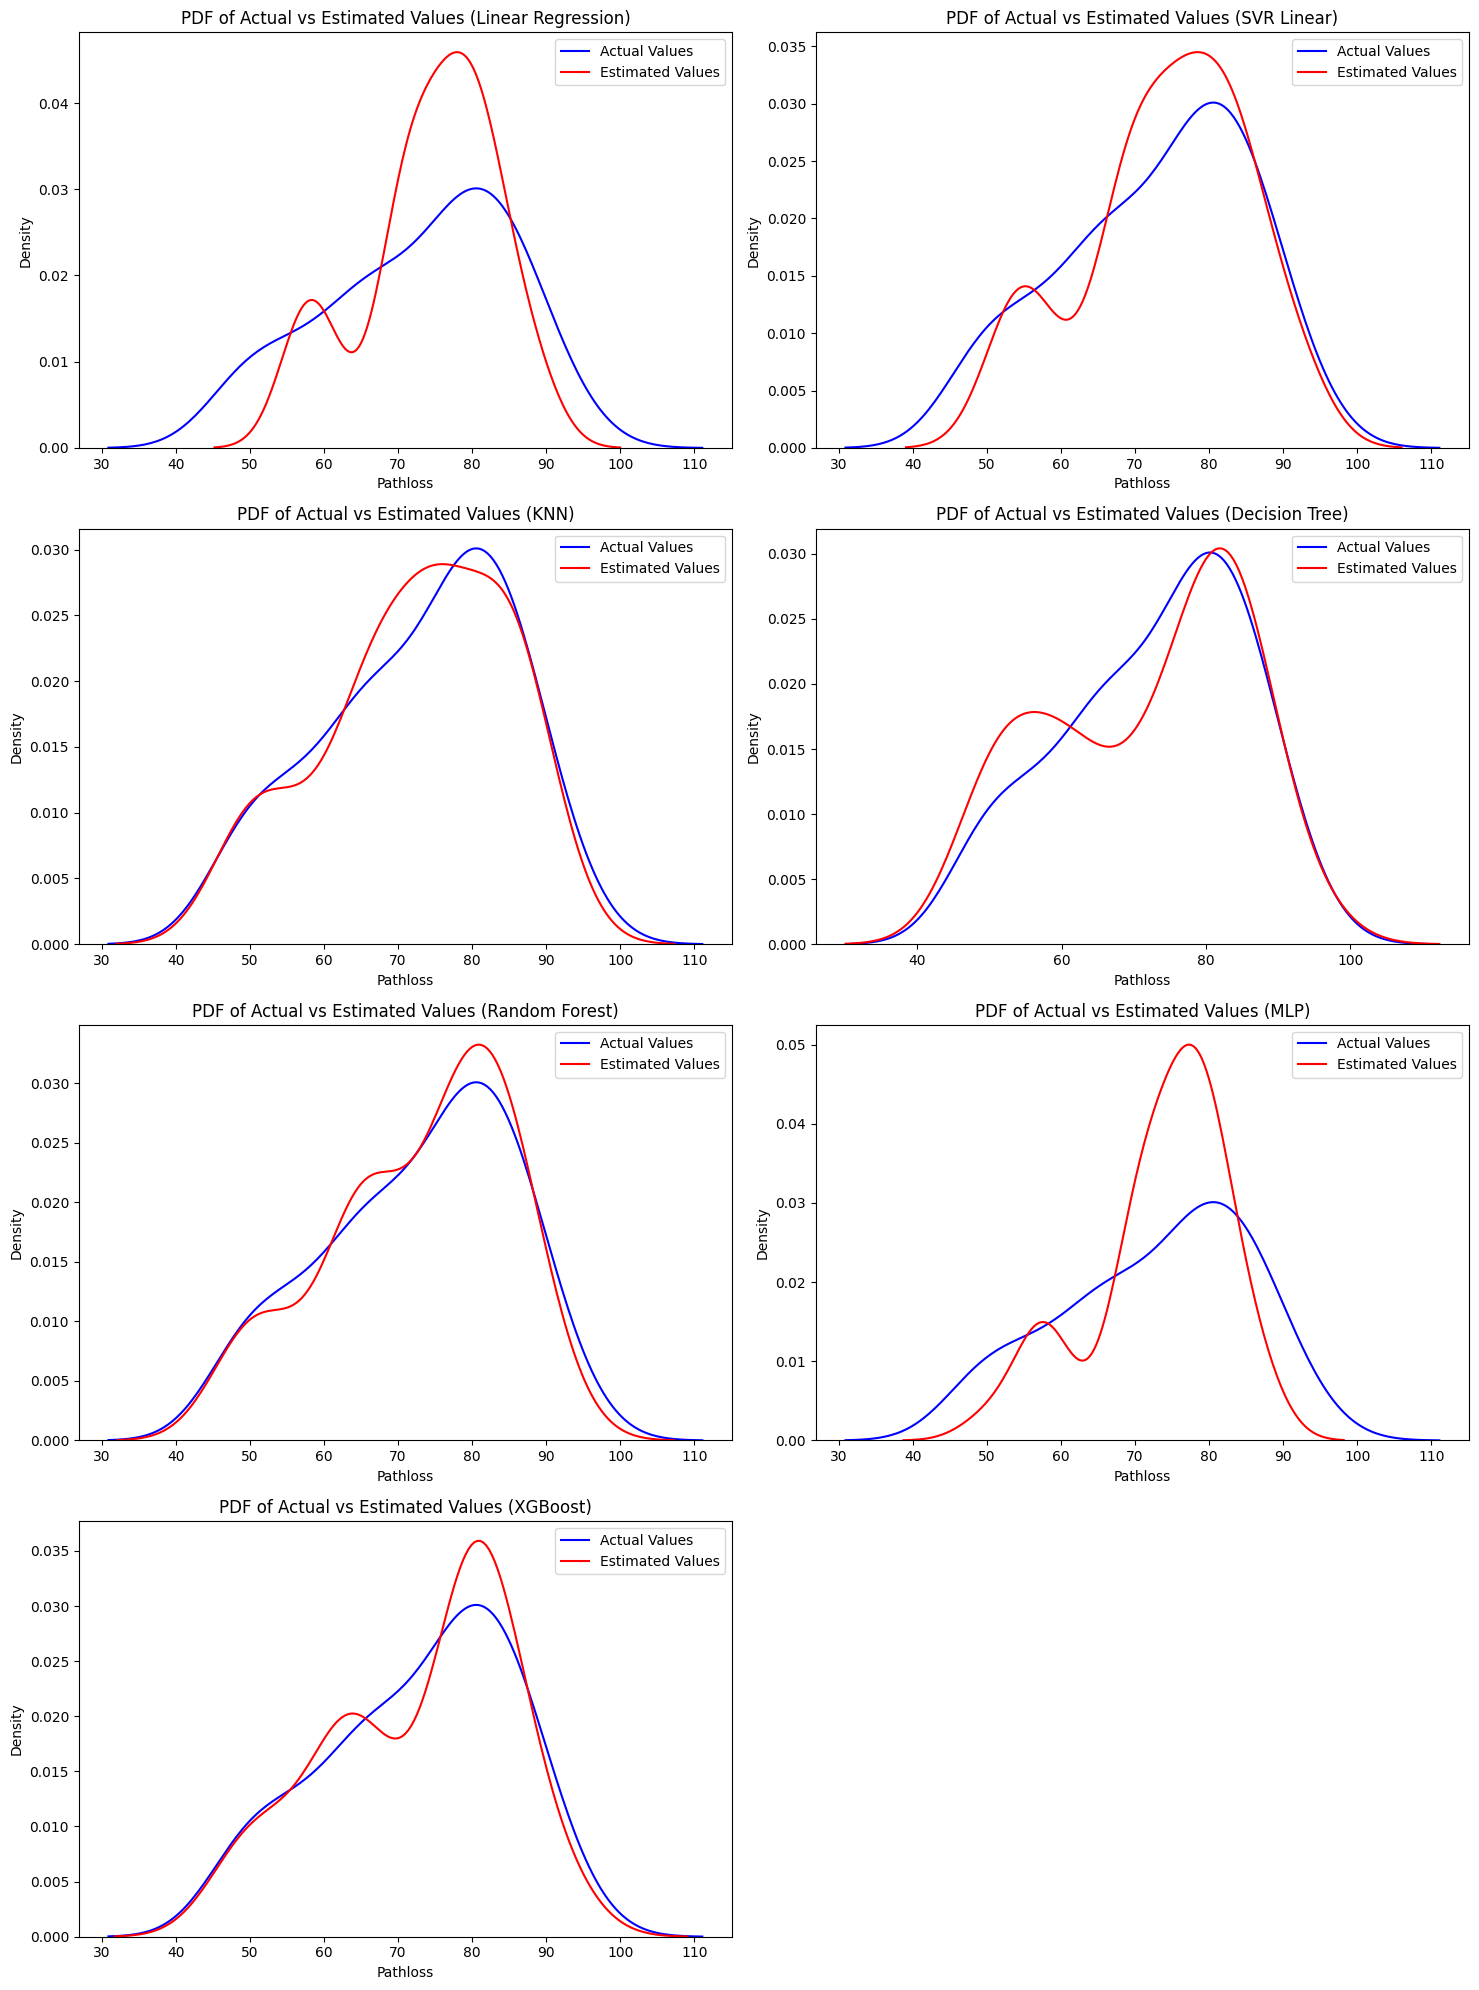

Linear Regression: MAE = 4.29, RMSE = 5.26, R2 = 0.82
SVR Linear: MAE = 3.16, RMSE = 3.91, R2 = 0.90
KNN: MAE = 1.86, RMSE = 2.25, R2 = 0.97
Decision Tree: MAE = 3.39, RMSE = 5.18, R2 = 0.83
Random Forest: MAE = 1.84, RMSE = 2.27, R2 = 0.97
MLP: MAE = 3.97, RMSE = 4.87, R2 = 0.85
XGBoost: MAE = 2.33, RMSE = 2.99, R2 = 0.94


In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the training dataset
train_data = pd.read_csv('data_CTGAN.csv')

# Load the test dataset
test_data = pd.read_csv('test.csv')

# Assuming the target variable is in the column named 'Pathloss'
X_train = train_data.drop('Pathloss', axis=1)
y_train = train_data['Pathloss']
X_test = test_data.drop('Pathloss', axis=1)
y_test = test_data['Pathloss']

# Models initialization
models = {
    'Linear Regression': LinearRegression(),
    'SVR Linear': SVR(kernel='linear'),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'MLP': MLPRegressor(max_iter=1000),
    'XGBoost': XGBRegressor()
}

# Results dictionary to store metrics for each model
results = {}

# Set up the figure and axis grid for subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()  # Flatten the 2D array to 1D for easier iteration

# Train and evaluate each model
for i, (name, model) in enumerate(models.items()):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    predictions = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    
    # Store results
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}
    
    # Scatter plot of actual vs estimated values for each model
    ax = axes[i]
    ax.scatter(y_test, predictions, alpha=0.5, color='blue')
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
    ax.set_title(name)
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Estimated Values')
    ax.grid(True)
    
    # Place the R² value inside the plot
    ax.text(0.05, 0.95, f'R² = {r2:.2f}', transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Adjust layout
plt.tight_layout()

# If there are fewer models than subplots, hide empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

# Set up the figure and axis grid for PDF plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

# Generate PDF plots for each model
for i, (name, model) in enumerate(models.items()):
    ax = axes[i]
    
    # KDE plot for actual values
    sns.kdeplot(y_test, ax=ax, color='blue', label='Actual Values', fill=False)
    
    # KDE plot for estimated values
    predictions = model.predict(X_test)
    sns.kdeplot(predictions, ax=ax, color='red', label='Estimated Values', fill=False)
    
    ax.set_title(f'PDF of Actual vs Estimated Values ({name})')
    ax.set_xlabel('Pathloss')
    ax.set_ylabel('Density')
    ax.legend()

# Adjust layout for PDF plots
plt.tight_layout()

# If there are fewer models than subplots, hide empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

# Print results
for name, metrics in results.items():
    print(f"{name}: MAE = {metrics['MAE']:.2f}, RMSE = {metrics['RMSE']:.2f}, R2 = {metrics['R2']:.2f}")


## Testing Loss Curves

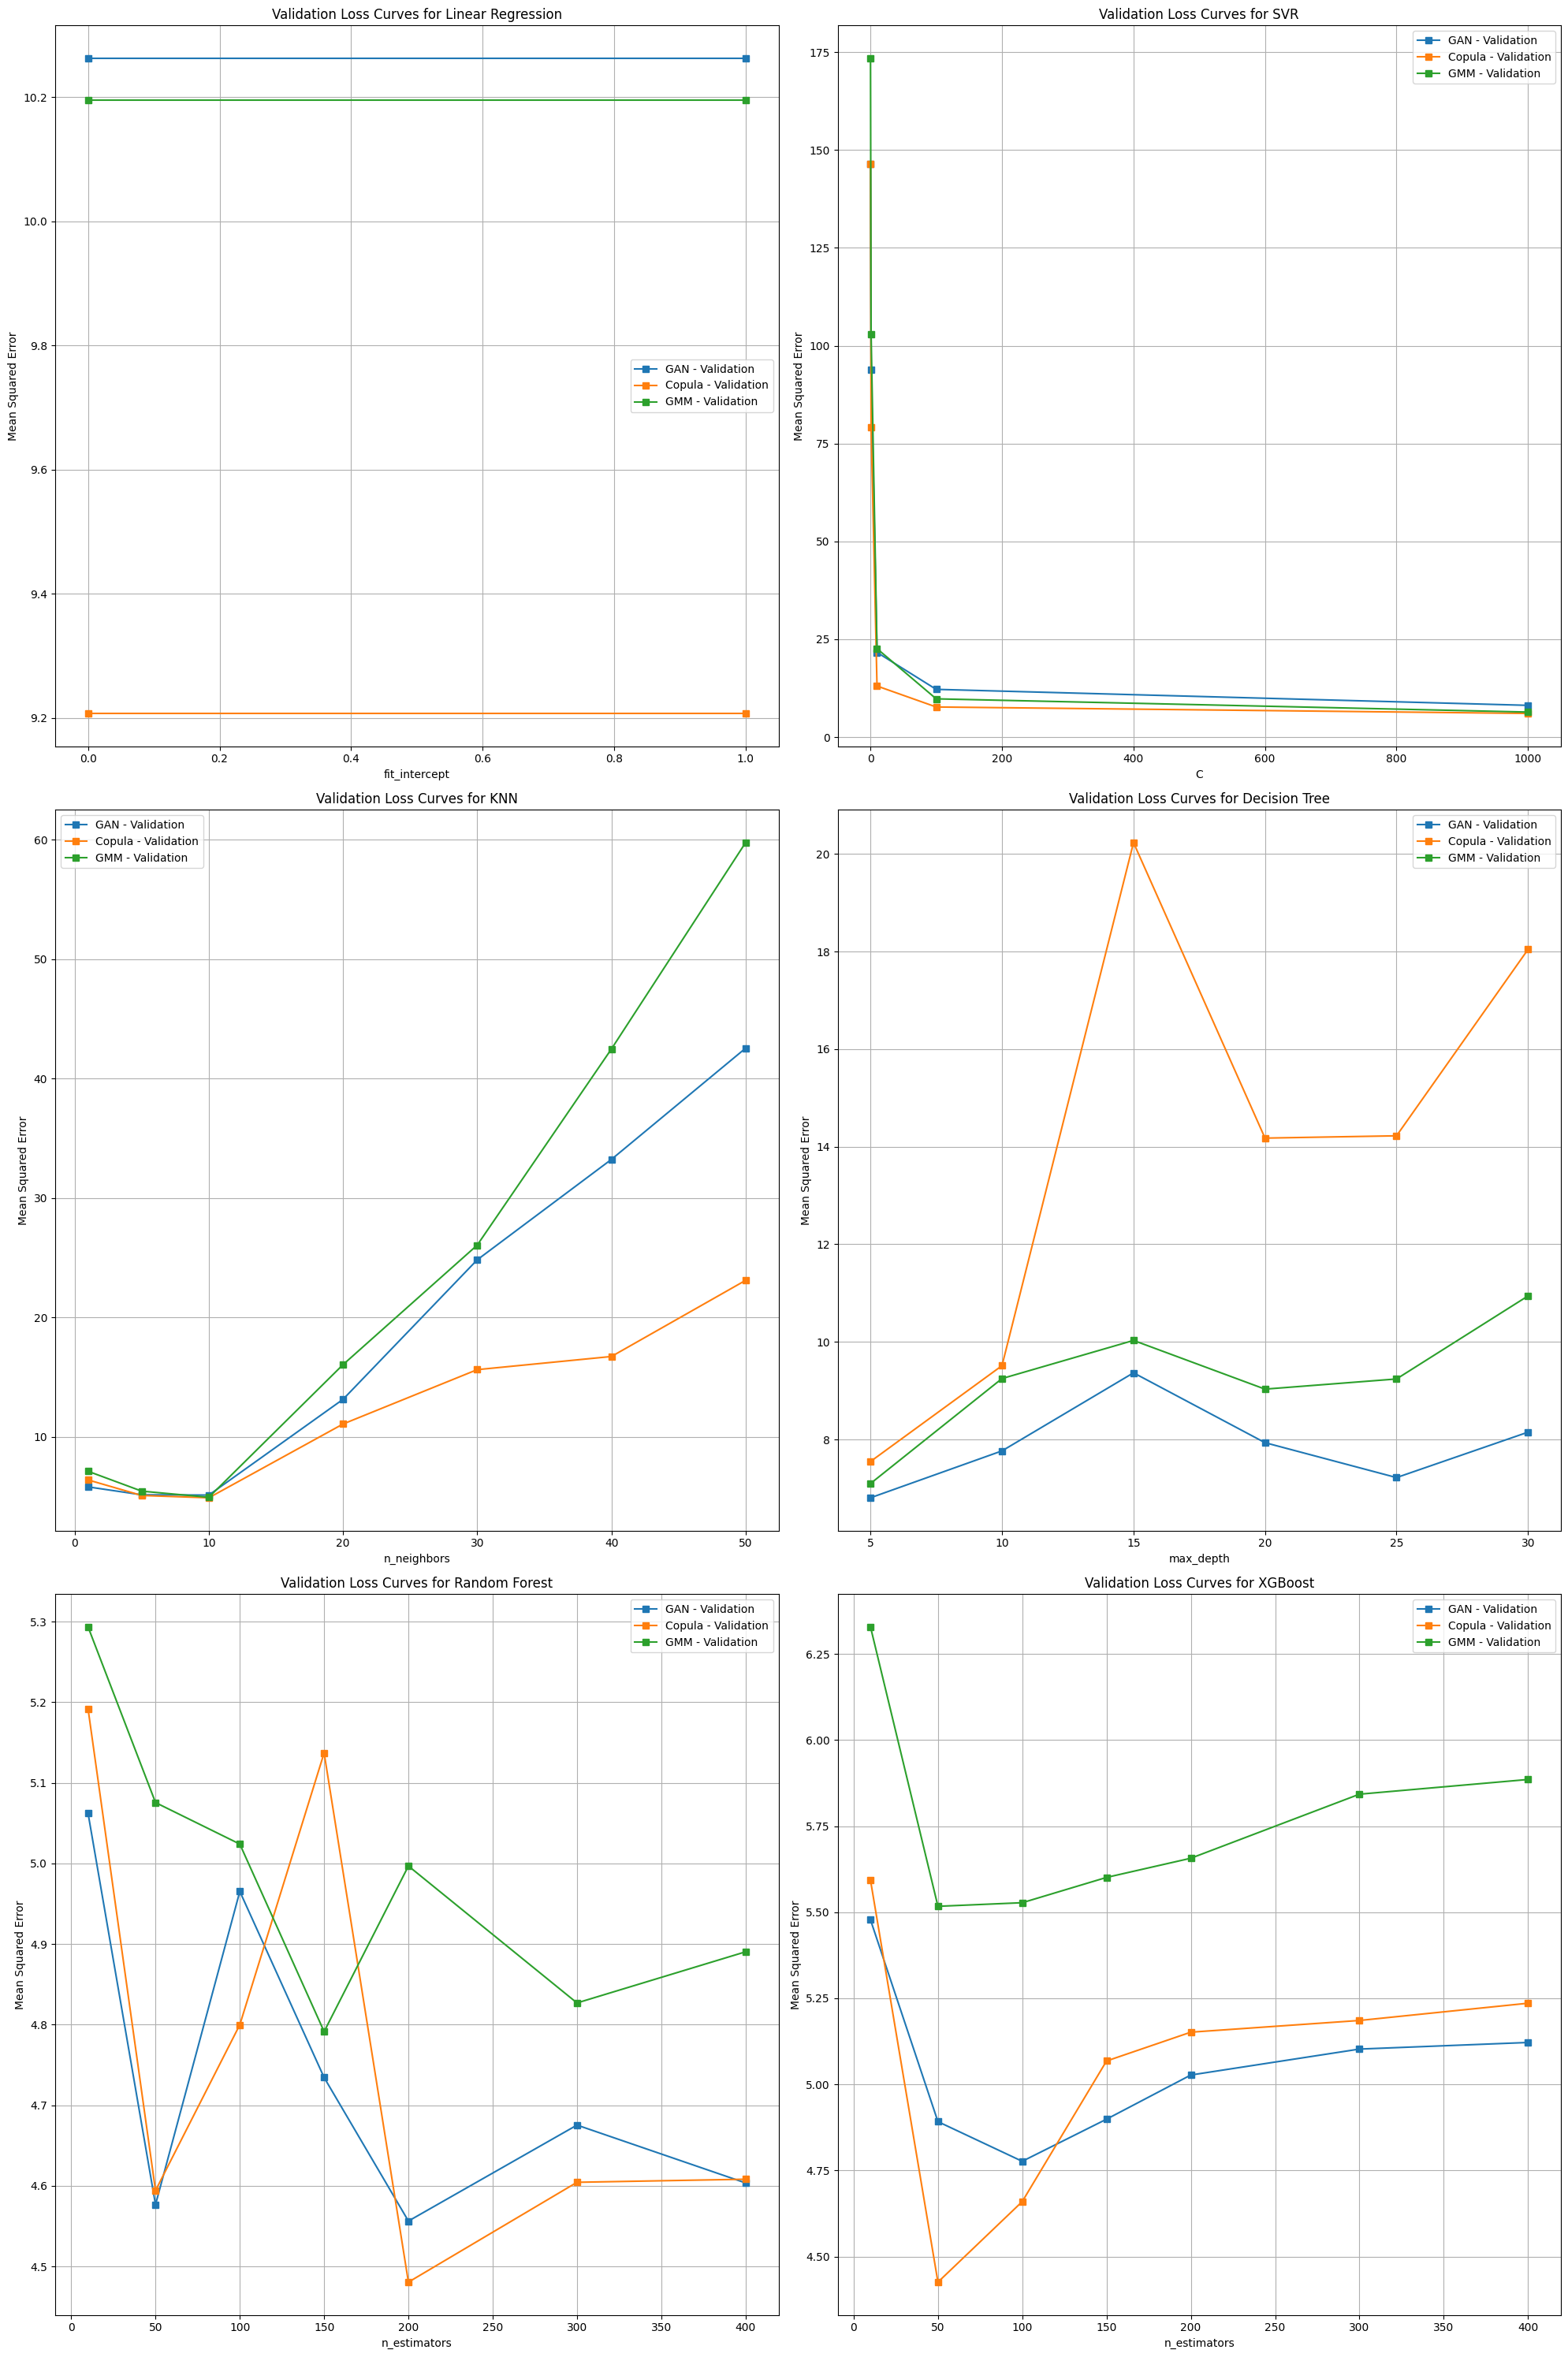

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error

def calculate_validation_loss(model, X_train, y_train, X_val, y_val, param_name, param_values):
    validation_losses = []
    for value in param_values:
        model.set_params(**{param_name: value})
        model.fit(X_train, y_train)
        val_predictions = model.predict(X_val)
        val_loss = mean_squared_error(y_val, val_predictions)
        validation_losses.append(val_loss)
    return validation_losses

def load_datasets():
    datasets = {
        'GAN': pd.read_csv('data_GAN.csv'),
        'Copula': pd.read_csv('data_coupla.csv'),
        'GMM': pd.read_csv('data_GMM.csv')
    }
    for label in datasets:
        data = datasets[label]
        X = data.drop('Pathloss', axis=1)
        y = data['Pathloss']
        datasets[label] = (X, y)
    return datasets

def load_test_data():
    test_data = pd.read_csv('test.csv')
    X_test = test_data.drop('Pathloss', axis=1)
    y_test = test_data['Pathloss']
    return X_test, y_test

# Load datasets and test data
datasets = load_datasets()
X_test, y_test = load_test_data()

# Define models and parameters to test
models = {
    'Linear Regression': LinearRegression,
    'SVR': SVR,
    'KNN': KNeighborsRegressor,
    'Decision Tree': DecisionTreeRegressor,
    'Random Forest': RandomForestRegressor,
    'XGBoost': xgb.XGBRegressor
}

params = {
    'Linear Regression': ('fit_intercept', [True, False]),
    'SVR': ('C', [0.1, 1, 10, 100, 1000]),
    'KNN': ('n_neighbors', [1, 5, 10, 20, 30, 40, 50]),
    'Decision Tree': ('max_depth', [None, 5, 10, 15, 20, 25, 30]),
    'Random Forest': ('n_estimators', [10, 50, 100, 150, 200, 300, 400]),
    'XGBoost': ('n_estimators', [10, 50, 100, 150, 200, 300, 400])
}

# Plot training and validation loss curves for each model
plt.figure(figsize=(20, 30))
for i, (model_name, (param_name, param_values)) in enumerate(params.items(), start=1):
    plt.subplot(3, 2, i)
    for label, (X_train, y_train) in datasets.items():
        model = models[model_name]()
        validation_losses = calculate_validation_loss(model, X_train, y_train, X_test, y_test, param_name, param_values)
        plt.plot(param_values, validation_losses, marker='s', linestyle='-', label=f'{label} - Validation')
    plt.title(f'Validation Loss Curves for {model_name}')
    plt.xlabel(param_name)
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


## Training Loss Curves

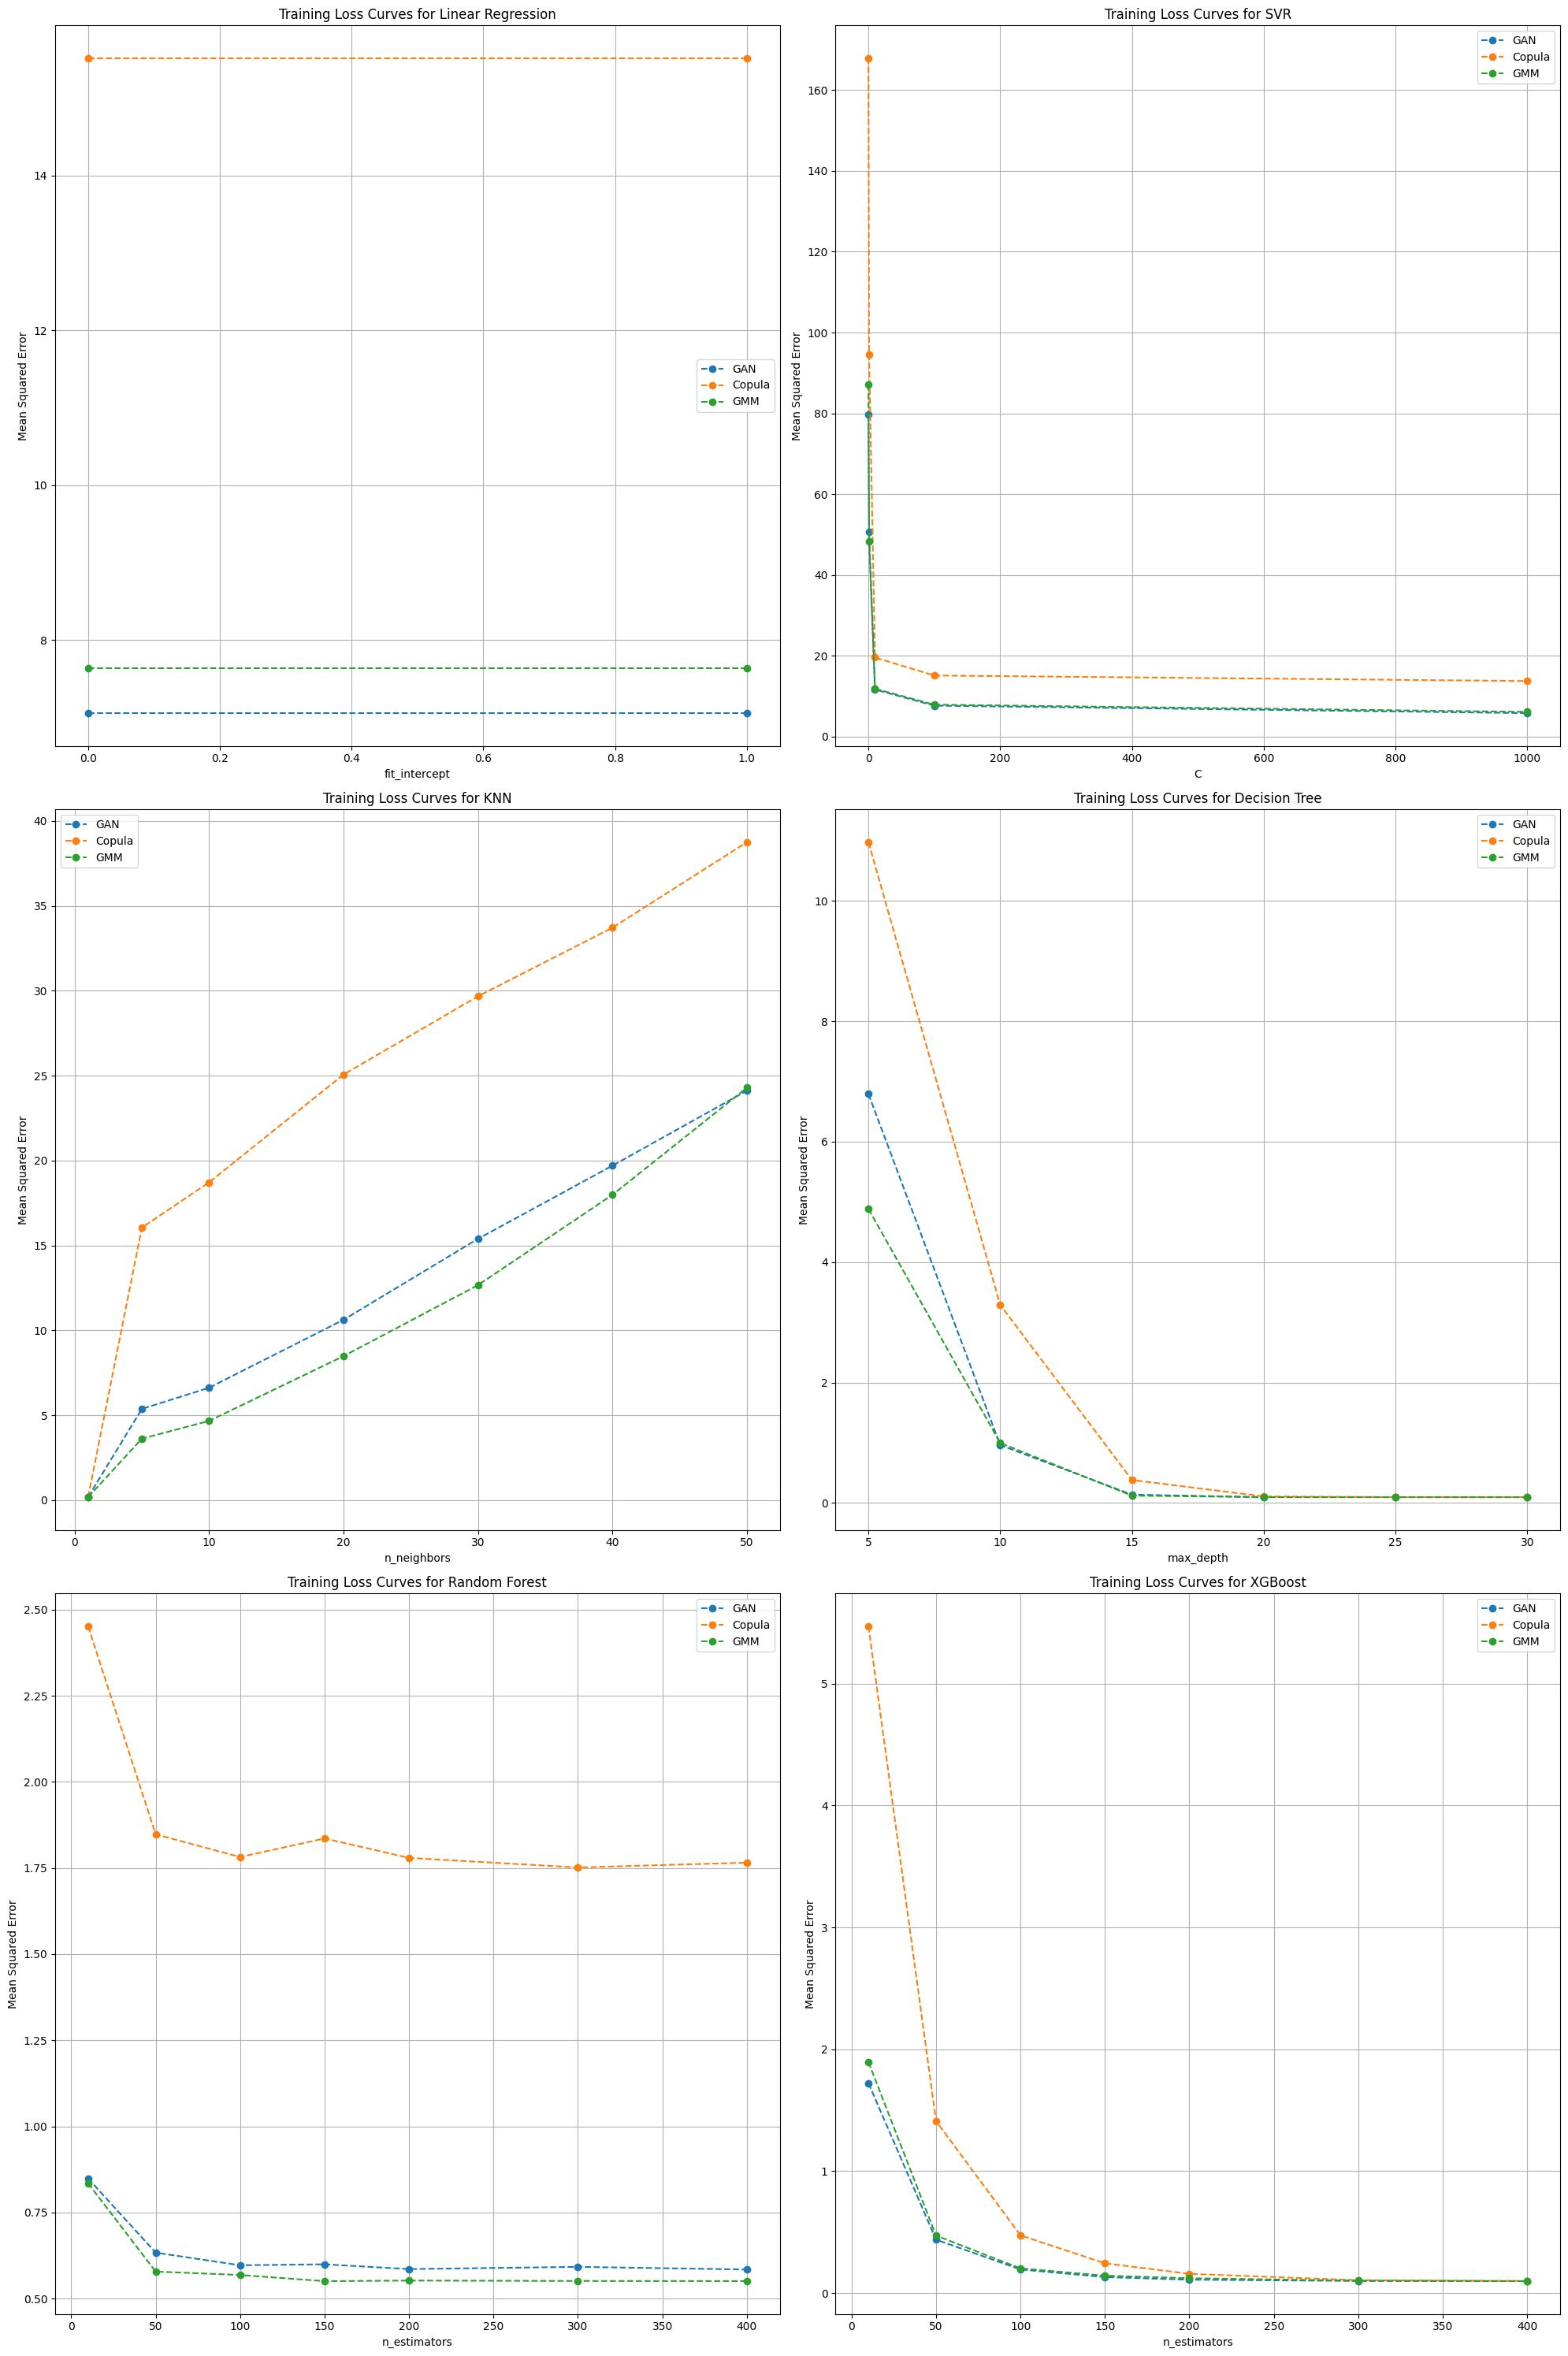

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error

def calculate_training_loss(model, X, y, param_name, param_values):
    training_losses = []
    for value in param_values:
        model.set_params(**{param_name: value})
        model.fit(X, y)
        predictions = model.predict(X)
        train_loss = mean_squared_error(y, predictions)
        training_losses.append(train_loss)
    return training_losses

def load_datasets():
    datasets = {
        'GAN': pd.read_csv('data_GAN.csv'),
        'Copula': pd.read_csv('data_coupla.csv'),
        'GMM': pd.read_csv('data_GMM.csv')
    }
    for label in datasets:
        data = datasets[label]
        X = data.drop('Pathloss', axis=1)
        y = data['Pathloss']
        datasets[label] = (X, y)
    return datasets

def plot_loss_curves(datasets, model_name, param_name, param_values):
    plt.figure(figsize=(20, 15))
    for i, (label, (X, y)) in enumerate(datasets.items(), start=1):
        model = models[model_name]()
        training_losses = calculate_training_loss(model, X, y, param_name, param_values)
        plt.plot(param_values, training_losses, marker='o', linestyle='--', label=label)
        plt.title(f'Training Loss Curve for {model_name} on {label}')
        plt.xlabel(param_name)
        plt.ylabel('Mean Squared Error')
        plt.legend()
        plt.grid(True)
    plt.tight_layout()

# Load datasets
datasets = load_datasets()

# Define models and parameters to test
models = {
    'Linear Regression': LinearRegression,
    'SVR': SVR,
    'KNN': KNeighborsRegressor,
    'Decision Tree': DecisionTreeRegressor,
    'Random Forest': RandomForestRegressor,
    'XGBoost': xgb.XGBRegressor
}

params = {
    'Linear Regression': ('fit_intercept', [True, False]),
    'SVR': ('C', [0.1, 1, 10, 100, 1000]),
    'KNN': ('n_neighbors', [1, 5, 10, 20, 30, 40, 50]),
    'Decision Tree': ('max_depth', [None, 5, 10, 15, 20, 25, 30]),
    'Random Forest': ('n_estimators', [10, 50, 100, 150, 200, 300, 400]),
    'XGBoost': ('n_estimators', [10, 50, 100, 150, 200, 300, 400])
}

# Plot training loss curves for each model
plt.figure(figsize=(20, 30))
for i, (model_name, (param_name, param_values)) in enumerate(params.items(), start=1):
    plt.subplot(3, 2, i)
    for label, (X, y) in datasets.items():
        model = models[model_name]()
        training_losses = calculate_training_loss(model, X, y, param_name, param_values)
        plt.plot(param_values, training_losses, marker='o', linestyle='--', label=label)
    plt.title(f'Training Loss Curves for {model_name}')
    plt.xlabel(param_name)
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


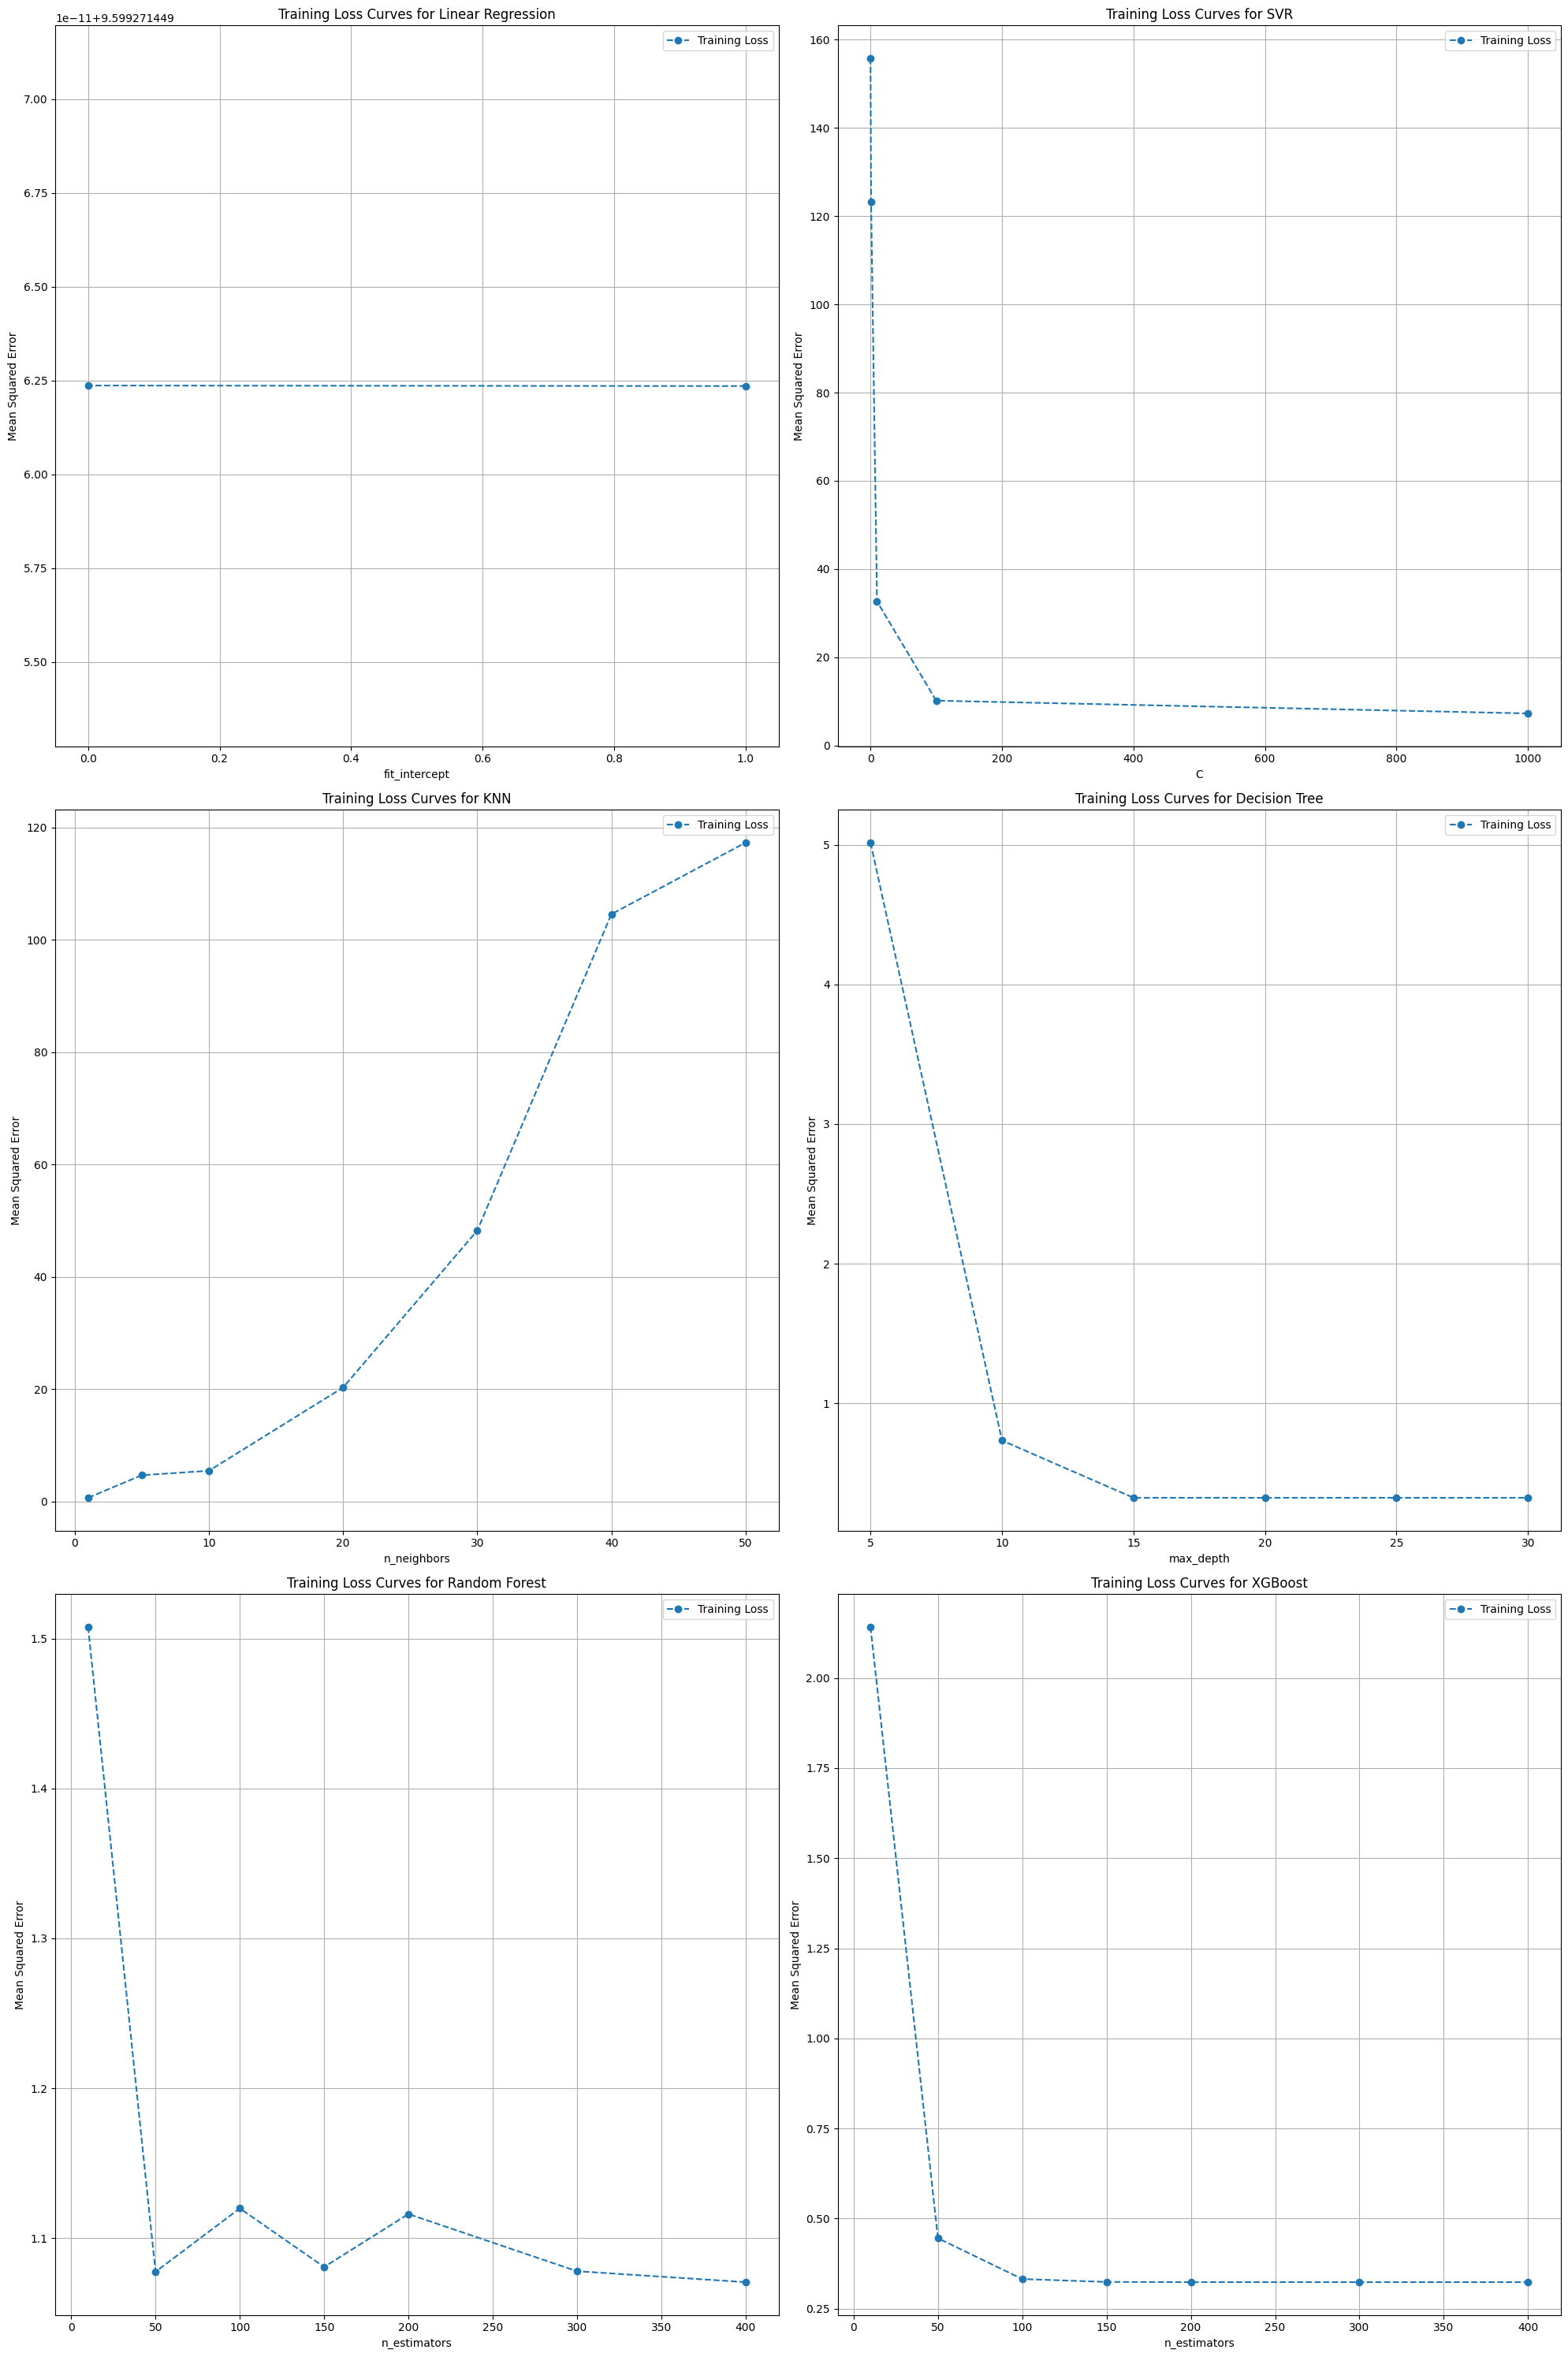

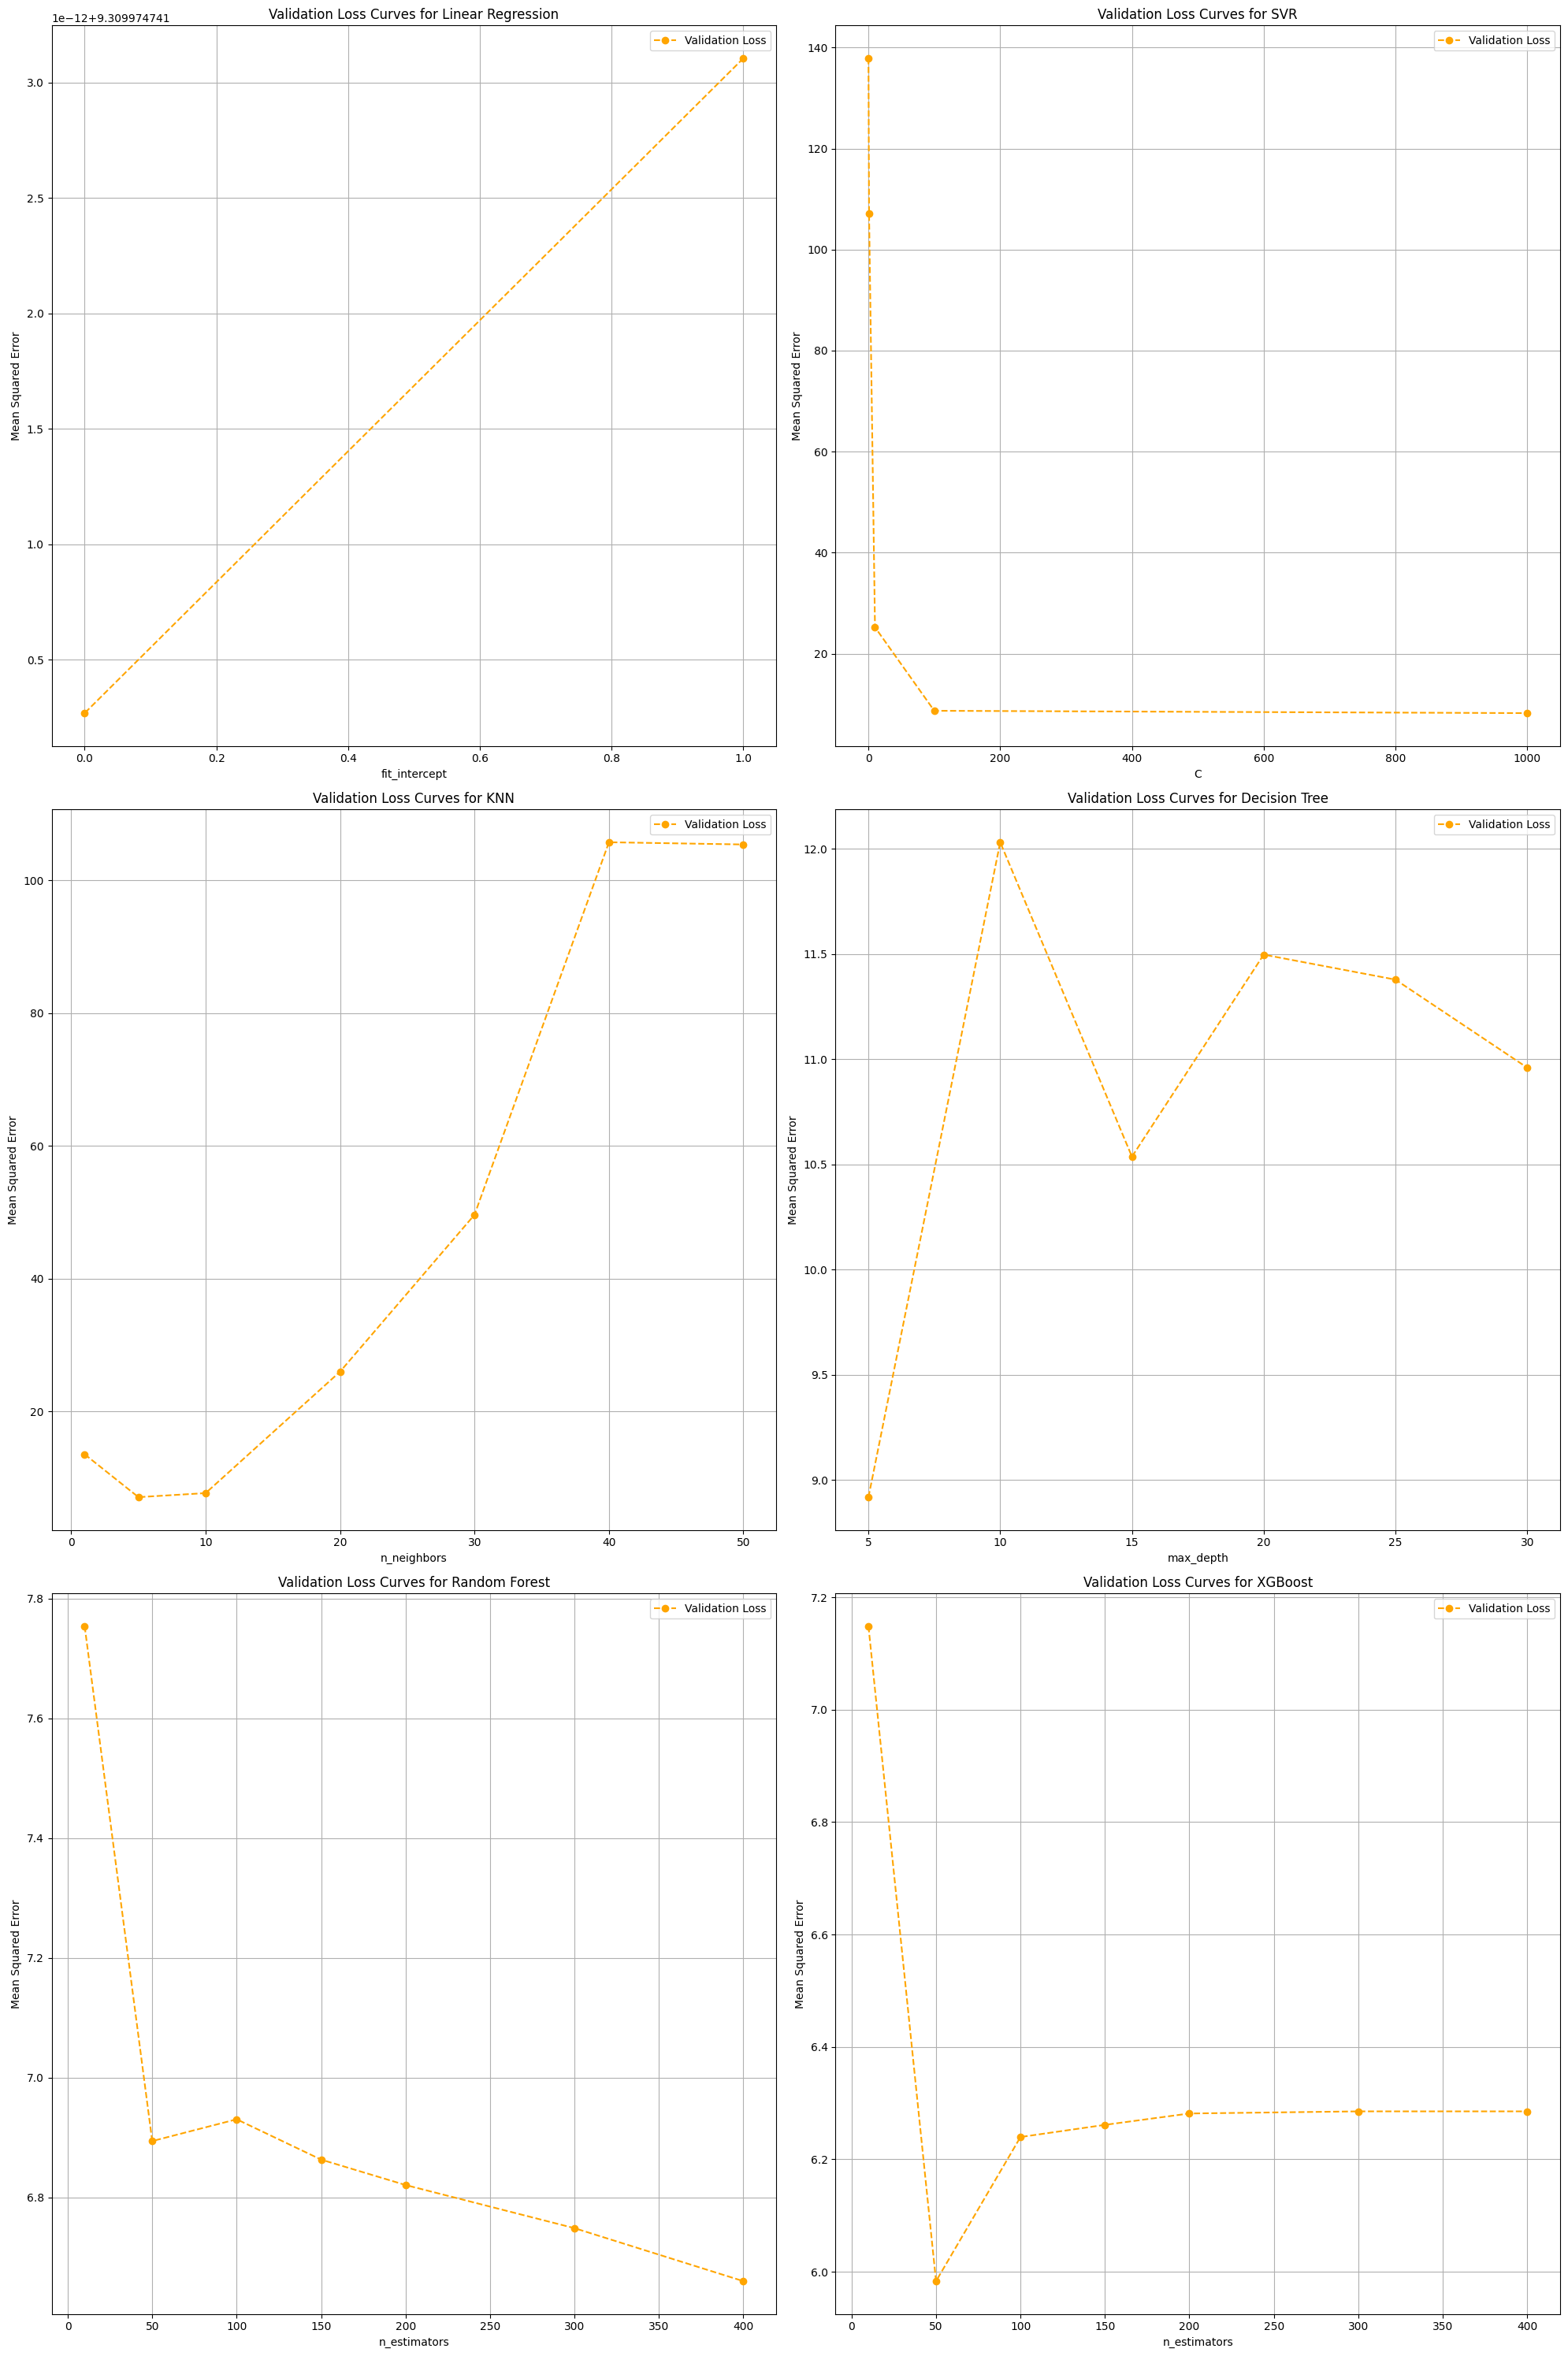

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('combined_measurements.csv')

# Assuming the target variable is in the column named 'Pathloss'
X = data.drop('Pathloss', axis=1)
y = data['Pathloss']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and parameters to test
models = {
    'Linear Regression': LinearRegression,
    'SVR': SVR,
    'KNN': KNeighborsRegressor,
    'Decision Tree': DecisionTreeRegressor,
    'Random Forest': RandomForestRegressor,
    'XGBoost': xgb.XGBRegressor
}

params = {
    'Linear Regression': ('fit_intercept', [True, False]),
    'SVR': ('C', [0.1, 1, 10, 100, 1000]),
    'KNN': ('n_neighbors', [1, 5, 10, 20, 30, 40, 50]),
    'Decision Tree': ('max_depth', [None, 5, 10, 15, 20, 25, 30]),
    'Random Forest': ('n_estimators', [10, 50, 100, 150, 200, 300, 400]),
    'XGBoost': ('n_estimators', [10, 50, 100, 150, 200, 300, 400])
}

# Function to calculate training and validation loss
def calculate_losses(model, X_train, y_train, X_test, y_test, param_name, param_values):
    training_losses = []
    validation_losses = []
    for value in param_values:
        model.set_params(**{param_name: value})
        model.fit(X_train, y_train)
        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)
        train_loss = mean_squared_error(y_train, train_predictions)
        val_loss = mean_squared_error(y_test, test_predictions)
        training_losses.append(train_loss)
        validation_losses.append(val_loss)
    return training_losses, validation_losses

# Plot training loss curves
fig_train, axes_train = plt.subplots(nrows=3, ncols=2, figsize=(20, 30))
axes_train = axes_train.flatten()

for i, (model_name, (param_name, param_values)) in enumerate(params.items()):
    model = models[model_name]()
    train_losses, _ = calculate_losses(model, X_train, y_train, X_test, y_test, param_name, param_values)
    
    # Training loss plot
    ax_train = axes_train[i]
    ax_train.plot(param_values, train_losses, marker='o', linestyle='--', label='Training Loss')
    ax_train.set_title(f'Training Loss Curves for {model_name}')
    ax_train.set_xlabel(param_name)
    ax_train.set_ylabel('Mean Squared Error')
    ax_train.legend()
    ax_train.grid(True)

fig_train.tight_layout()
plt.show()

# Plot validation loss curves
fig_val, axes_val = plt.subplots(nrows=3, ncols=2, figsize=(20, 30))
axes_val = axes_val.flatten()

for i, (model_name, (param_name, param_values)) in enumerate(params.items()):
    model = models[model_name]()
    _, val_losses = calculate_losses(model, X_train, y_train, X_test, y_test, param_name, param_values)
    
    # Validation loss plot
    ax_val = axes_val[i]
    ax_val.plot(param_values, val_losses, marker='o', linestyle='--', color='orange', label='Validation Loss')
    ax_val.set_title(f'Validation Loss Curves for {model_name}')
    ax_val.set_xlabel(param_name)
    ax_val.set_ylabel('Mean Squared Error')
    ax_val.legend()
    ax_val.grid(True)

fig_val.tight_layout()
plt.show()
